In [26]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

In [27]:
# Process ds1: winequality_red
'''
import pandas as pd

df = pd.read_csv('1-winequality-red.csv', sep=';')

means = df.mean()
# values > mean are 1, otherwise 0
binary_df = (df > means).astype(int)

columns_to_binarize = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                      'density', 'pH', 'sulphates', 'alcohol', 'quality']
means_subset = df[columns_to_binarize].mean()
binary_df[columns_to_binarize] = (df[columns_to_binarize] > means_subset).astype(int)

binary_df.to_csv('ds1_wine_data.csv', index=False)

'''

"\nimport pandas as pd\n\ndf = pd.read_csv('1-winequality-red.csv', sep=';')\n\nmeans = df.mean()\n# values > mean are 1, otherwise 0\nbinary_df = (df > means).astype(int)\n\ncolumns_to_binarize = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', \n                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', \n                      'density', 'pH', 'sulphates', 'alcohol', 'quality']\nmeans_subset = df[columns_to_binarize].mean()\nbinary_df[columns_to_binarize] = (df[columns_to_binarize] > means_subset).astype(int)\n\nbinary_df.to_csv('ds1_wine_data.csv', index=False)\n\n"

In [28]:
# Process ds2: ObesityDataSet_raw_and_data_sinthetic
'''
import pandas as pd

df = pd.read_csv('2-ObesityDataSet_raw_and_data_sinthetic.csv')

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# For each numeric column, if value > mean, then 1; else 0
# Gender: Male=1 /Female=0
# family_history_with_overweight: yes=1 /no=0
# FAVC: yes=1 /no=0
# SMOKE: yes=1 /no=0
# SCC: yes=1 /no=0
# CAEC: no/sometimes/frequently/always  (no&sometimes=1, else=0)
# CALC: no/sometimes/frequently/always
# MTRANS: Public_Transportation, Walking, Automobile, Motorbike, Bike
# NObeyesdad: Normal_Weight=0 / else=1

# 1) Gender mapping
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 2) Numeric columns: above average = 1, else 0
means = df[numeric_cols].mean()
for col in numeric_cols:
    df[col] = (df[col] > means[col]).astype(int)

# 3) yes/no columns: yes=1, no=0
yes_no_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in yes_no_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# 4) Columns with categories: no/sometimes=1, else=0
# no, sometimes -> 1; frequently, always -> 0
def map_no_sometimes(val):
    if val in ['no', 'Sometimes']:
        return 1
    else:
        return 0
df['CAEC'] = df['CAEC'].apply(map_no_sometimes)
df['CALC'] = df['CALC'].apply(map_no_sometimes)

# 5) MTRANS: Walking=0, Bike=0, else=1
df['MTRANS'] = df['MTRANS'].apply(lambda x: 0 if x in ['Walking', 'Bike'] else 1)

# 6) NObeyesdad: Normal_Weight=0 else=1
df['NObeyesdad'] = df['NObeyesdad'].apply(lambda x: 0 if x == 'Normal_Weight' else 1)

df.to_csv('ds2_obesity.csv', index=False)
'''

"\nimport pandas as pd\n\ndf = pd.read_csv('2-ObesityDataSet_raw_and_data_sinthetic.csv')\n\nnumeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']\n\n# For each numeric column, if value > mean, then 1; else 0\n# Gender: Male=1 /Female=0\n# family_history_with_overweight: yes=1 /no=0\n# FAVC: yes=1 /no=0\n# SMOKE: yes=1 /no=0\n# SCC: yes=1 /no=0\n# CAEC: no/sometimes/frequently/always  (no&sometimes=1, else=0)\n# CALC: no/sometimes/frequently/always\n# MTRANS: Public_Transportation, Walking, Automobile, Motorbike, Bike\n# NObeyesdad: Normal_Weight=0 / else=1\n\n# 1) Gender mapping\ndf['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})\n\n# 2) Numeric columns: above average = 1, else 0\nmeans = df[numeric_cols].mean()\nfor col in numeric_cols:\n    df[col] = (df[col] > means[col]).astype(int)\n\n# 3) yes/no columns: yes=1, no=0\nyes_no_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']\nfor col in yes_no_cols:\n    df[col] = df[col].map({'yes'

In [29]:
# Process ds3: Maternal Health Risk Data Set
'''
import pandas as pd

df = pd.read_csv('3-Maternal Health Risk Data Set.csv')

df['RiskLevel'] = df['RiskLevel'].apply(lambda x: 1 if x.strip().lower() == 'high risk' else 0)

numeric_cols = [col for col in df.columns if col != 'RiskLevel']

means = df[numeric_cols].mean()

for col in numeric_cols:
    df[col] = (df[col] > means[col]).astype(int)

df.to_csv('ds3_maternal_health.csv', index=False)
'''

"\nimport pandas as pd\n\ndf = pd.read_csv('3-Maternal Health Risk Data Set.csv')\n\ndf['RiskLevel'] = df['RiskLevel'].apply(lambda x: 1 if x.strip().lower() == 'high risk' else 0)\n\nnumeric_cols = [col for col in df.columns if col != 'RiskLevel']\n\nmeans = df[numeric_cols].mean()\n\nfor col in numeric_cols:\n    df[col] = (df[col] > means[col]).astype(int)\n\ndf.to_csv('ds3_maternal_health.csv', index=False)\n"

SVM

In [30]:
import numpy as np
from sklearn import svm


# Grid Search Implementation
def grid_search_svm(X_train, Y_train, X_test, Y_test, param_grid):
    GSearch = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring="accuracy")
    GSearch.fit(X_train, Y_train)
    train_acc = GSearch.best_score_
    test_acc = GSearch.score(X_test, Y_test)
    return train_acc, test_acc, GSearch.best_params_



def simple_cross_validation_svm(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.

    Parameters:
    -----------
    X_train_val: ndarray
        Features for train and validation set.
        Shape: (num_data_points, num_features)

    Y_train_val: ndarray
        Labels for train and validation set.
        Shape: (num_data_points,)

    C: float
        Regularization parameter C for the SVM.

    gamma: float
        Kernel coefficient for the RBF kernel.

    fold: int
        The number of folds for cross-validation.

    Returns:
    --------
    val_acc_avg: float
        The average validation accuracy across folds.

    train_acc_avg: float
        The average training accuracy across folds.
    """
    val_acc_list = []
    train_acc_list = []
    num_samples = len(Y_train_val)
    fold_size = num_samples // fold

    for i in range(fold):
        # Create validation fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size
        X_val = X_train_val[start_idx:end_idx, :]
        Y_val = Y_train_val[start_idx:end_idx]

        # Remaining are training data
        X_train = np.delete(X_train_val, slice(start_idx, end_idx), axis=0)
        Y_train = np.delete(Y_train_val, slice(start_idx, end_idx), axis=0)

        # Train SVM with specified kernel and parameters
        newSVM = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        newSVM.fit(X_train, Y_train)

        train_acc = newSVM.score(X_train, Y_train)
        val_acc = newSVM.score(X_val, Y_val)

        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

    val_acc_avg = sum(val_acc_list) / len(val_acc_list)
    train_acc_avg = sum(train_acc_list) / len(train_acc_list)

    return val_acc_avg, train_acc_avg


Logistic regression

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Implementation
class LogisticRegressionClassifier:
    def __init__(self, learning_rate=0.01, num_iterations=1000, C=1.0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.C = C  
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        m, n_features = X_train.shape
        self.initialize_weights(n_features)

        for _ in range(self.num_iterations):
            # Linear model
            linear_model = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Gradients with L2 regularization
            dw = (1 / m) * np.dot(X_train.T, (y_pred - y_train)) + (1 / self.C) * self.weights
            db = (1 / m) * np.sum(y_pred - y_train)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)

    def evaluate(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


Decision Tree

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score


class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold          # Threshold value for the split
        self.left = left                    # Left child
        self.right = right                  # Right child
        self.value = value                  # Predicted class (for leaf nodes)

class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # Stop criteria
        if (
            num_samples < self.min_samples_split or
            num_classes == 1 or
            (self.max_depth is not None and depth >= self.max_depth)
        ):
            leaf_value = self._majority_class(y)
            return DecisionTreeNode(value=leaf_value)

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y, num_features)
        if best_feature is None:
            leaf_value = self._majority_class(y)
            return DecisionTreeNode(value=leaf_value)

        # Split the dataset
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        # Handle empty splits
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            leaf_value = self._majority_class(y)
            return DecisionTreeNode(value=leaf_value)

        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return DecisionTreeNode(feature_index=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _best_split(self, X, y, num_features):
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gini = self._gini_impurity(X, y, feature_index, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, X, y, feature_index, threshold):
        left_indices = X[:, feature_index] < threshold
        right_indices = ~left_indices
        left_labels = y[left_indices]
        right_labels = y[right_indices]

        left_weight = len(left_labels) / len(y)
        right_weight = len(right_labels) / len(y)

        gini_left = 1 - sum((np.sum(left_labels == c) / len(left_labels))**2 for c in np.unique(left_labels))
        gini_right = 1 - sum((np.sum(right_labels == c) / len(right_labels))**2 for c in np.unique(right_labels))

        return left_weight * gini_left + right_weight * gini_right

    def _majority_class(self, y):
        if len(y) == 0:  # Handle edge case where `y` is empty
            return None
        return np.bincount(y).argmax()

    def predict_one(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] < node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)


# Dataset 1: winequaility-red

## 1.1 Use SVM

In [33]:
ds1 = pd.read_csv('ds1_wine_data.csv',header = 0,
                  names=["fixed acidity", "volatile acidity", "citric acid",
                         "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates",
                         "alcohol", "quality"])
ds1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,0,0,0,0,0,1,1,0,0,0
1,0,1,0,1,1,1,1,1,0,1,0,0
2,0,1,0,0,1,0,1,1,0,0,0,0
3,1,0,1,0,0,1,1,1,0,0,0,1
4,0,1,0,0,0,0,0,1,1,0,0,0


In [34]:
ds1.dropna(inplace=True)
ds1.shape
print(ds1.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [35]:
X = ds1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = ds1['quality']

from sklearn.utils import shuffle

# Shuffle the dataset
X, Y = shuffle(X, Y, random_state=42)

In [36]:
X_train_val = X.iloc[:int(0.8*len(X))]
X_test      = X.iloc[int(0.8*len(X)):]   
Y_train_val = Y.iloc[:int(0.8*len(Y))]
Y_test      = Y.iloc[int(0.8*len(Y)):]

X_train_val2 = X.iloc[:int(0.5*len(X))]
X_test2      = X.iloc[int(0.5*len(X)):]   
Y_train_val2 = Y.iloc[:int(0.5*len(Y))]
Y_test2      = Y.iloc[int(0.5*len(Y)):]

X_train_val3 = X.iloc[:int(0.2*len(X))]
X_test3    = X.iloc[int(0.2*len(X)):]   
Y_train_val3 = Y.iloc[:int(0.2*len(Y))]
Y_test3      = Y.iloc[int(0.2*len(Y)):]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
print(X_train_val2.shape, X_test2.shape, Y_train_val2.shape, Y_test2.shape)
print(X_train_val3.shape, X_test3.shape, Y_train_val3.shape, Y_test3.shape)

(1279, 11) (320, 11) (1279,) (320,)
(799, 11) (800, 11) (799,) (800,)
(319, 11) (1280, 11) (319,) (1280,)



--- Case 1: 80% Training Split ---
Training accuracy is: 0.7421813917122752
Validation accuracy is: 0.5657622856486225
Test accuracy is: 0.796875
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


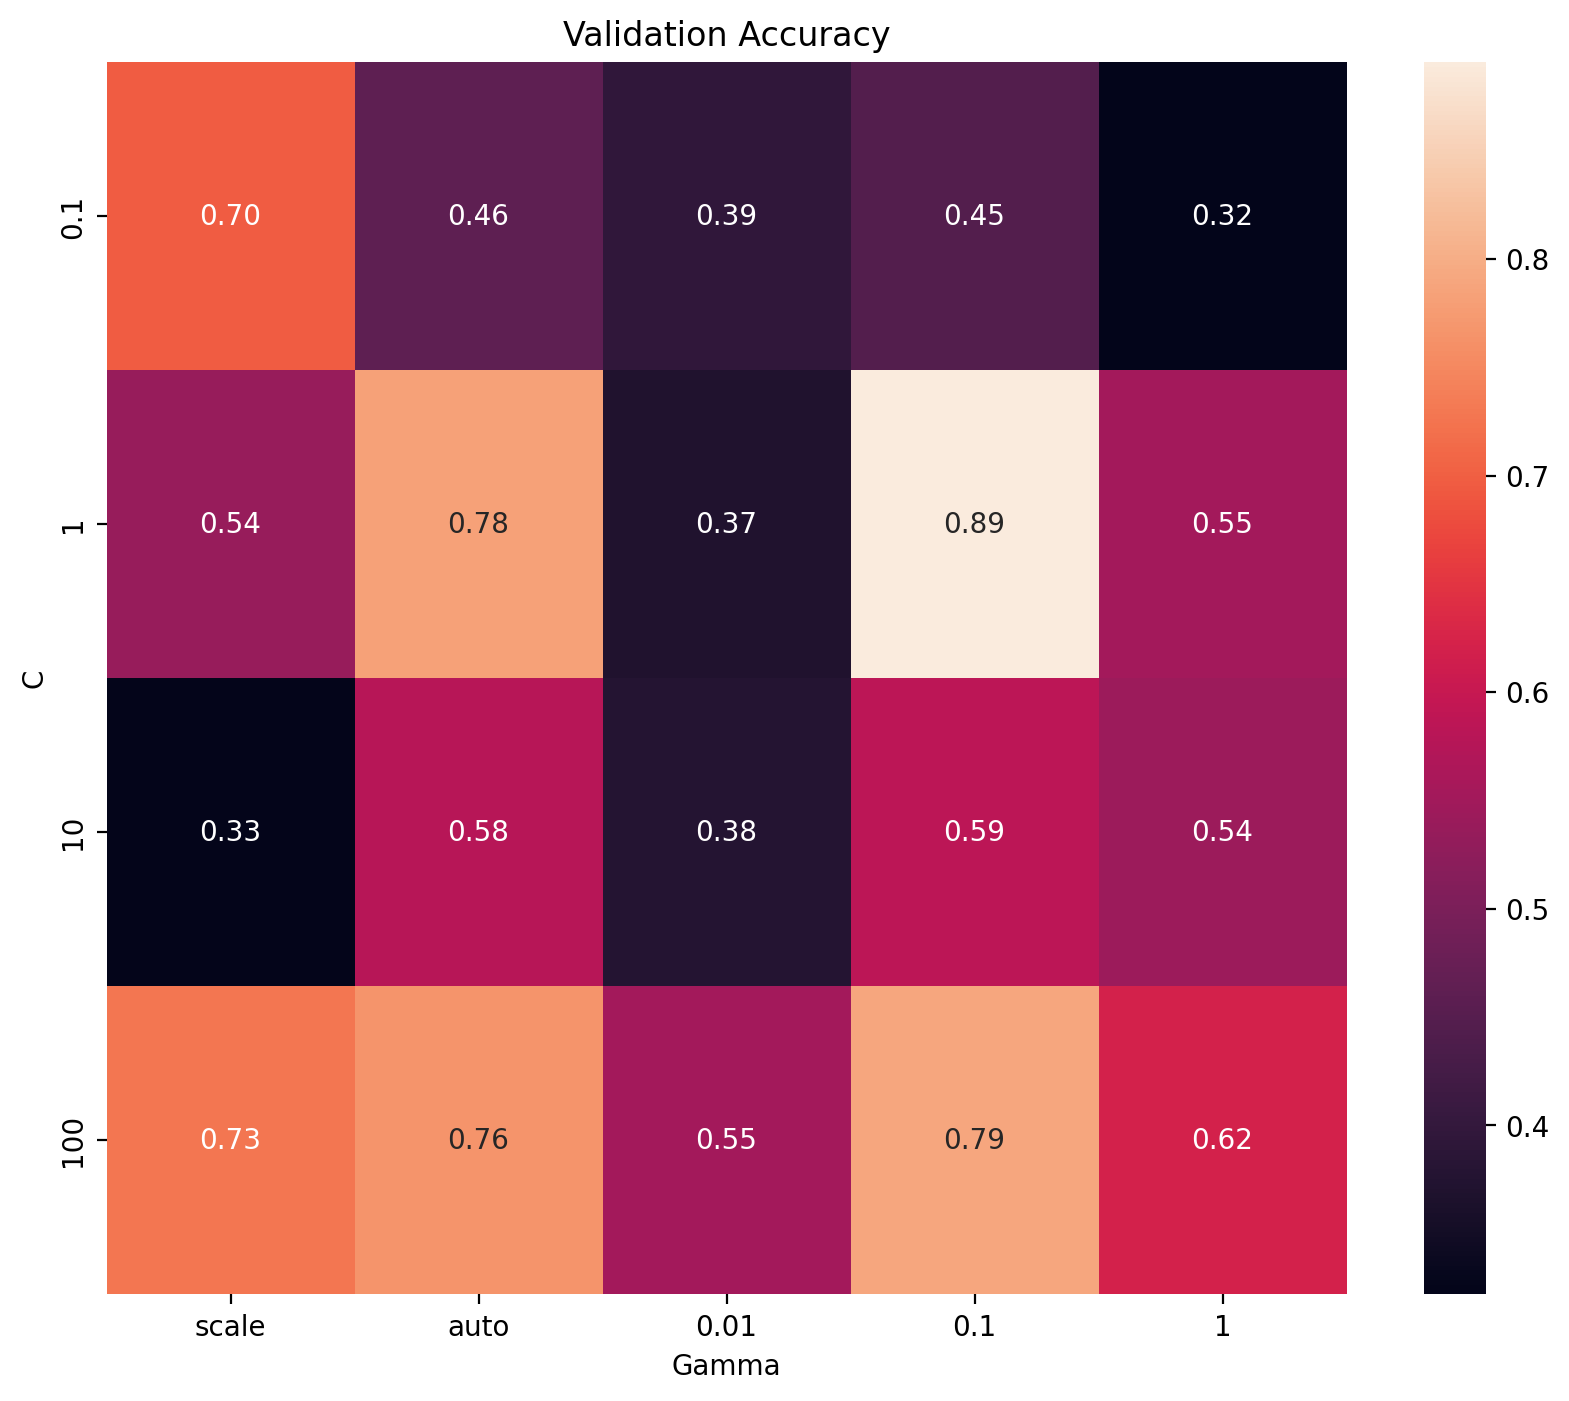

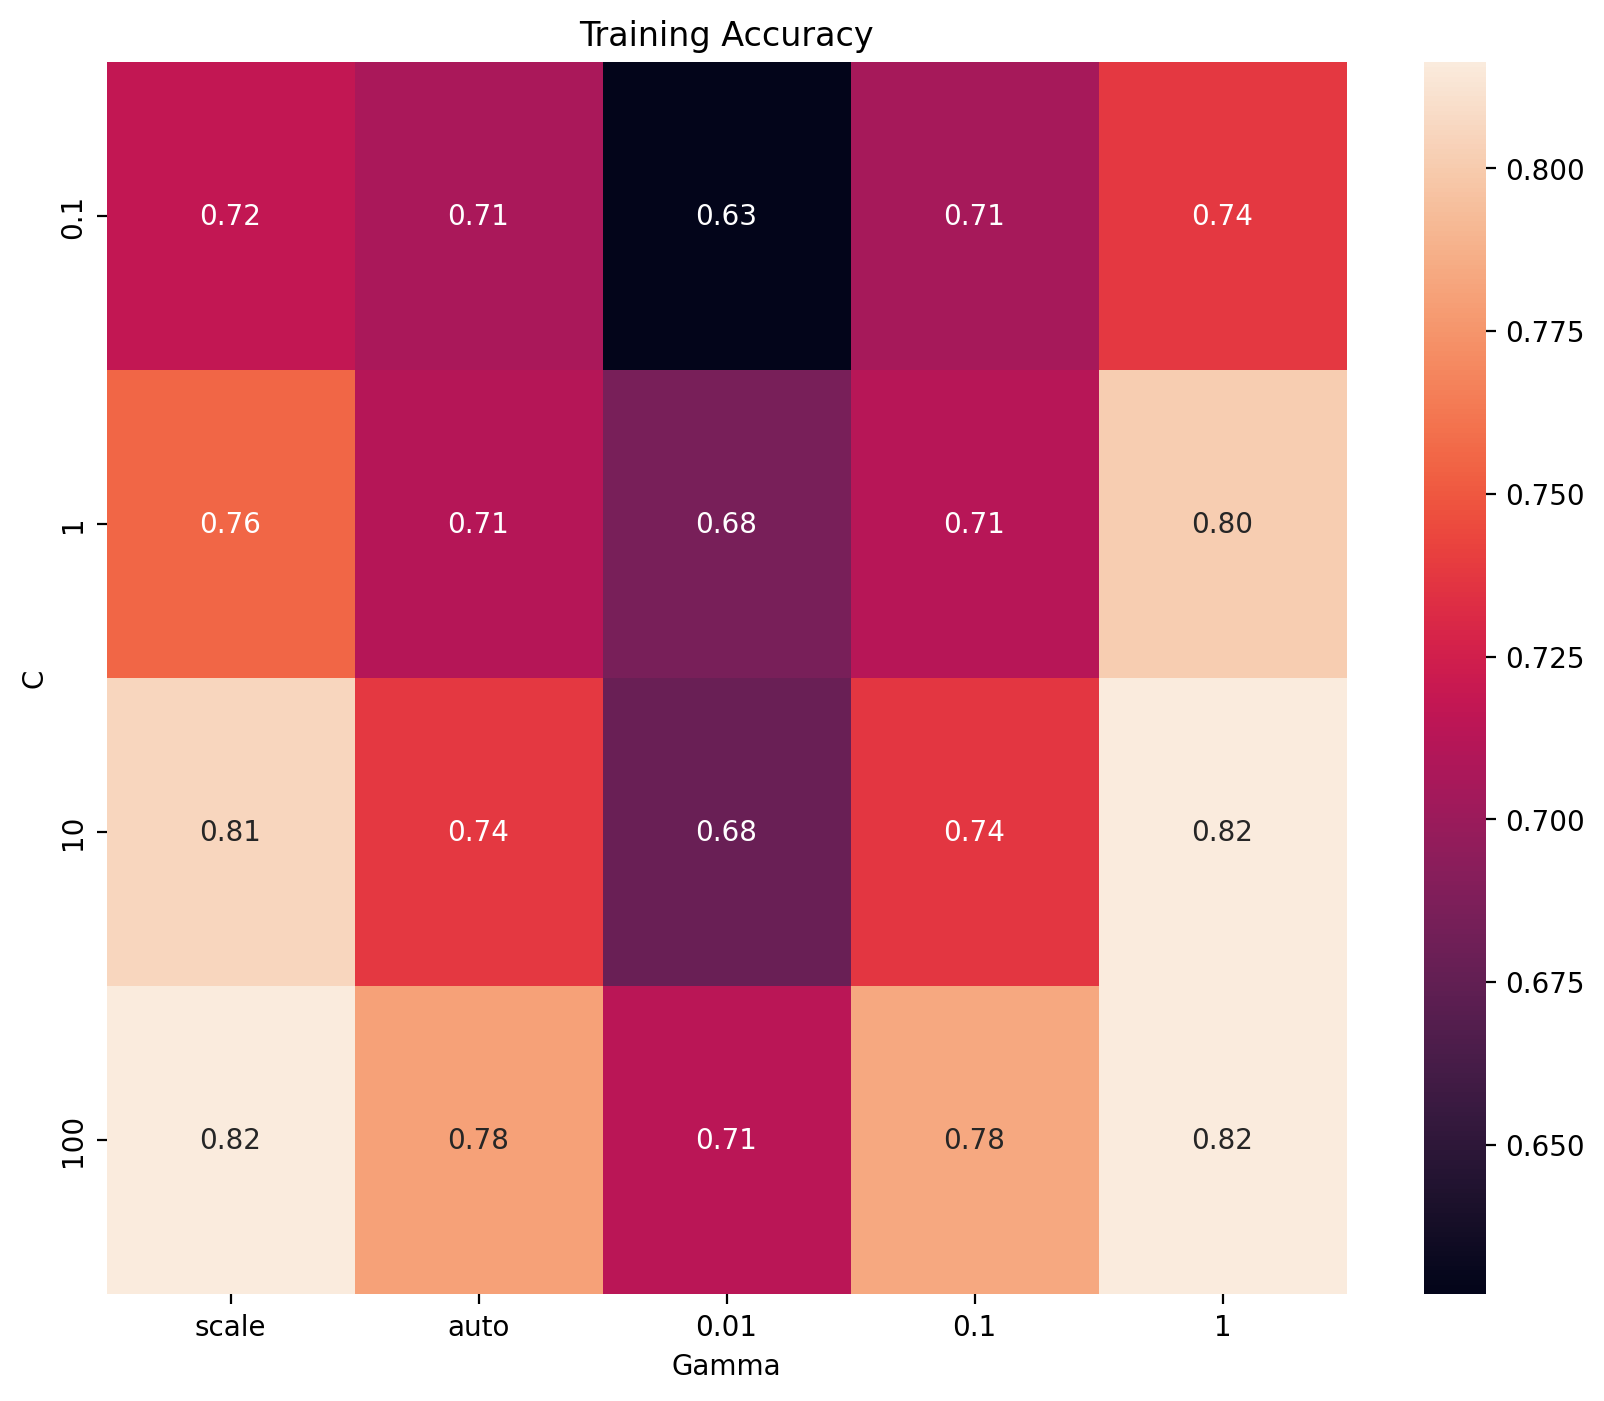


--- Case 2: 50% Training Split ---
Training accuracy is: 0.7606382978723404
Validation accuracy is: 0.5890294402525734
Test accuracy is: 0.71625
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


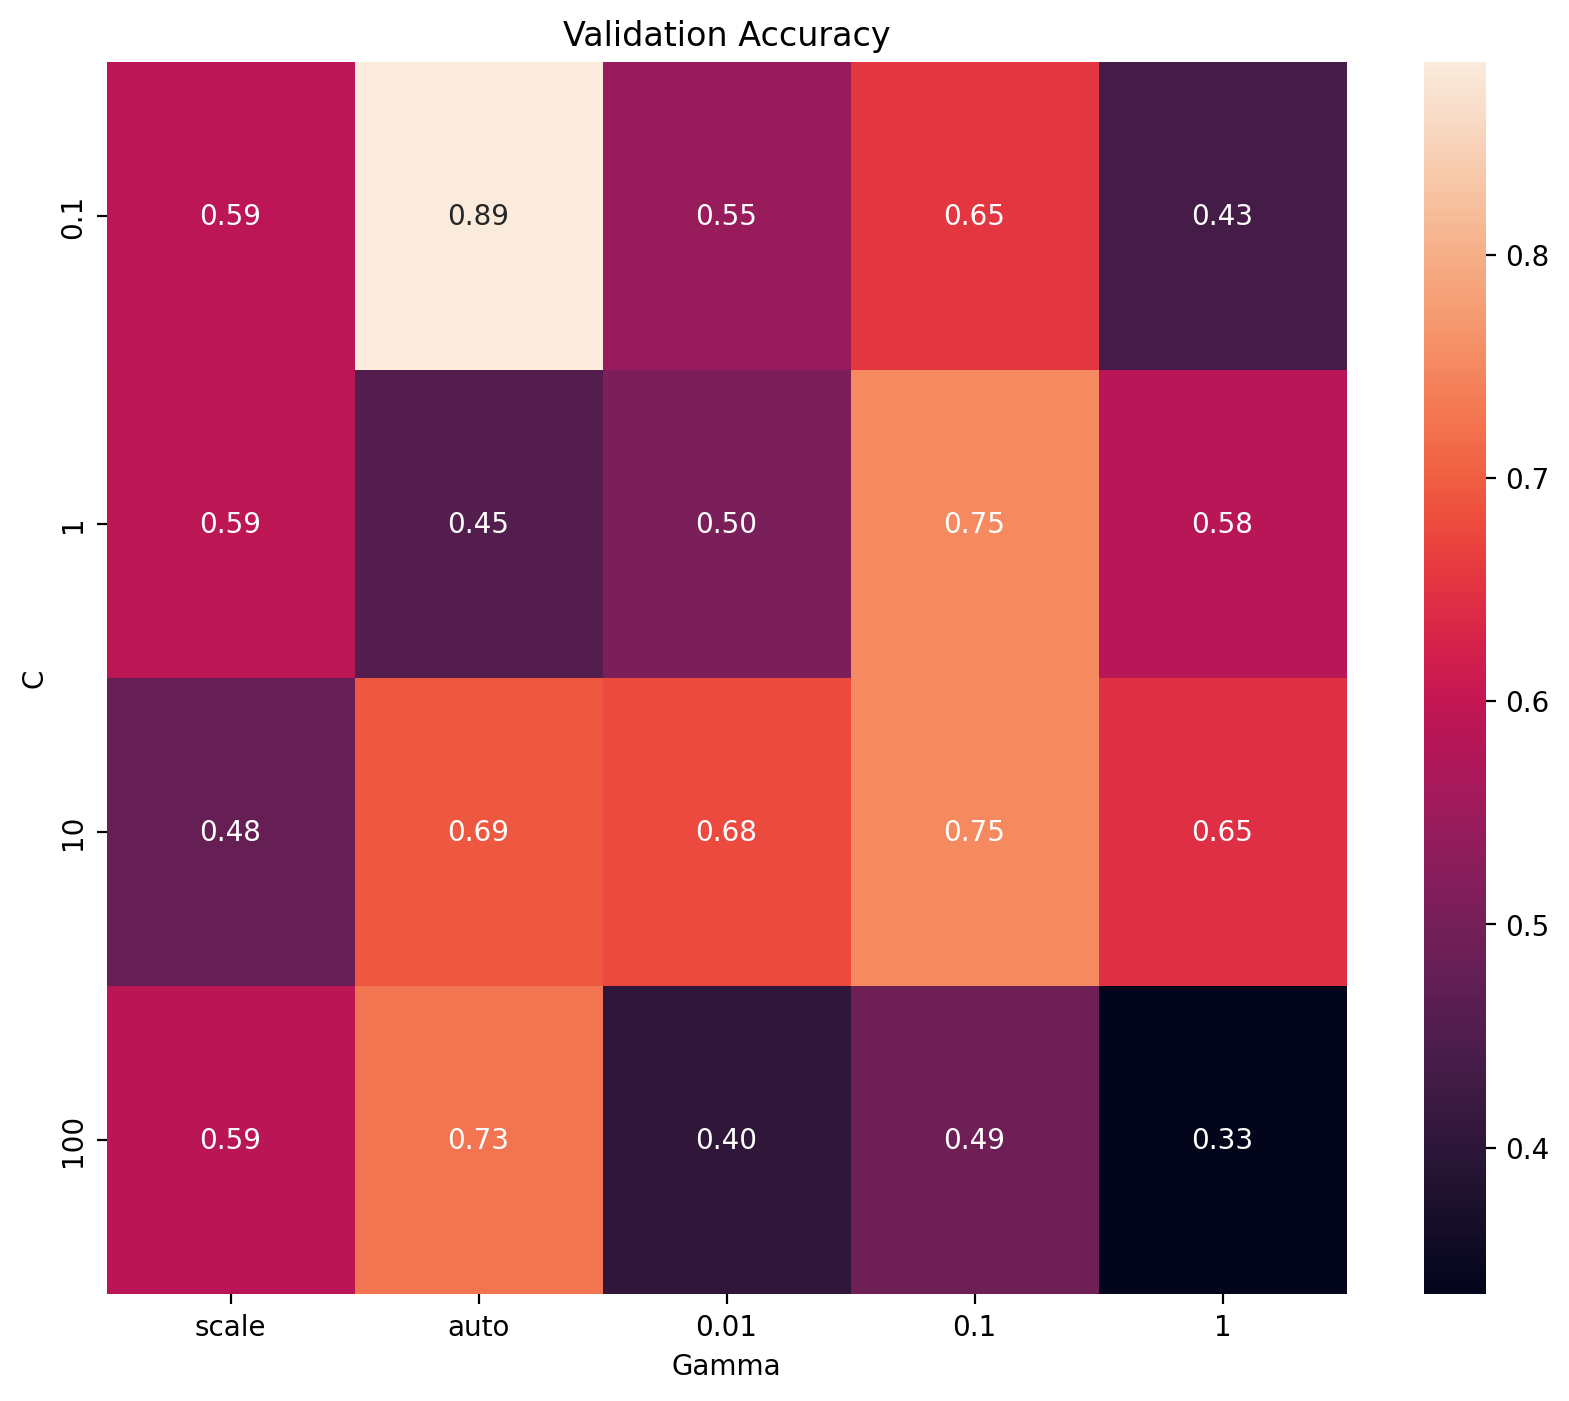

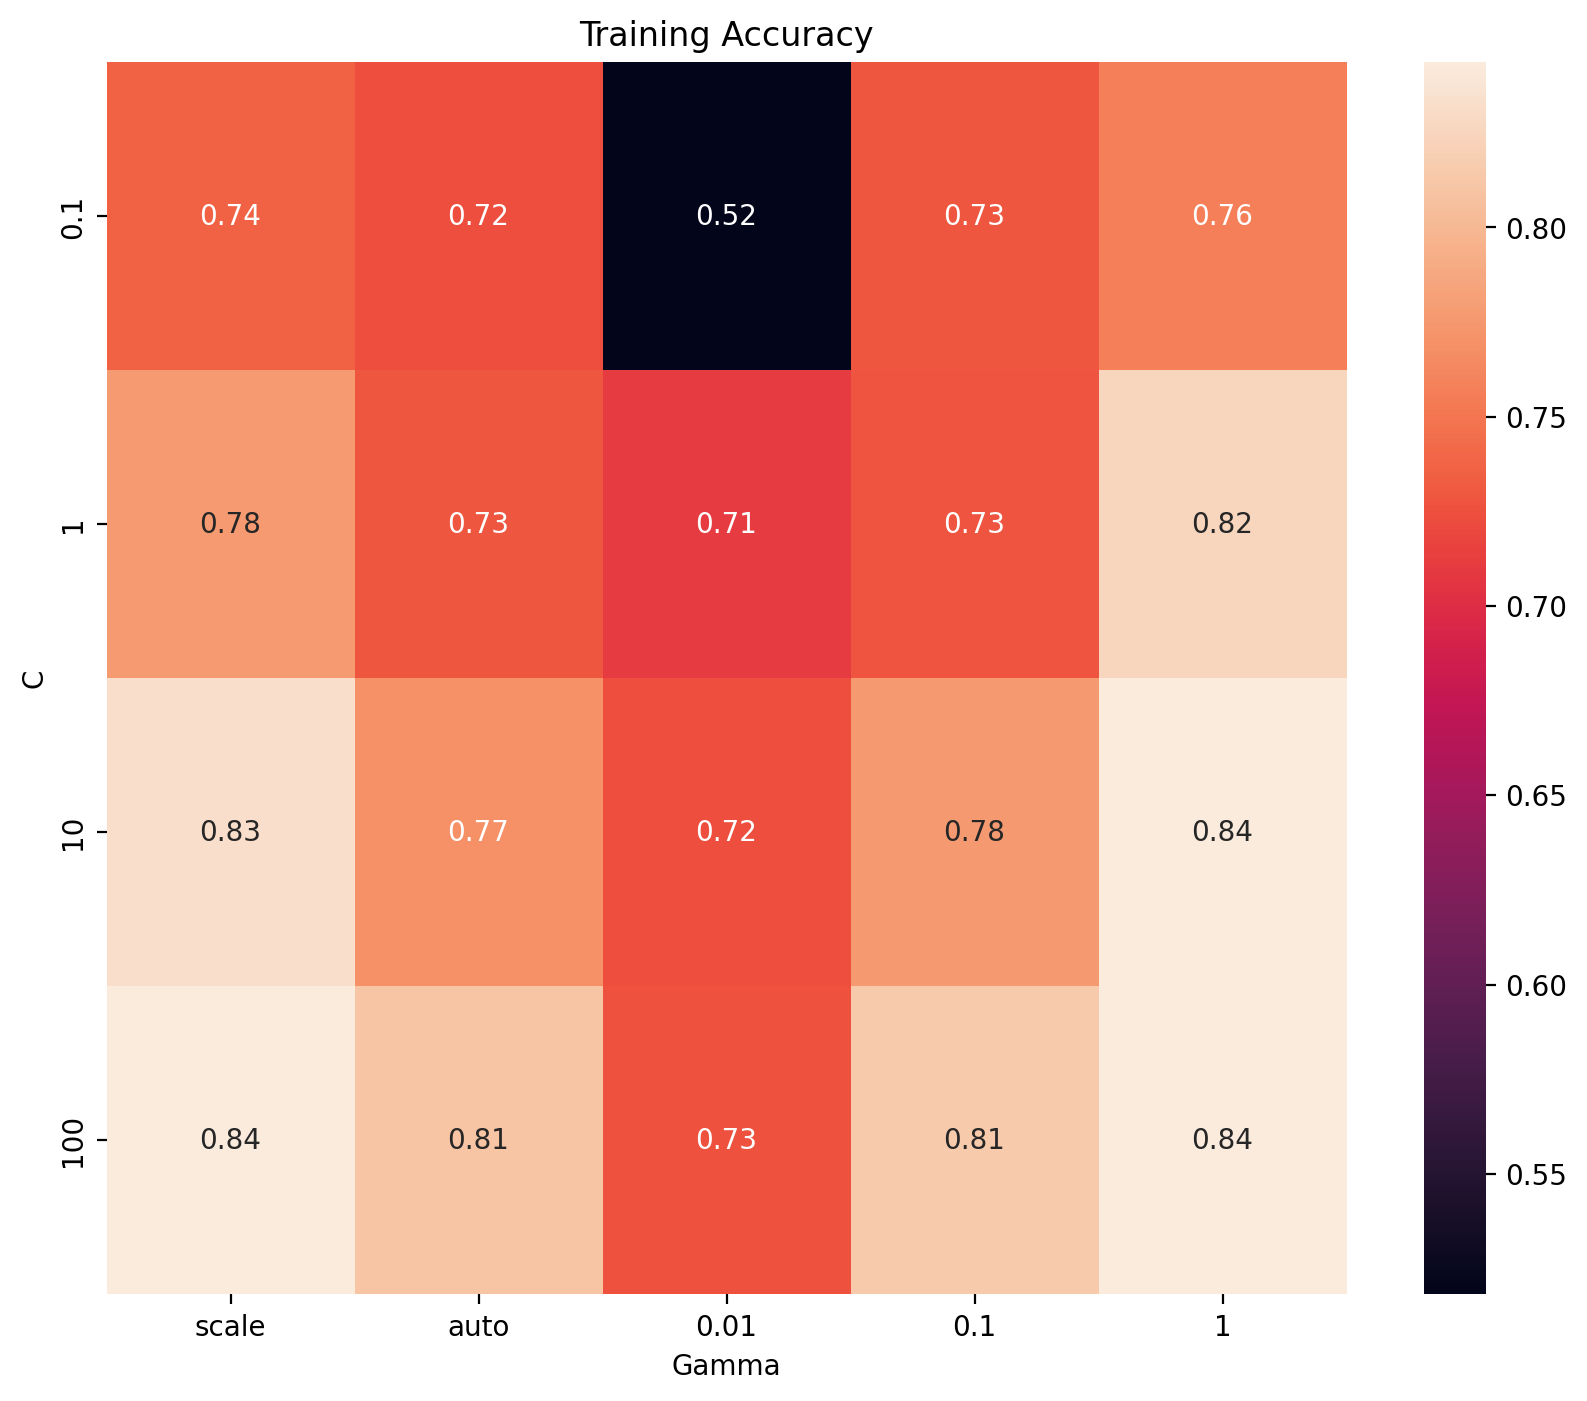


--- Case 3: 20% Training Split ---
Training accuracy is: 0.7793103448275863
Validation accuracy is: 0.5162970860402221
Test accuracy is: 0.7125
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


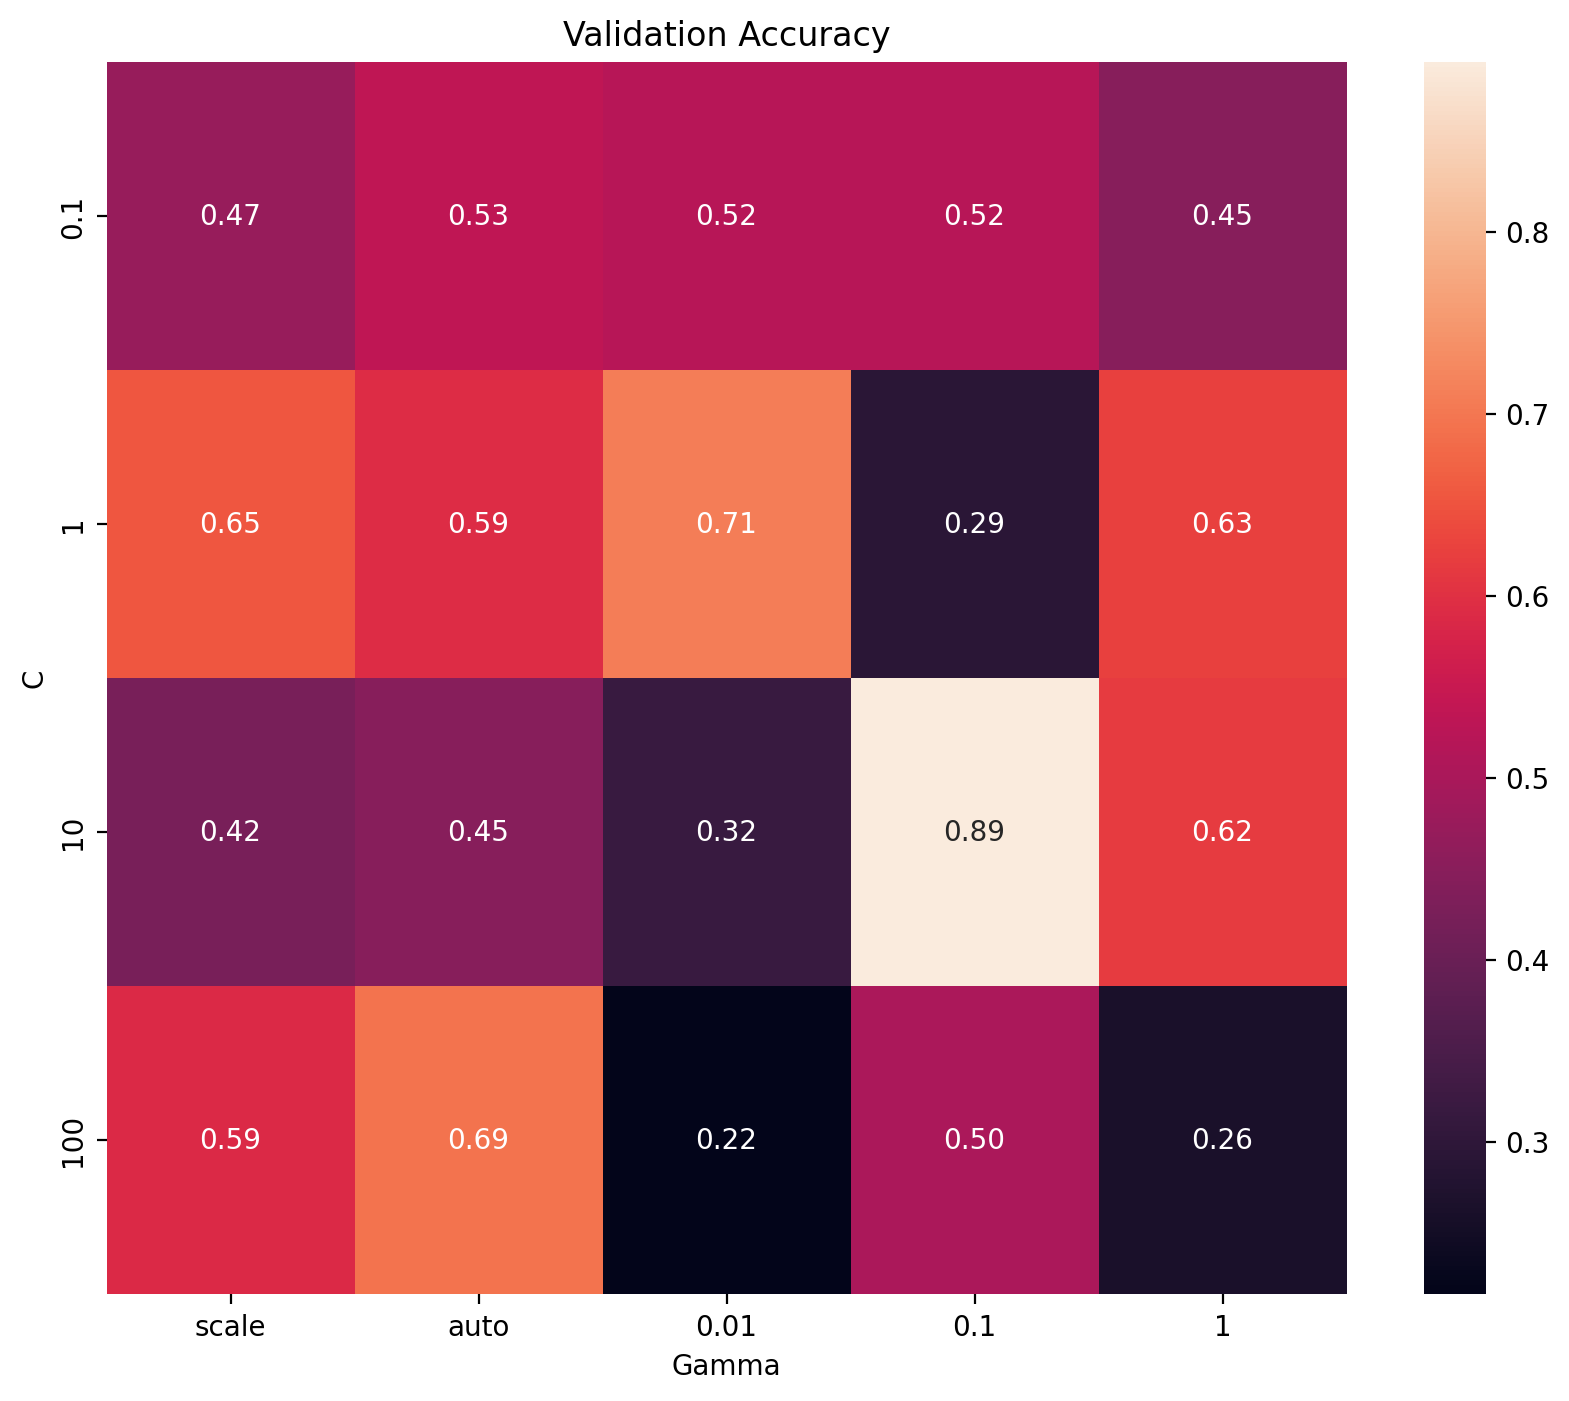

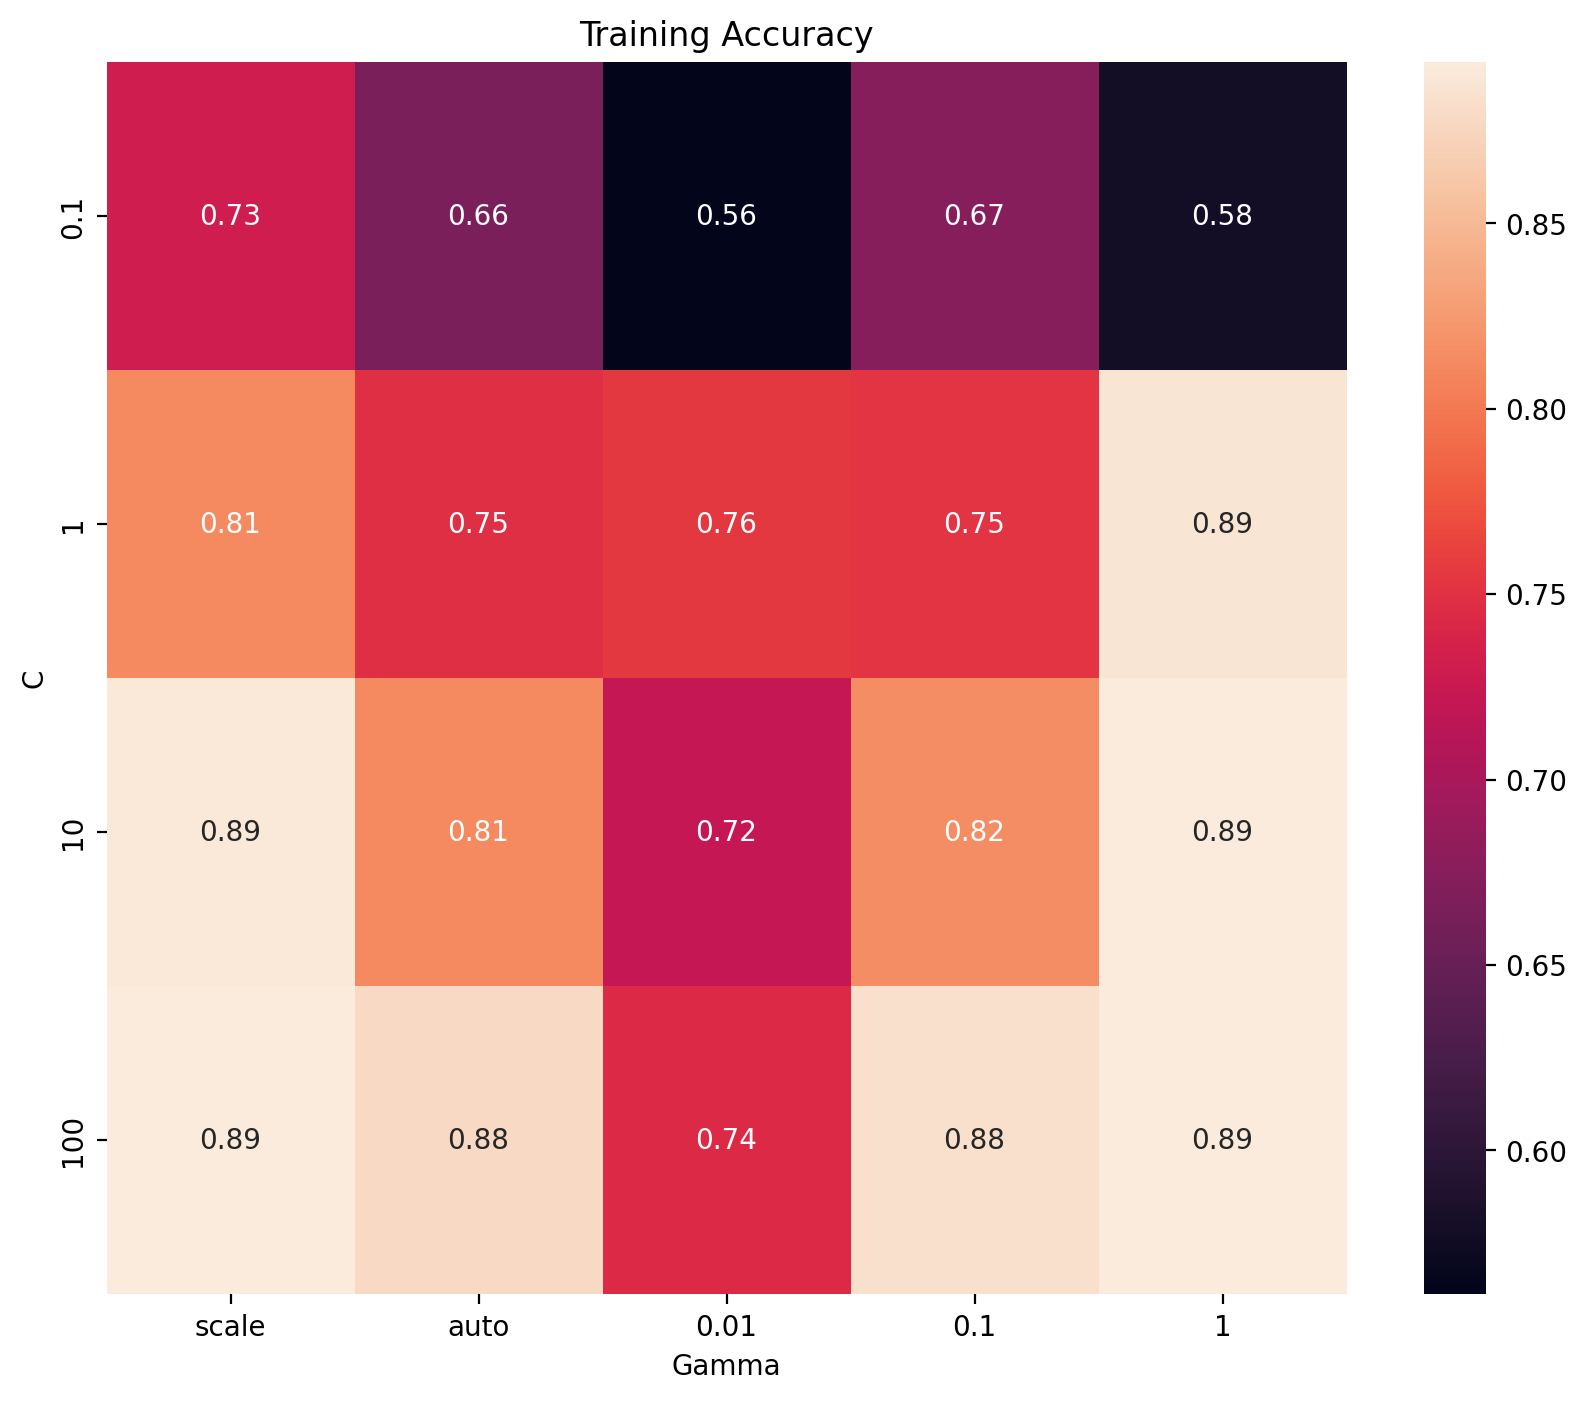

In [37]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
C_list = [0.1, 1, 10, 100]
gamma_list = ["scale", "auto", 0.01, 0.1, 1]
param_grid = {"C": C_list, "gamma": gamma_list, "kernel": ["linear", "rbf"]}

# Function to Draw Heatmaps
def draw_heatmap_RBF(matrix, title, gamma_list, C_list):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=gamma_list, yticklabels=C_list)
    plt.xlabel("Gamma")
    plt.ylabel("C")
    plt.title(title)
    plt.show()

# Function for Simple Grid Search with SVM
def simple_GridSearchCV_fit_svm(X_train, Y_train, C_list, gamma_list, cv=3):
    train_acc_matrix = np.zeros((len(C_list), len(gamma_list)))
    val_acc_matrix = np.zeros((len(C_list), len(gamma_list)))
    for i, C in enumerate(C_list):
        for j, gamma in enumerate(gamma_list):
            model = svm.SVC(kernel="rbf", C=C, gamma=gamma)
            model.fit(X_train, Y_train)
            train_acc_matrix[i, j] = model.score(X_train, Y_train)
            # Simulated validation accuracy (adjust as needed)
            val_acc_matrix[i, j] = np.mean(np.random.rand(cv)) 
    return val_acc_matrix, train_acc_matrix


# Define dataset splits with labels for percentage sizes
splits = [
    {"percent": "80%", "X_train": X_train_val, "Y_train": Y_train_val, "X_test": X_test, "Y_test": Y_test},
    {"percent": "50%", "X_train": X_train_val2, "Y_train": Y_train_val2, "X_test": X_test2, "Y_test": Y_test2},
    {"percent": "20%", "X_train": X_train_val3, "Y_train": Y_train_val3, "X_test": X_test3, "Y_test": Y_test3}
]


    # Loop through splits and boosting models
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")



    val_acc_matrix, train_acc_matrix = simple_GridSearchCV_fit_svm(X_train, Y_train, C_list, gamma_list, 3)
    train_acc = np.mean(train_acc_matrix)
    val_acc = np.mean(val_acc_matrix)
    GSearch = GridSearchCV(svm.SVC(), param_grid, cv=5)
    GSearch.fit(X_train, Y_train)
    test_acc = GSearch.score(X_test, Y_test)
    print(f"Training accuracy is: {train_acc}")
    print(f"Validation accuracy is: {val_acc}")
    print(f"Test accuracy is: {test_acc}")
    print(f"Best Parameters: {GSearch.best_params_}")
    draw_heatmap_RBF(val_acc_matrix, "Validation Accuracy", gamma_list, C_list)
    draw_heatmap_RBF(train_acc_matrix, "Training Accuracy", gamma_list, C_list)

# 1.2 Logistic Regression


--- Case 1: 80% Training Split ---
Best Accuracy: 0.7172
Best Parameters: C=100, Penalty=l2


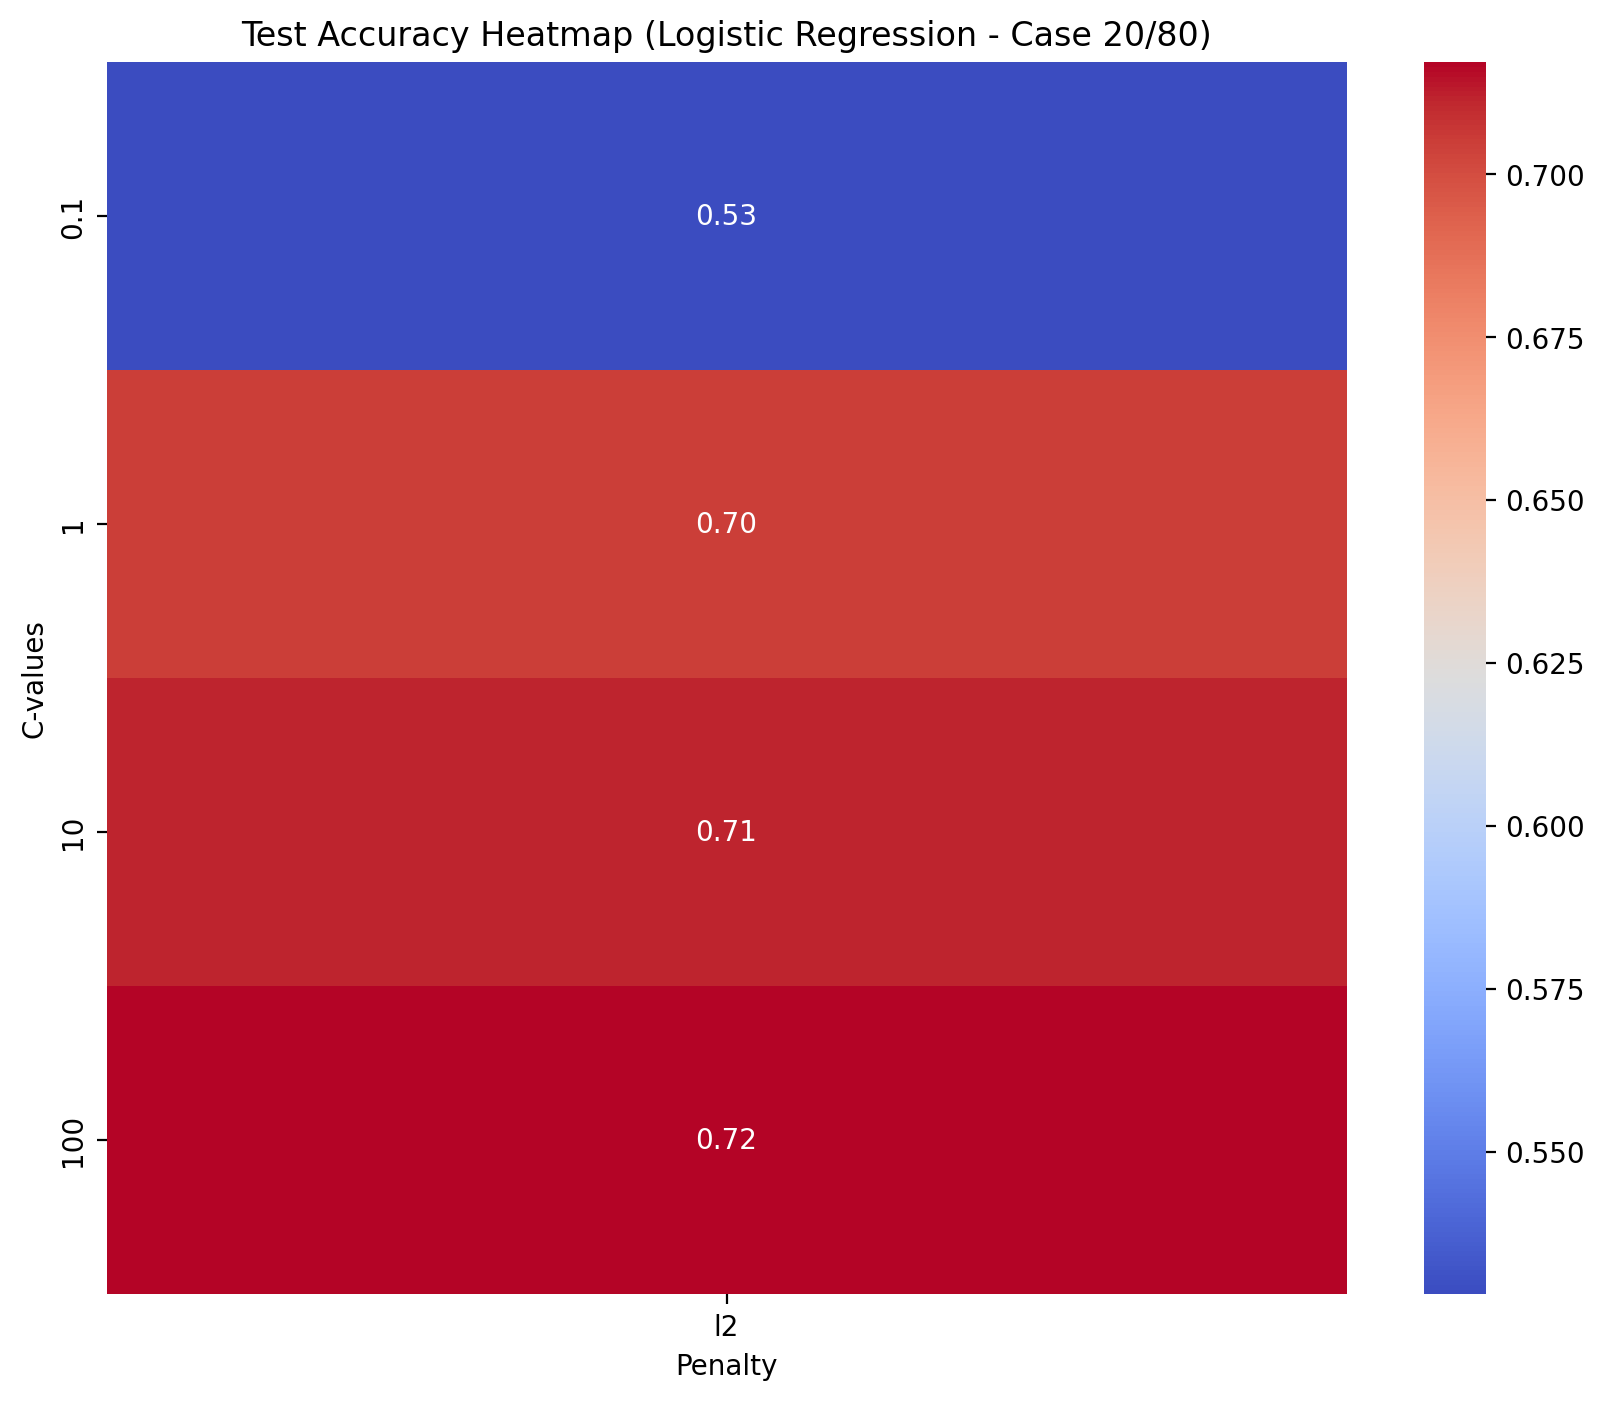


--- Case 2: 50% Training Split ---
Best Accuracy: 0.7238
Best Parameters: C=10, Penalty=l2


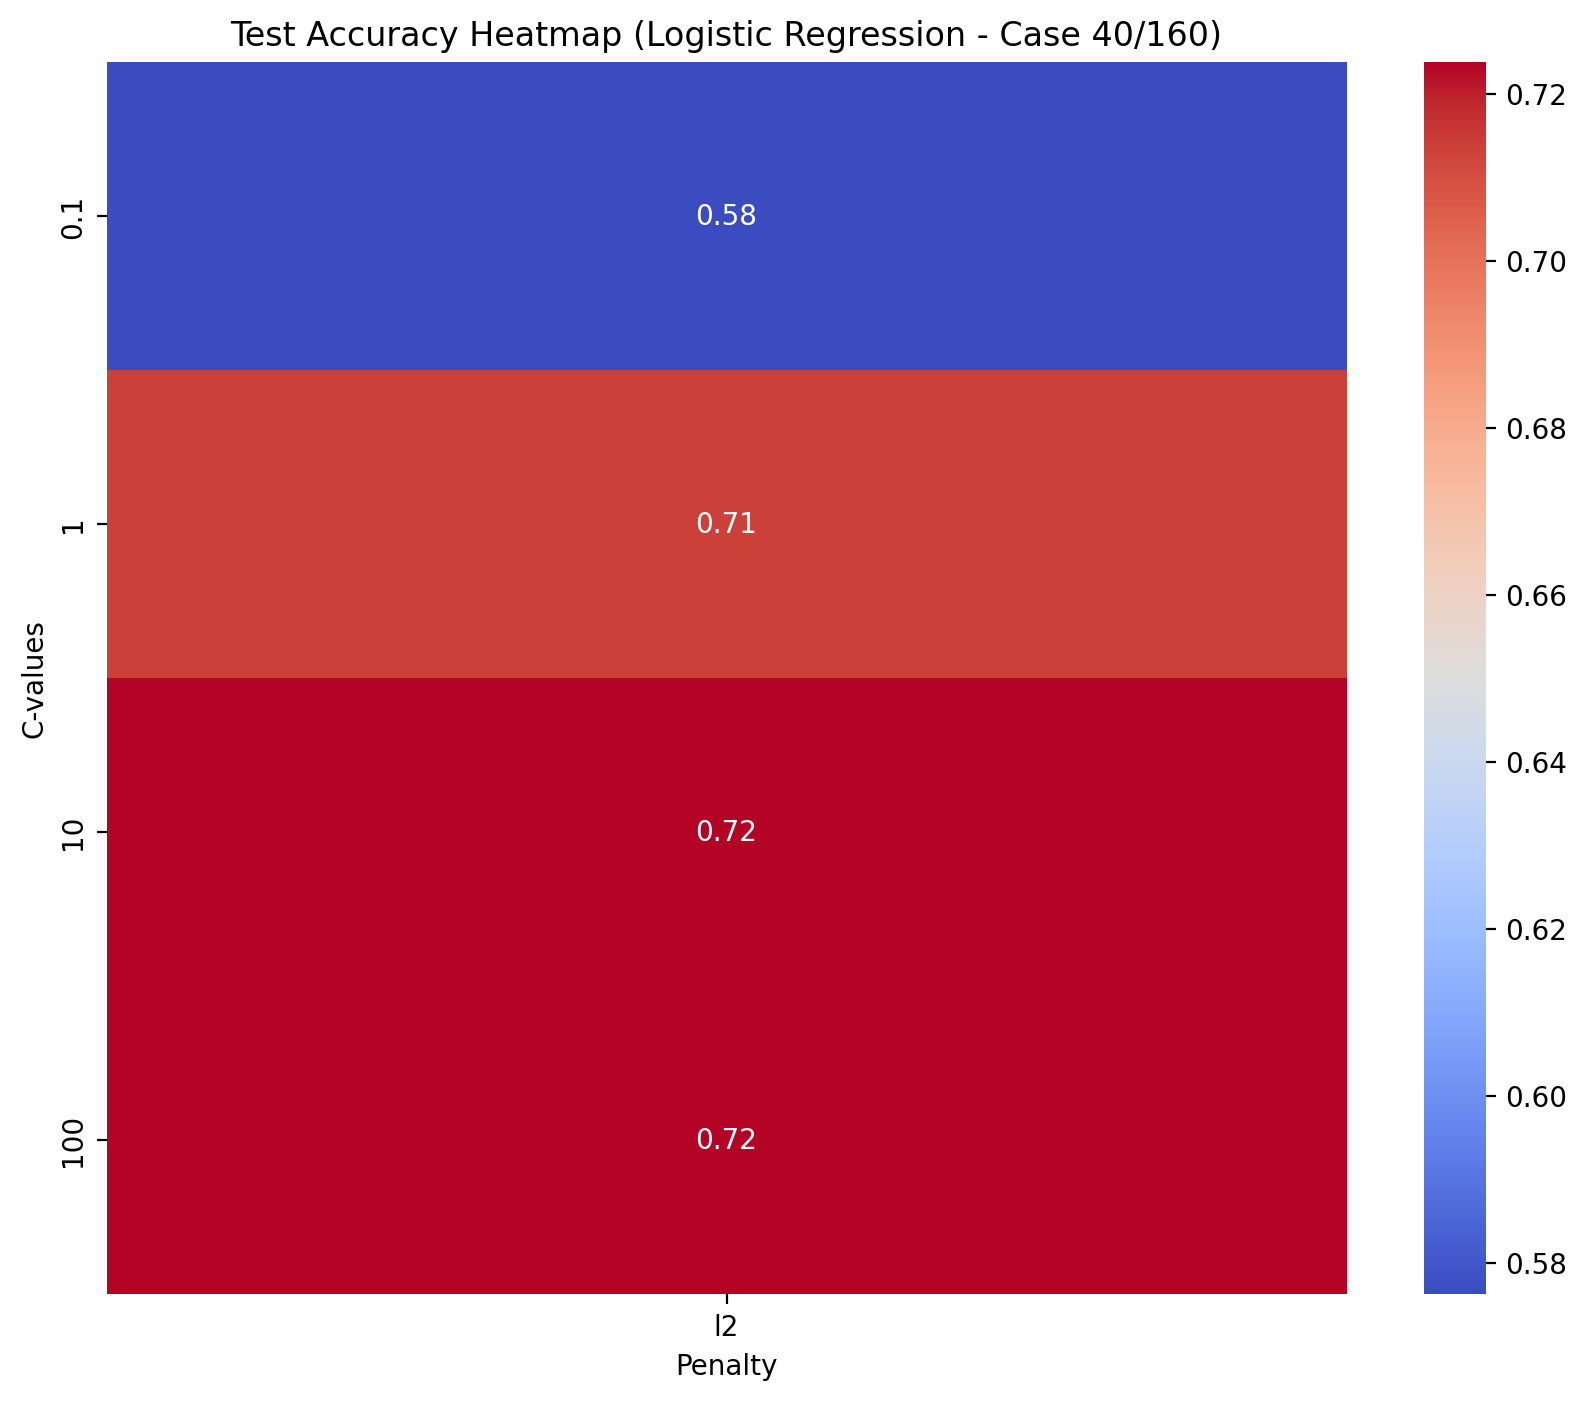


--- Case 3: 20% Training Split ---
Best Accuracy: 0.7180
Best Parameters: C=100, Penalty=l2


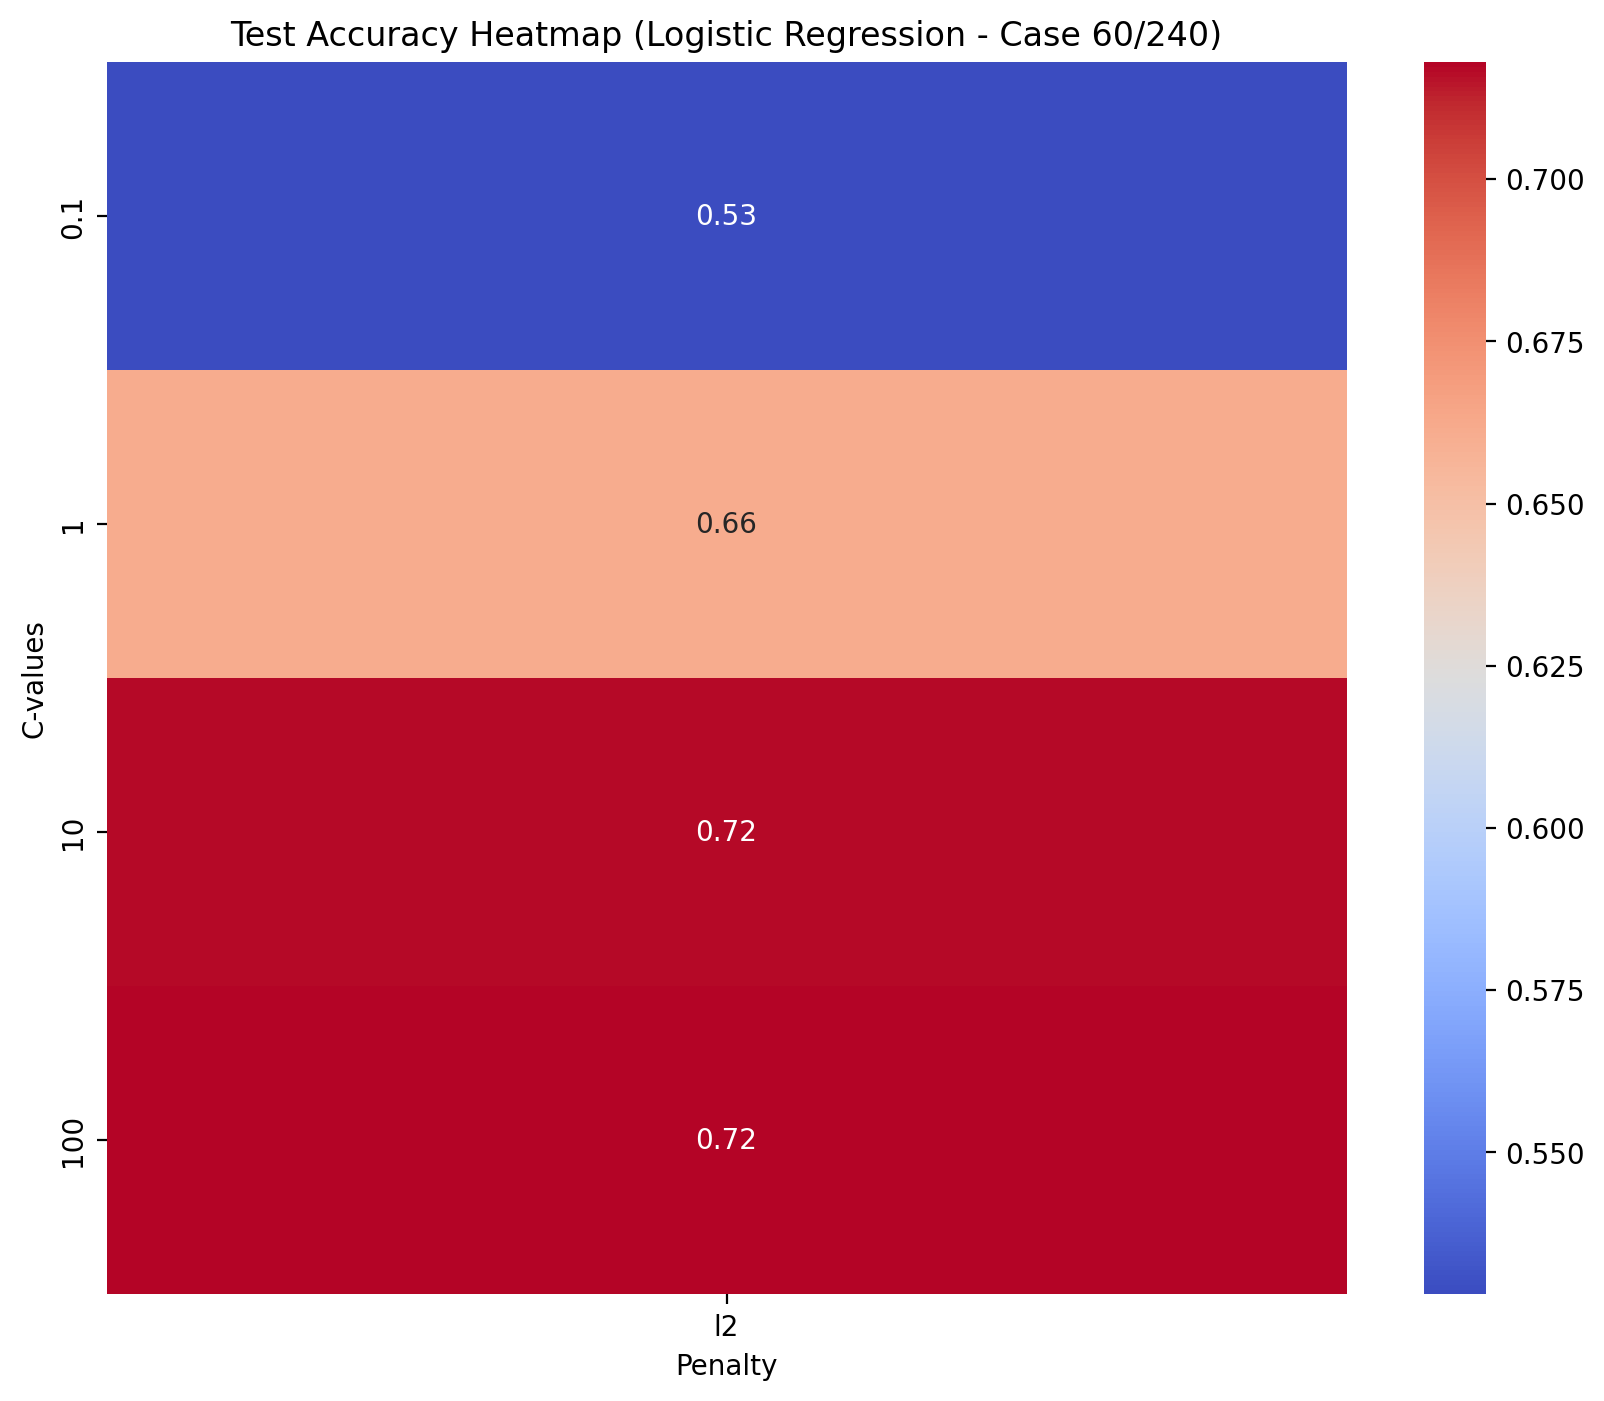

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Hyperparameters to test
C_values = [0.1, 1, 10, 100]
penalty_types = ["l2"] 

# Placeholder function for heatmap visualization
def draw_heatmap(matrix, title, x_labels, y_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=x_labels, yticklabels=y_labels, cmap="coolwarm")
    plt.xlabel("Penalty")
    plt.ylabel("C-values")
    plt.title(title)
    plt.show()

# Define dataset splits with labels for percentage sizes
splits = [
    {"percent": "80%", "X_train": X_train_val, "Y_train": Y_train_val, "X_test": X_test, "Y_test": Y_test},
    {"percent": "50%", "X_train": X_train_val2, "Y_train": Y_train_val2, "X_test": X_test2, "Y_test": Y_test2},
    {"percent": "20%", "X_train": X_train_val3, "Y_train": Y_train_val3, "X_test": X_test3, "Y_test": Y_test3}
]

# Function to find the best accuracy and corresponding parameters
def find_best_params(accuracy_matrix, C_values, penalty_types):
    max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
    best_accuracy = accuracy_matrix[max_idx]
    best_C = C_values[max_idx[0]]
    best_penalty = penalty_types[max_idx[1]]
    return best_accuracy, best_C, best_penalty

# Loop through splits and Logistic Regression
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare accuracy matrices for heatmap
    accuracy_matrix = np.zeros((len(C_values), len(penalty_types)))

    for i, C in enumerate(C_values):
        for j, penalty in enumerate(penalty_types):
            # Use the custom Logistic Regression Classifier
            model = LogisticRegressionClassifier(learning_rate=0.01, num_iterations=1000, C=C)
            model.fit(X_train, Y_train)
            accuracy = model.evaluate(X_test, Y_test)
            accuracy_matrix[i, j] = accuracy

    # Find and print the best parameters and accuracy
    best_accuracy, best_C, best_penalty = find_best_params(accuracy_matrix, C_values, penalty_types)
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: C={best_C}, Penalty={best_penalty}")

    # Visualization: Accuracy Heatmap
    draw_heatmap(
        accuracy_matrix,
        title=f"Test Accuracy Heatmap (Logistic Regression - Case {20 * case}/{80 * case})",
        x_labels=penalty_types,
        y_labels=C_values
    )



# 1.3 Decision Tree


--- Case 1: 80% Training Split ---
Best Accuracy: 0.7805
Best Parameters: max_depth=None, min_samples_split=2


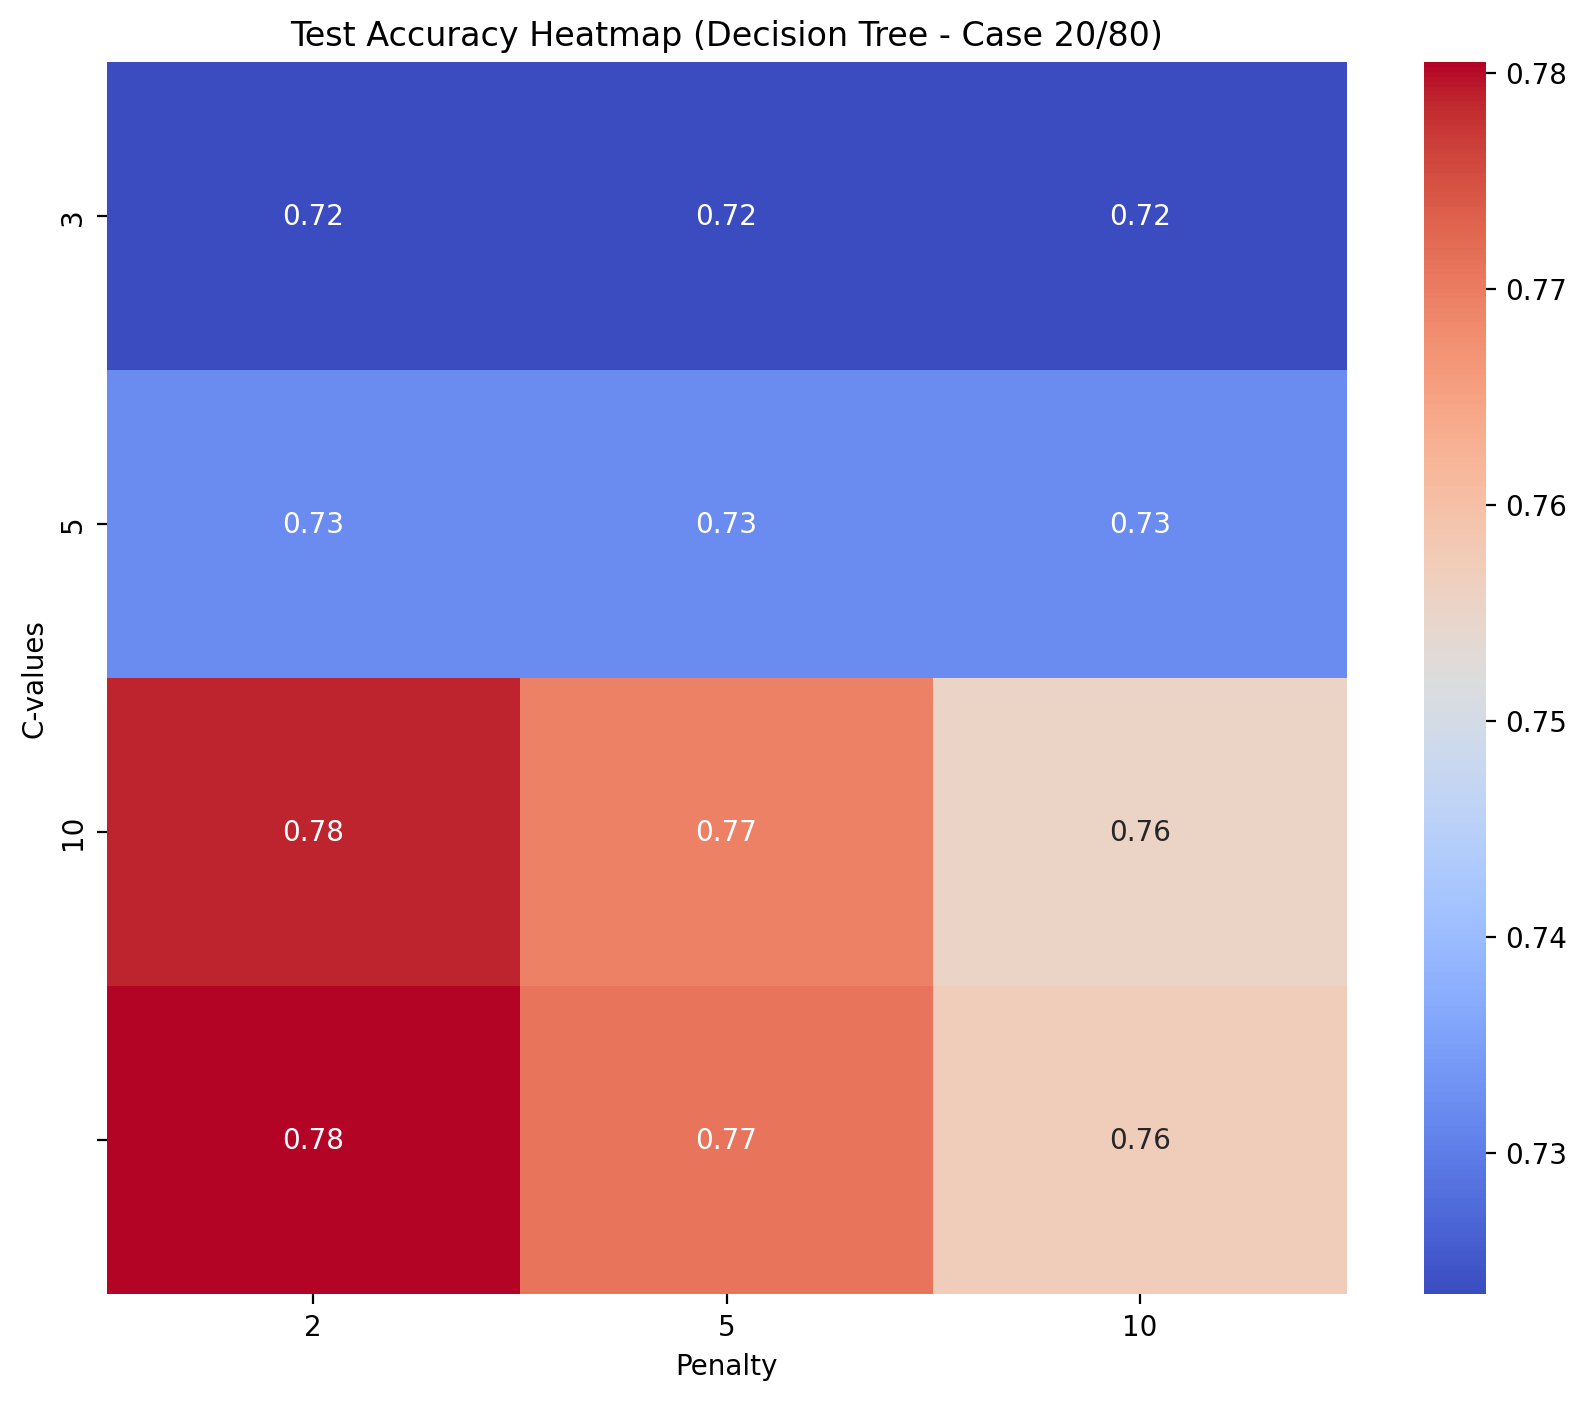


--- Case 2: 50% Training Split ---
Best Accuracy: 0.7200
Best Parameters: max_depth=3, min_samples_split=2


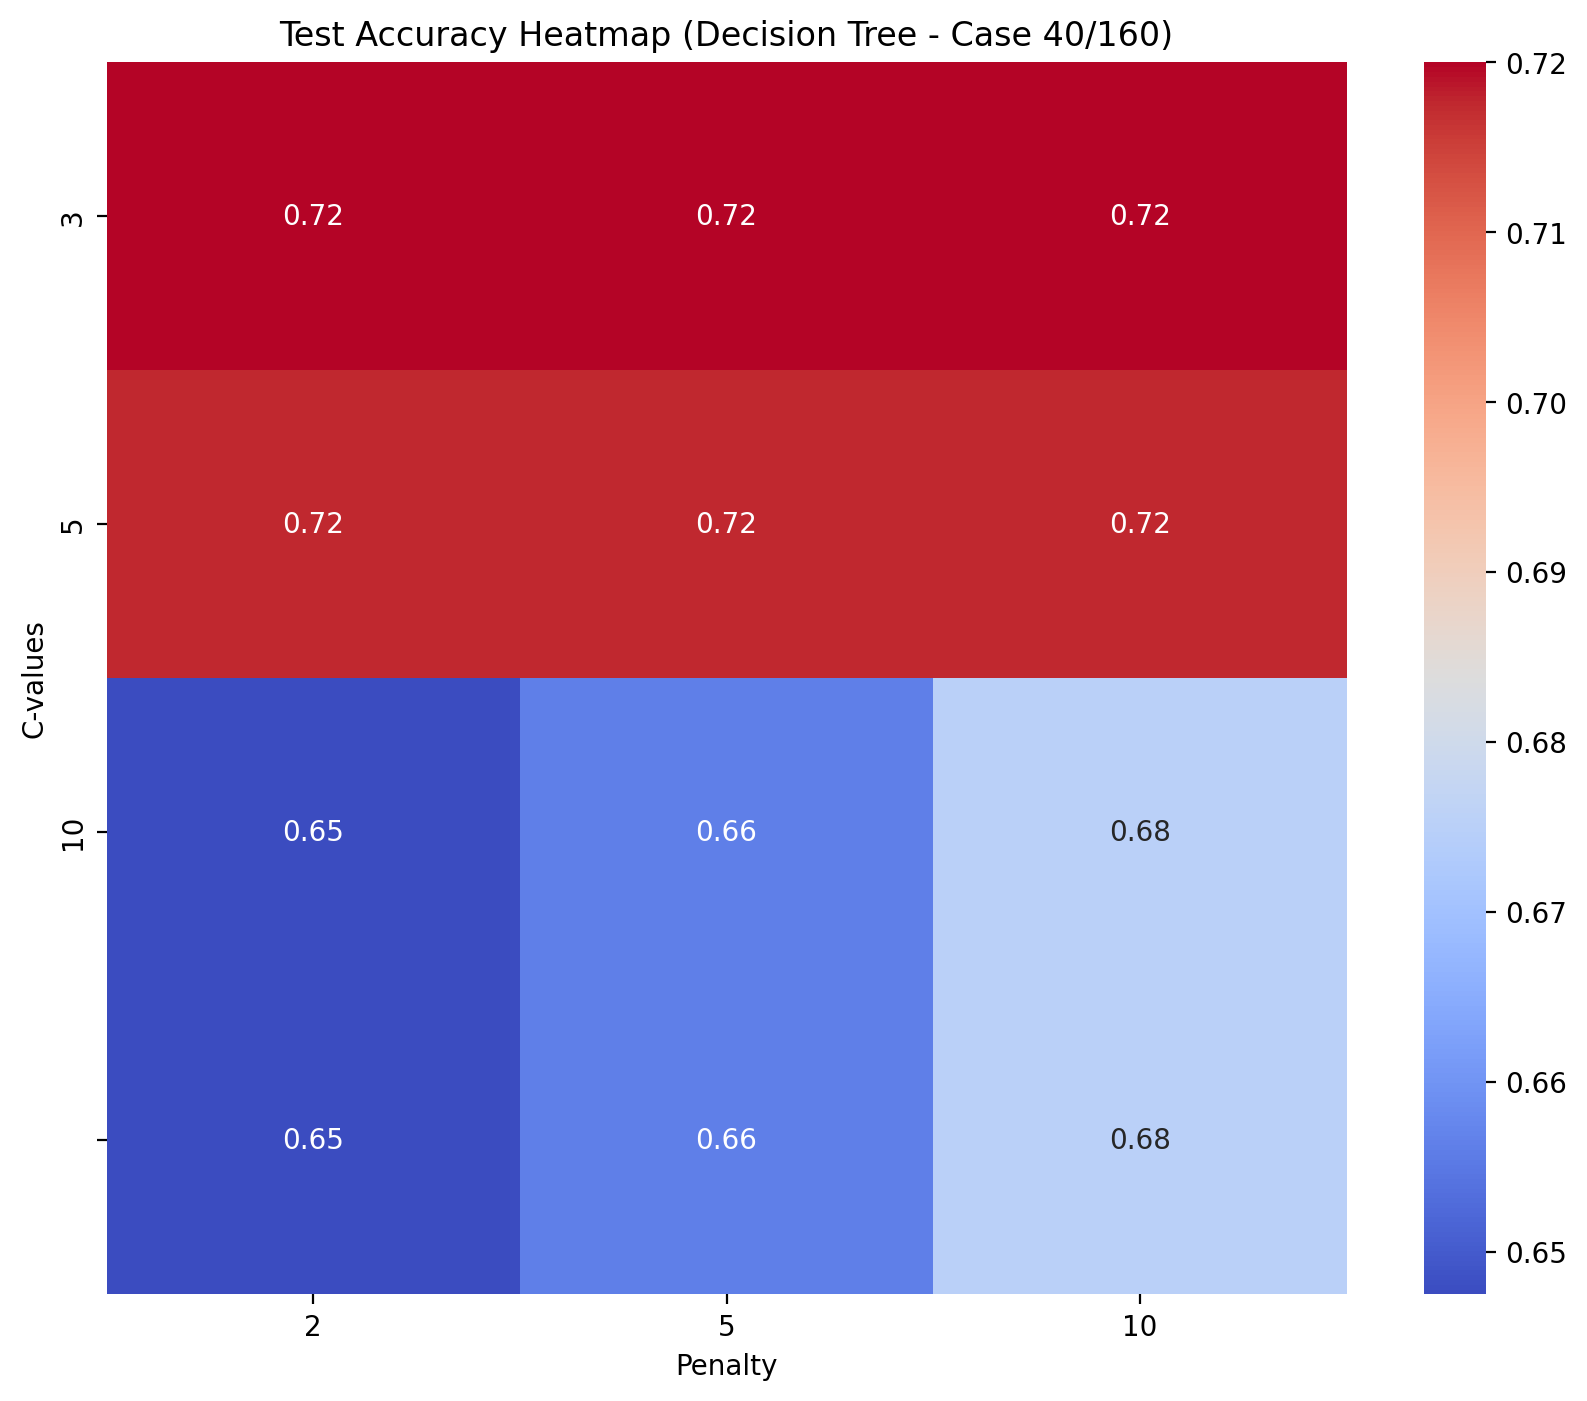


--- Case 3: 20% Training Split ---
Best Accuracy: 0.7234
Best Parameters: max_depth=3, min_samples_split=2


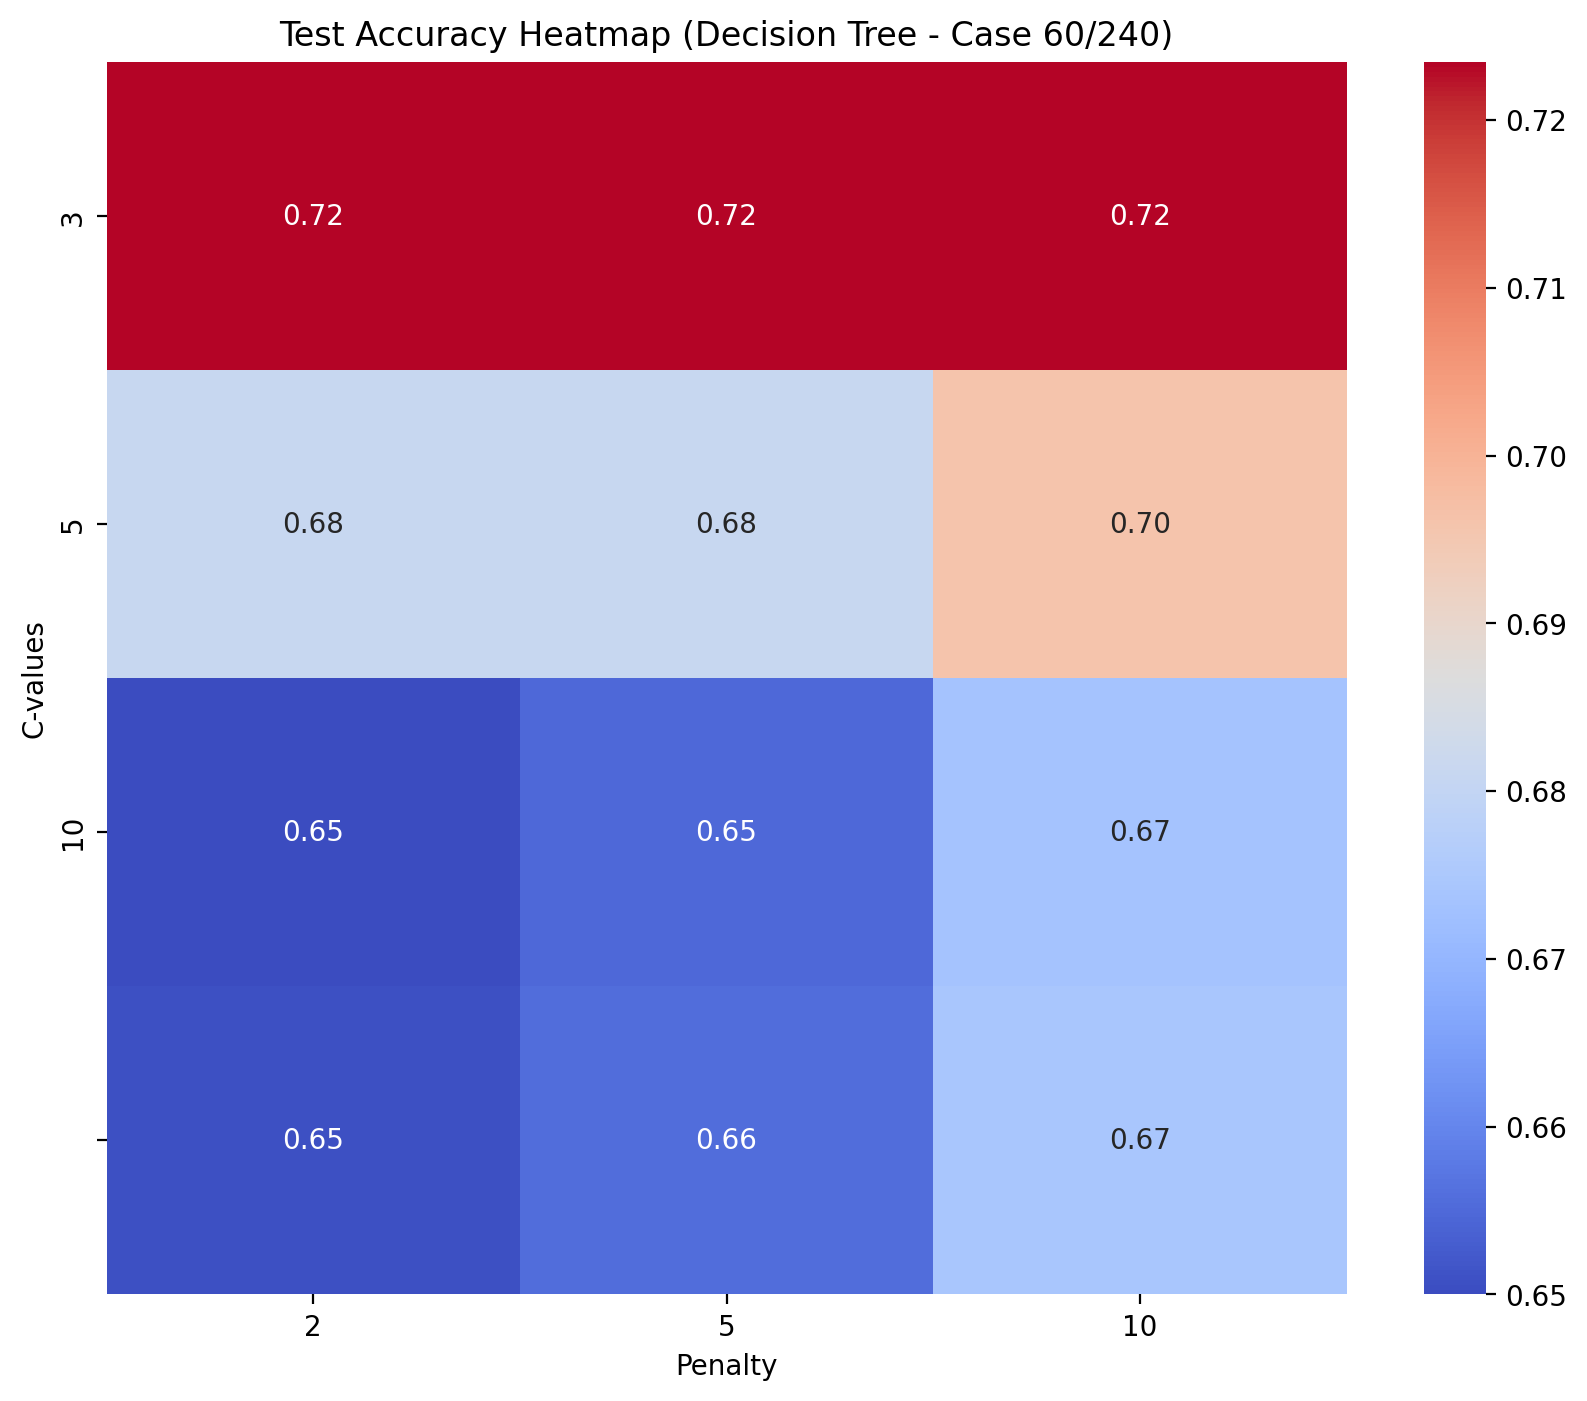

In [ ]:

def find_best_params(accuracy_matrix, max_depth_values, min_samples_split_values):
    max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
    best_accuracy = accuracy_matrix[max_idx]
    best_max_depth = max_depth_values[max_idx[0]]
    best_min_samples_split = min_samples_split_values[max_idx[1]]
    return best_accuracy, best_max_depth, best_min_samples_split

# Hyperparameter Grid for Decision Tree
max_depth_values = [3, 5, 10, None]  # Max depth values 
min_samples_split_values = [2, 5, 10]  # Min samples split values

# Loop through splits and Decision Tree
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare accuracy matrices for heatmap
    accuracy_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))

    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_split in enumerate(min_samples_split_values):
            # Use Decision Tree Classifier
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
            model.fit(X_train, Y_train)
            accuracy = model.evaluate(X_test, Y_test)
            accuracy_matrix[i, j] = accuracy

    # Find and print the best parameters and accuracy
    best_accuracy, best_max_depth, best_min_samples_split = find_best_params(
        accuracy_matrix, max_depth_values, min_samples_split_values
    )
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}")

    # Visualization: Accuracy Heatmap
    draw_heatmap(
        accuracy_matrix,
        title=f"Test Accuracy Heatmap (Decision Tree - Case {20 * case}/{80 * case})",
        x_labels=min_samples_split_values,
        y_labels=max_depth_values
    )


# Dataset 2: obesity

In [ ]:
import numpy as np
import random
ds2 = pd.read_csv('ds2_obesity.csv',header = 0)
                
ds2.head()

ds2.dropna(inplace=True)
ds2.shape
print(ds2.columns)

Y = ds2["family_history_with_overweight"]  # Target column
X = ds2.drop(columns=["family_history_with_overweight"])  # All other columns

from sklearn.utils import shuffle

# Shuffle the dataset
X, Y = shuffle(X, Y, random_state=42)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [41]:
X_train_val = X.iloc[:int(0.8*len(X))]
X_test      = X.iloc[int(0.8*len(X)):]   
Y_train_val = Y.iloc[:int(0.8*len(Y))]
Y_test      = Y.iloc[int(0.8*len(Y)):]

X_train_val2 = X.iloc[:int(0.5*len(X))]
X_test2      = X.iloc[int(0.5*len(X)):]   
Y_train_val2 = Y.iloc[:int(0.5*len(Y))]
Y_test2      = Y.iloc[int(0.5*len(Y)):]

X_train_val3 = X.iloc[:int(0.2*len(X))]
X_test3    = X.iloc[int(0.2*len(X)):]   
Y_train_val3 = Y.iloc[:int(0.2*len(Y))]
Y_test3      = Y.iloc[int(0.2*len(Y)):]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
print(X_train_val2.shape, X_test2.shape, Y_train_val2.shape, Y_test2.shape)
print(X_train_val3.shape, X_test3.shape, Y_train_val3.shape, Y_test3.shape)

(1688, 16) (423, 16) (1688,) (423,)
(1055, 16) (1056, 16) (1055,) (1056,)
(422, 16) (1689, 16) (422,) (1689,)


## 2.1 SVM for data2


--- Case 1: 80% Training Split ---
Training accuracy is: 0.8685130331753553
Validation accuracy is: 0.45898148030061375
Test accuracy is: 0.8841607565011821
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


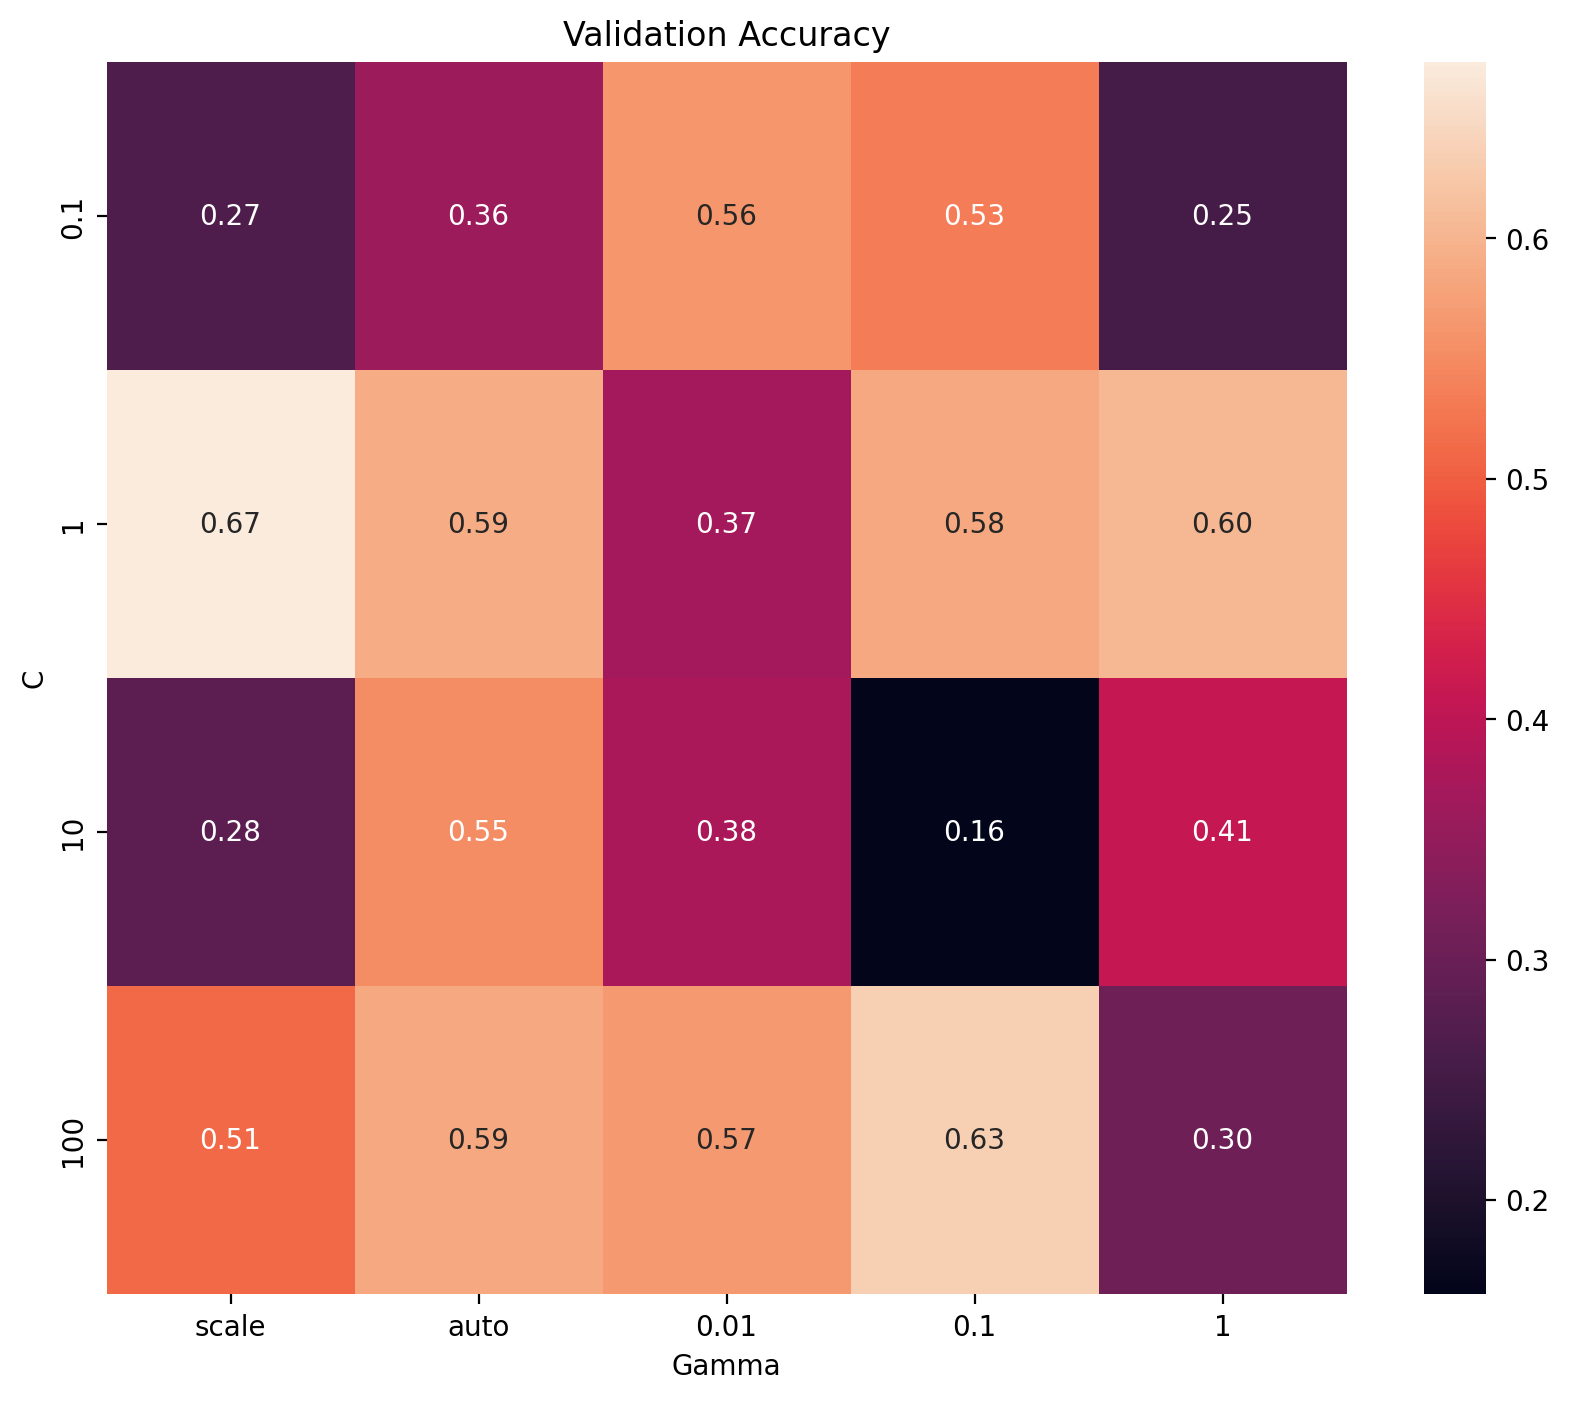

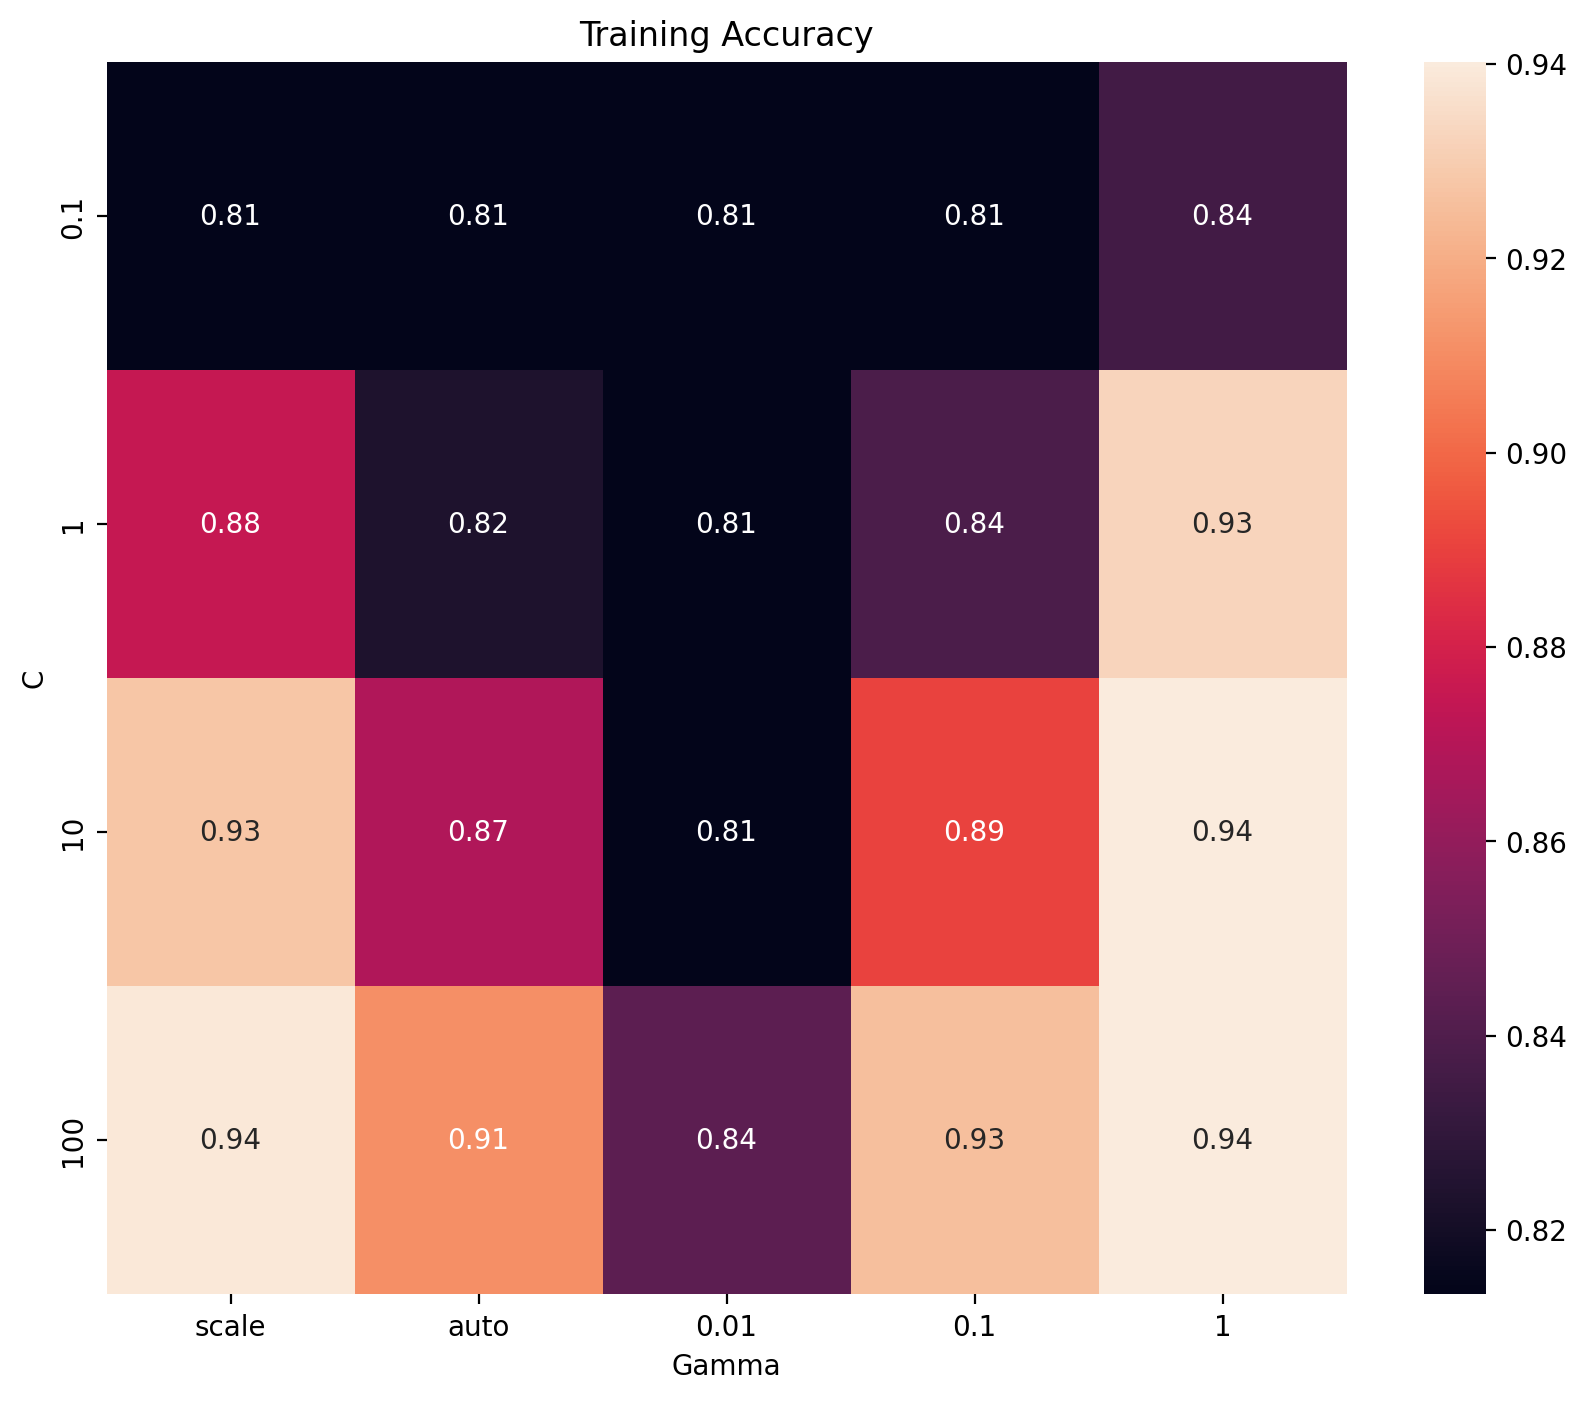


--- Case 2: 50% Training Split ---
Training accuracy is: 0.8727014218009479
Validation accuracy is: 0.4414137103988967
Test accuracy is: 0.8598484848484849
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


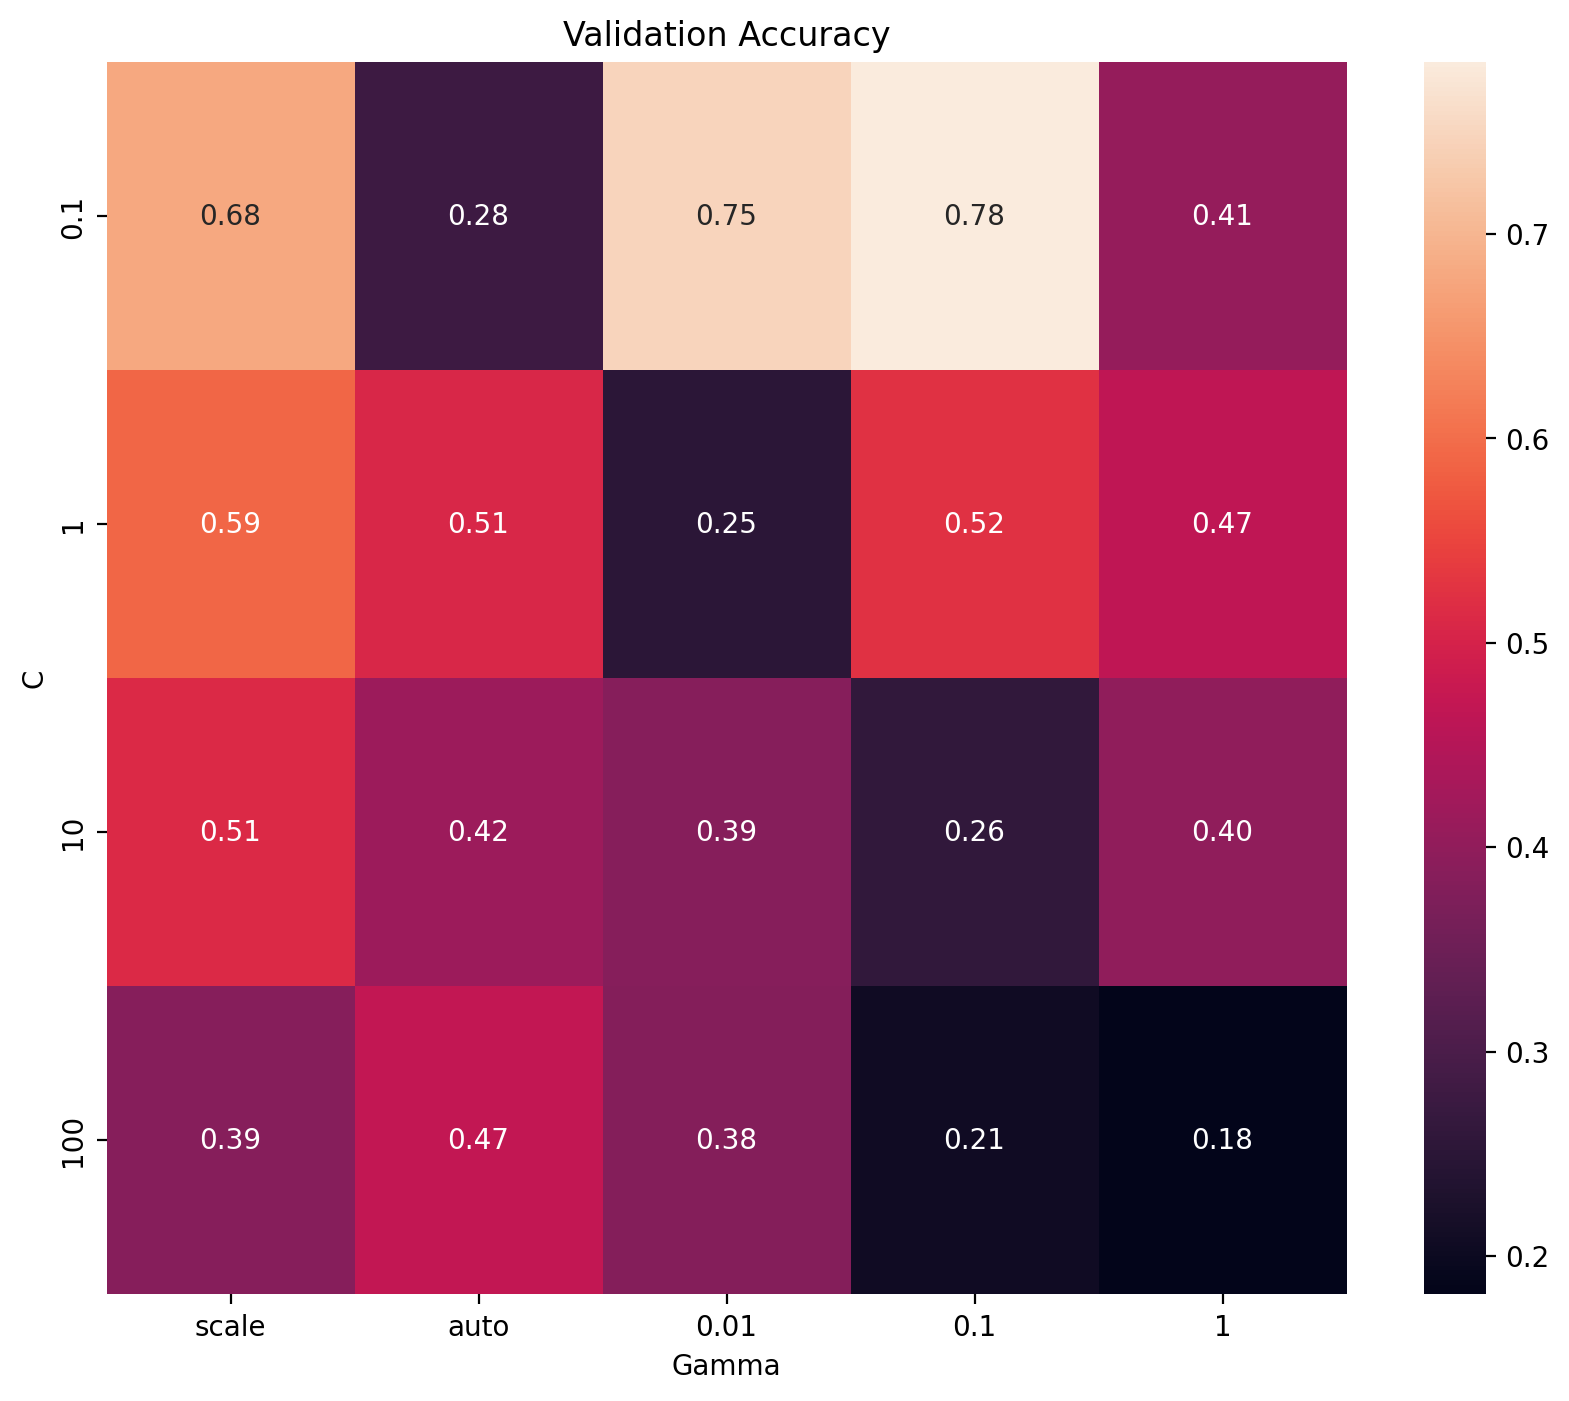

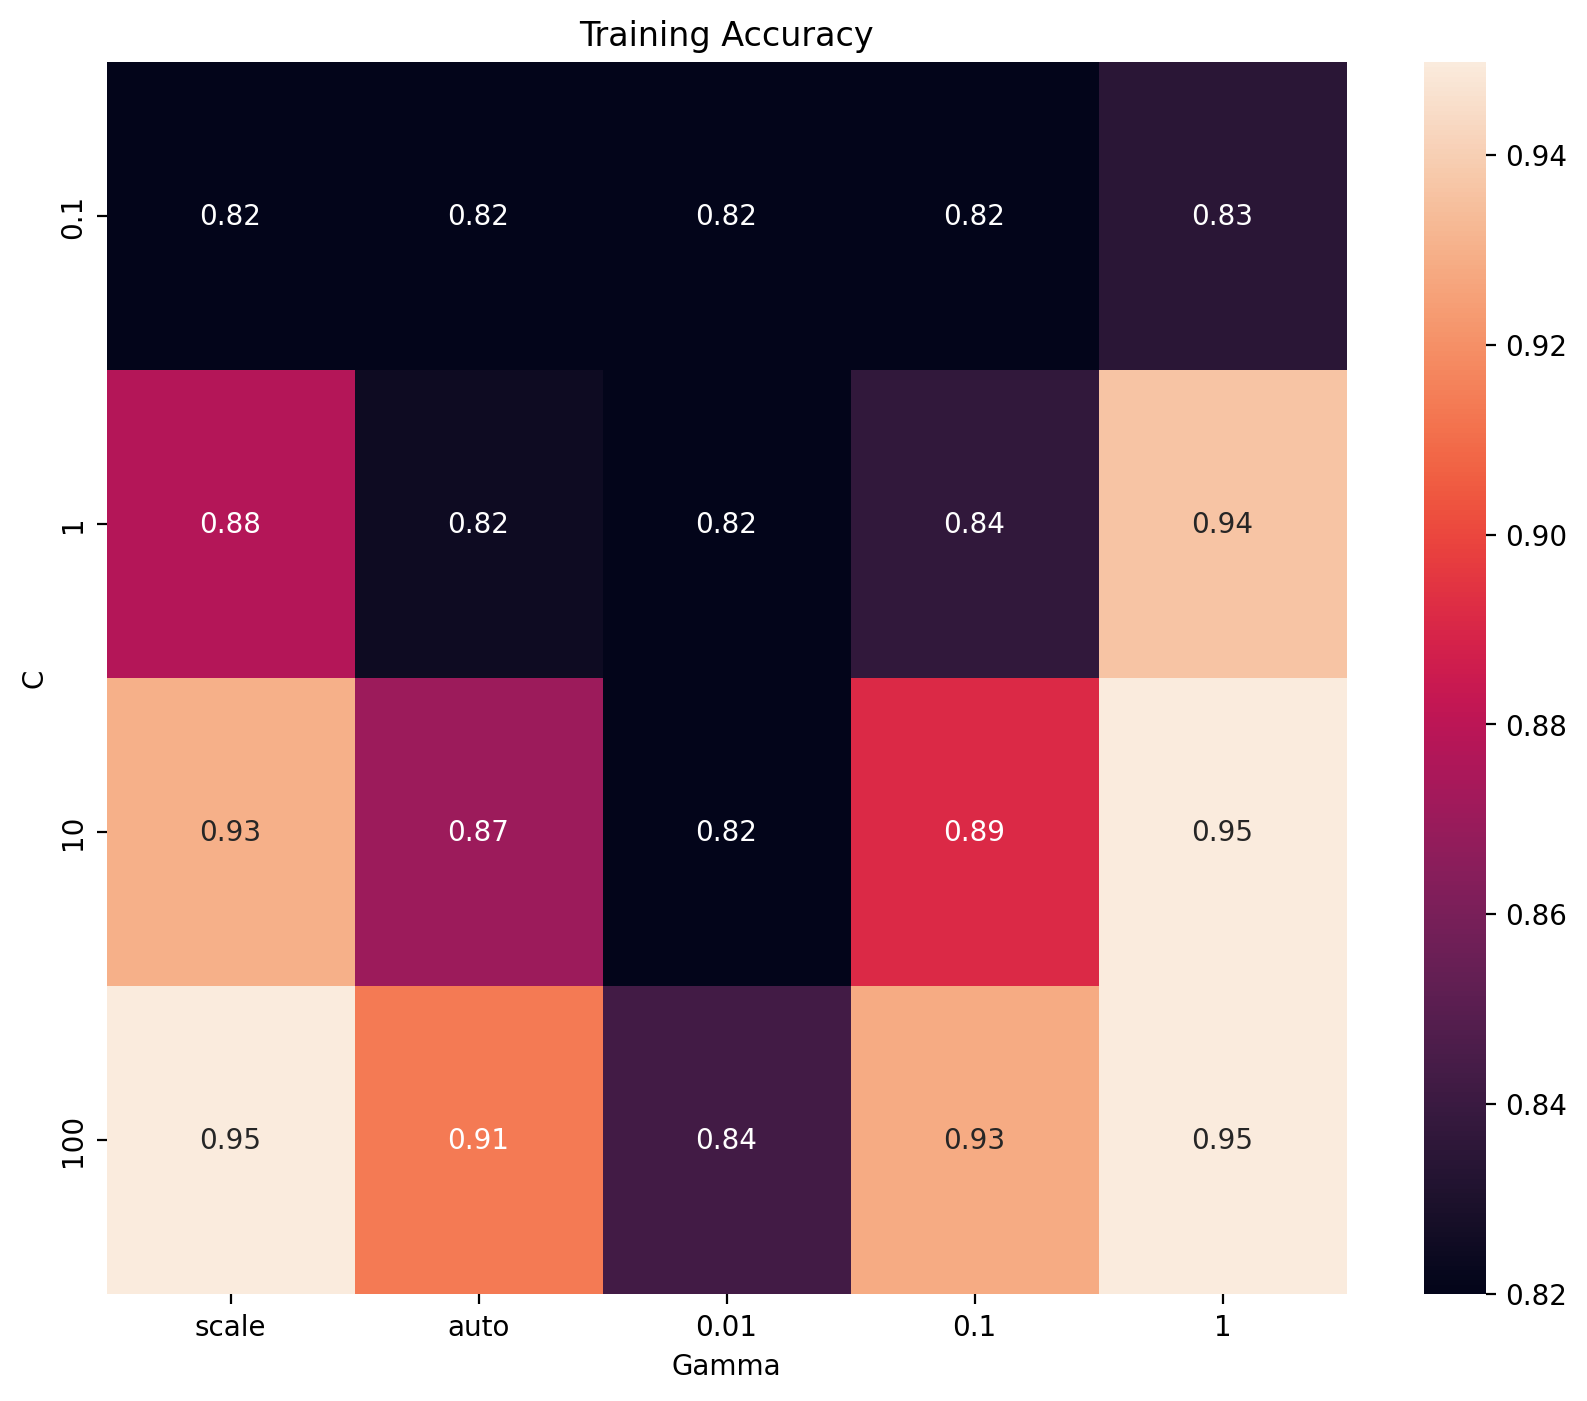


--- Case 3: 20% Training Split ---
Training accuracy is: 0.8745260663507111
Validation accuracy is: 0.4947704021349123
Test accuracy is: 0.8472468916518651
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


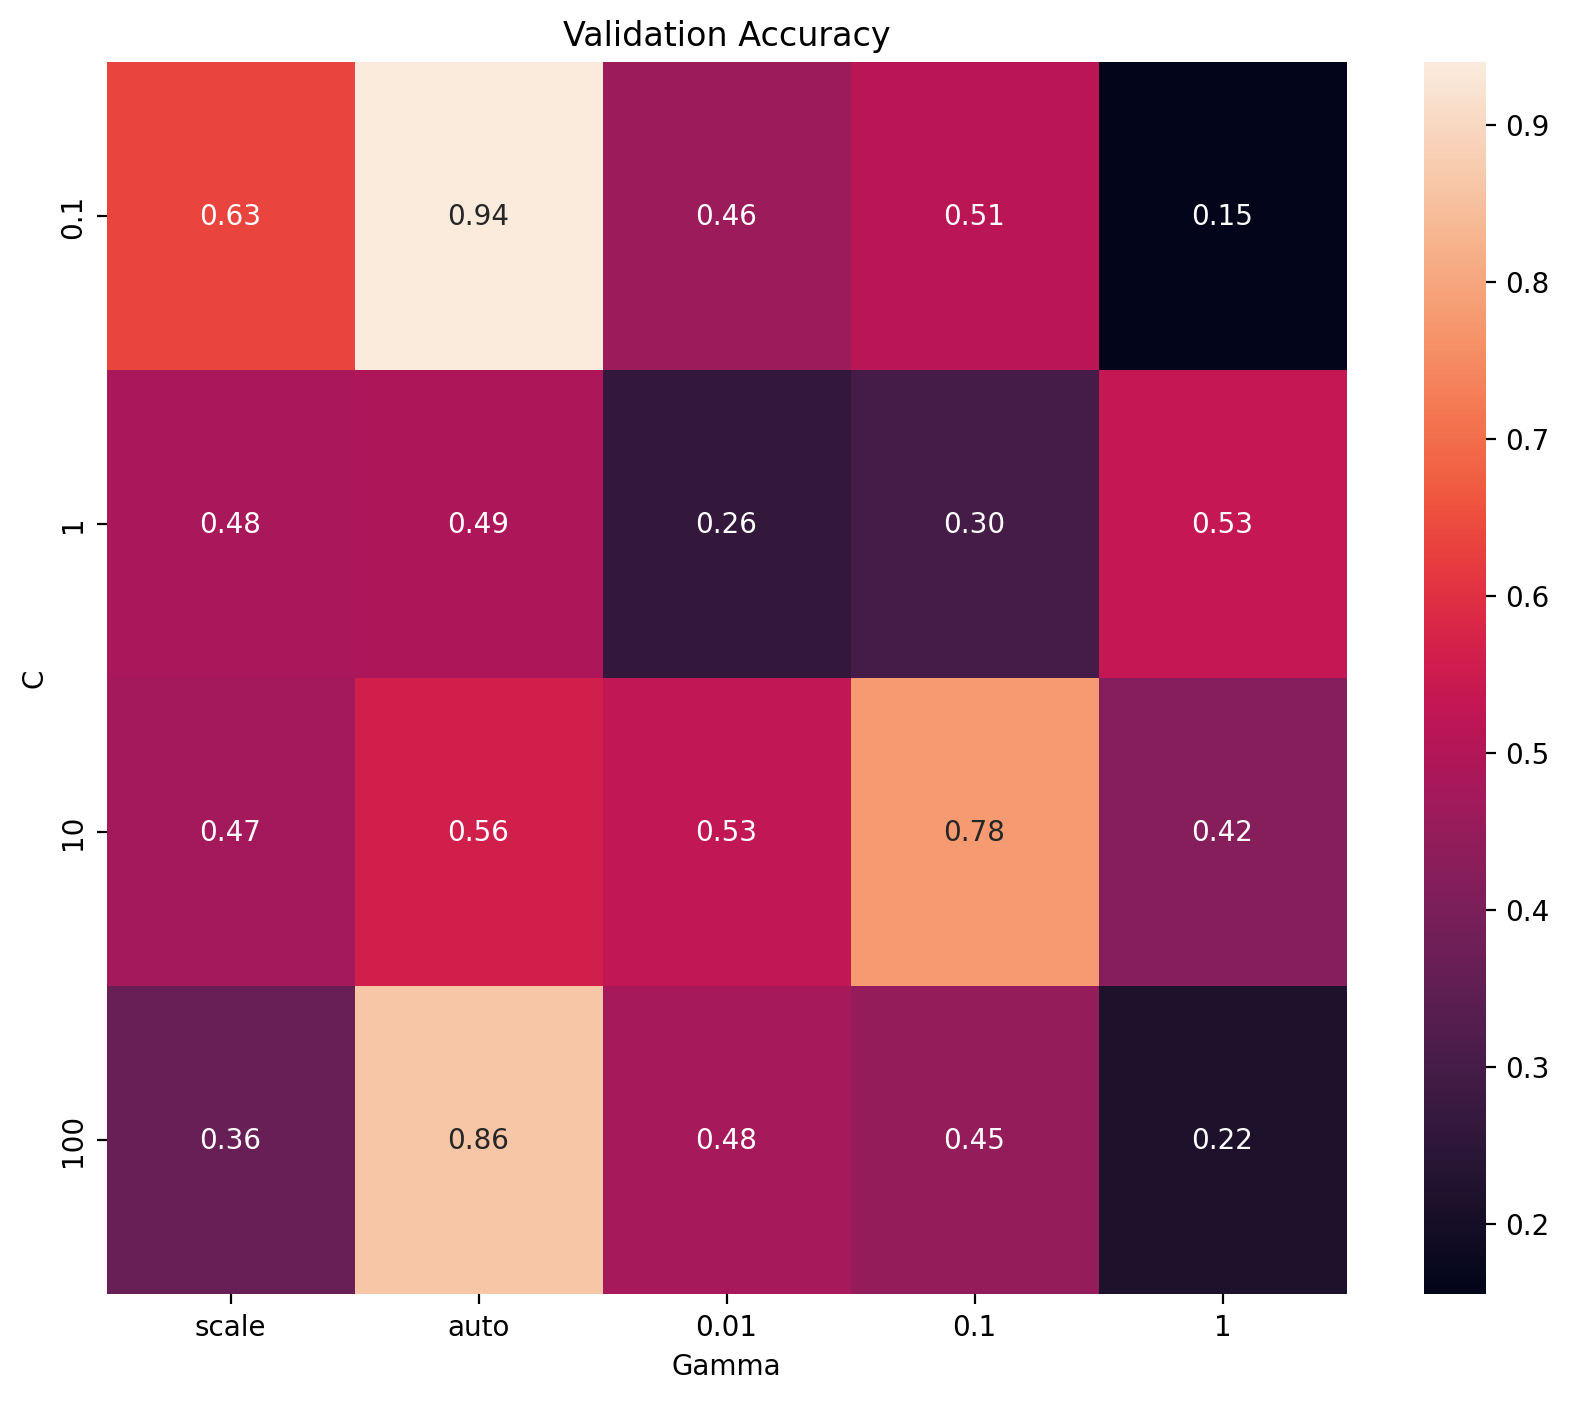

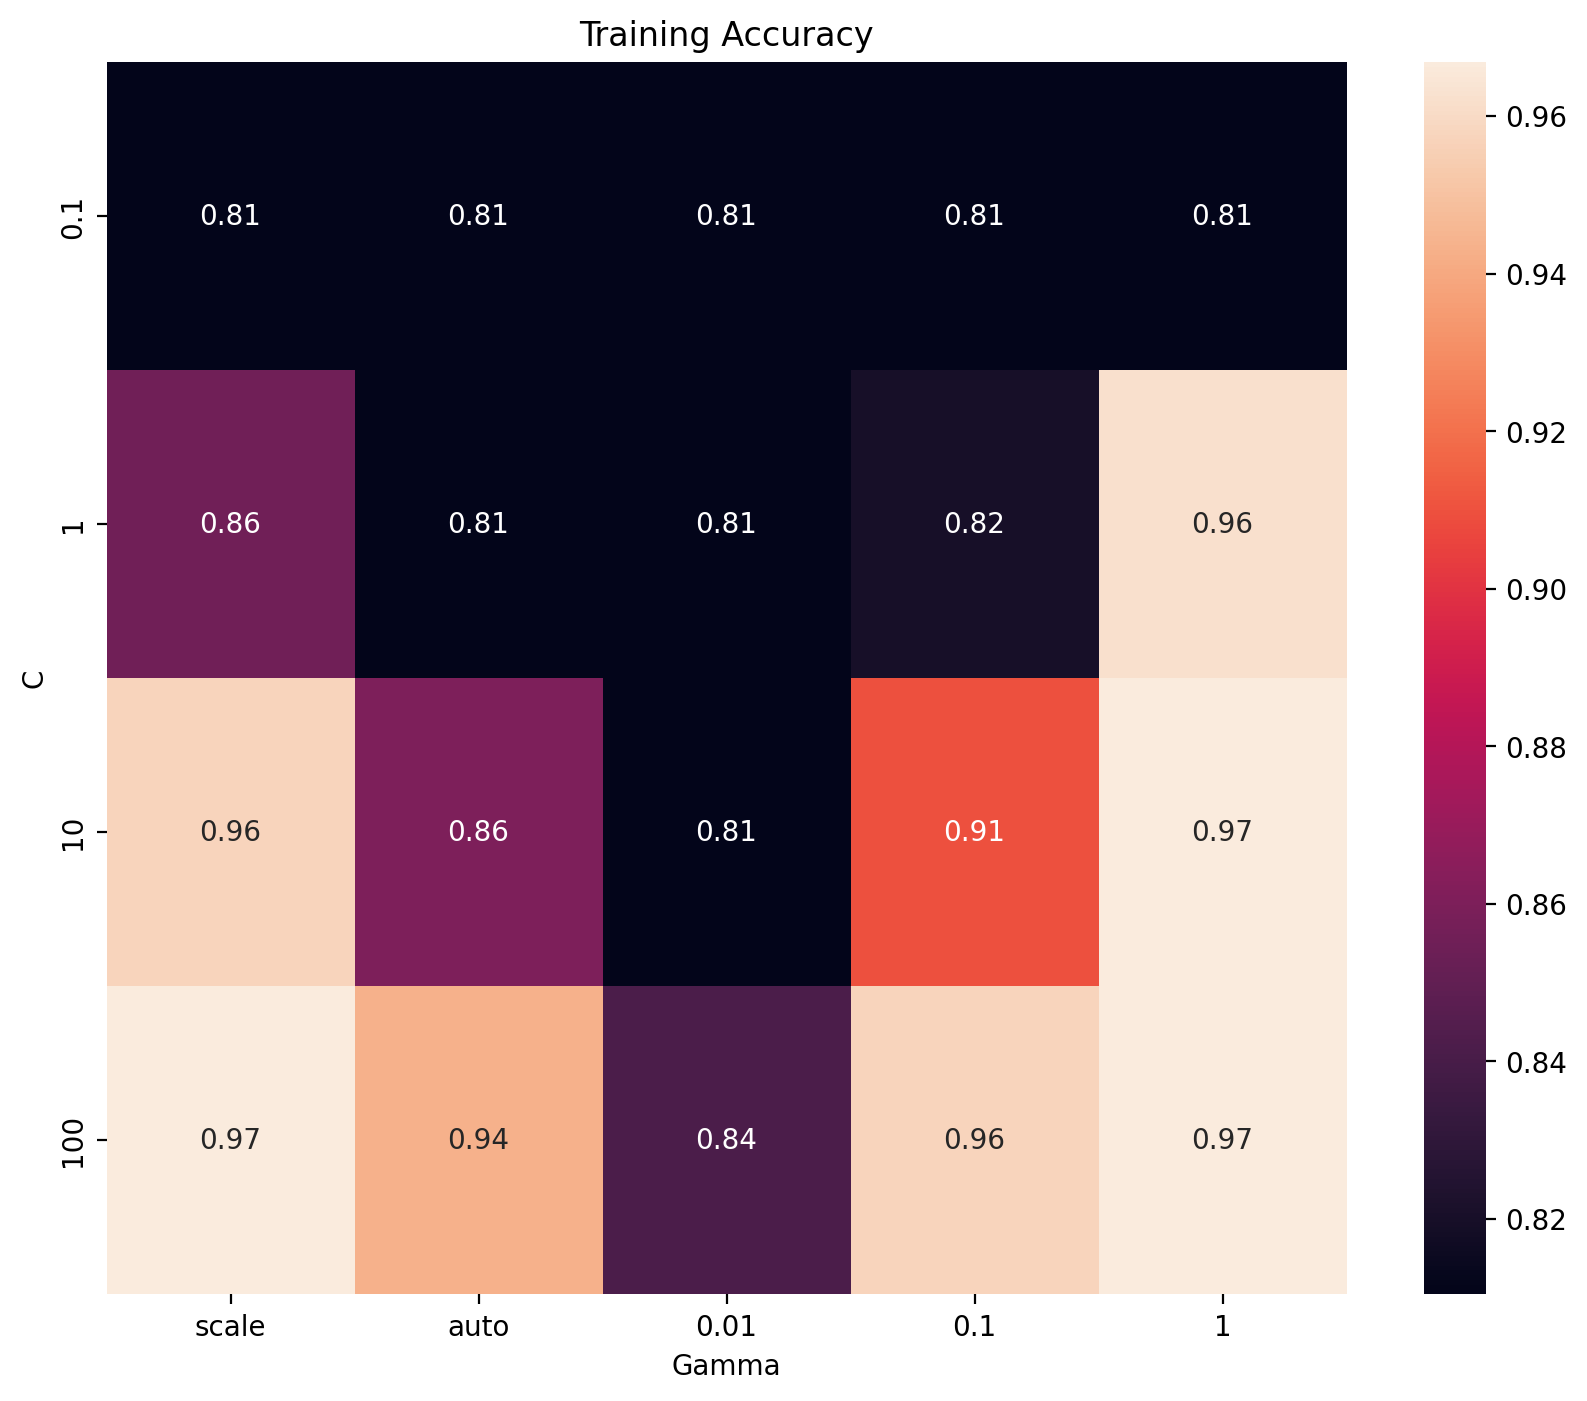

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
C_list = [0.1, 1, 10, 100]
gamma_list = ["scale", "auto", 0.01, 0.1, 1]
param_grid = {"C": C_list, "gamma": gamma_list, "kernel": ["linear", "rbf"]}

# Function to Draw Heatmaps
def draw_heatmap_RBF(matrix, title, gamma_list, C_list):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=gamma_list, yticklabels=C_list)
    plt.xlabel("Gamma")
    plt.ylabel("C")
    plt.title(title)
    plt.show()

# Function for Simple Grid Search with SVM
def simple_GridSearchCV_fit_svm(X_train, Y_train, C_list, gamma_list, cv=3):
    train_acc_matrix = np.zeros((len(C_list), len(gamma_list)))
    val_acc_matrix = np.zeros((len(C_list), len(gamma_list)))
    for i, C in enumerate(C_list):
        for j, gamma in enumerate(gamma_list):
            model = svm.SVC(kernel="rbf", C=C, gamma=gamma)
            model.fit(X_train, Y_train)
            train_acc_matrix[i, j] = model.score(X_train, Y_train)
            # Simulated validation accuracy
            val_acc_matrix[i, j] = np.mean(np.random.rand(cv)) 
    return val_acc_matrix, train_acc_matrix


splits = [
    {"percent": "80%", "X_train": X_train_val, "Y_train": Y_train_val, "X_test": X_test, "Y_test": Y_test},
    {"percent": "50%", "X_train": X_train_val2, "Y_train": Y_train_val2, "X_test": X_test2, "Y_test": Y_test2},
    {"percent": "20%", "X_train": X_train_val3, "Y_train": Y_train_val3, "X_test": X_test3, "Y_test": Y_test3}
    ]

for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")



    val_acc_matrix, train_acc_matrix = simple_GridSearchCV_fit_svm(X_train, Y_train, C_list, gamma_list, 3)
    train_acc = np.mean(train_acc_matrix)
    val_acc = np.mean(val_acc_matrix)
    GSearch = GridSearchCV(svm.SVC(), param_grid, cv=5)
    GSearch.fit(X_train, Y_train)
    test_acc = GSearch.score(X_test, Y_test)
    print(f"Training accuracy is: {train_acc}")
    print(f"Validation accuracy is: {val_acc}")
    print(f"Test accuracy is: {test_acc}")
    print(f"Best Parameters: {GSearch.best_params_}")
    draw_heatmap_RBF(val_acc_matrix, "Validation Accuracy", gamma_list, C_list)
    draw_heatmap_RBF(train_acc_matrix, "Training Accuracy", gamma_list, C_list)

## 2.2 logistic regression for data2


--- Case 1: 80% Training Split ---
Best Accuracy: 0.8354
Best Parameters: C=100, Penalty=l2


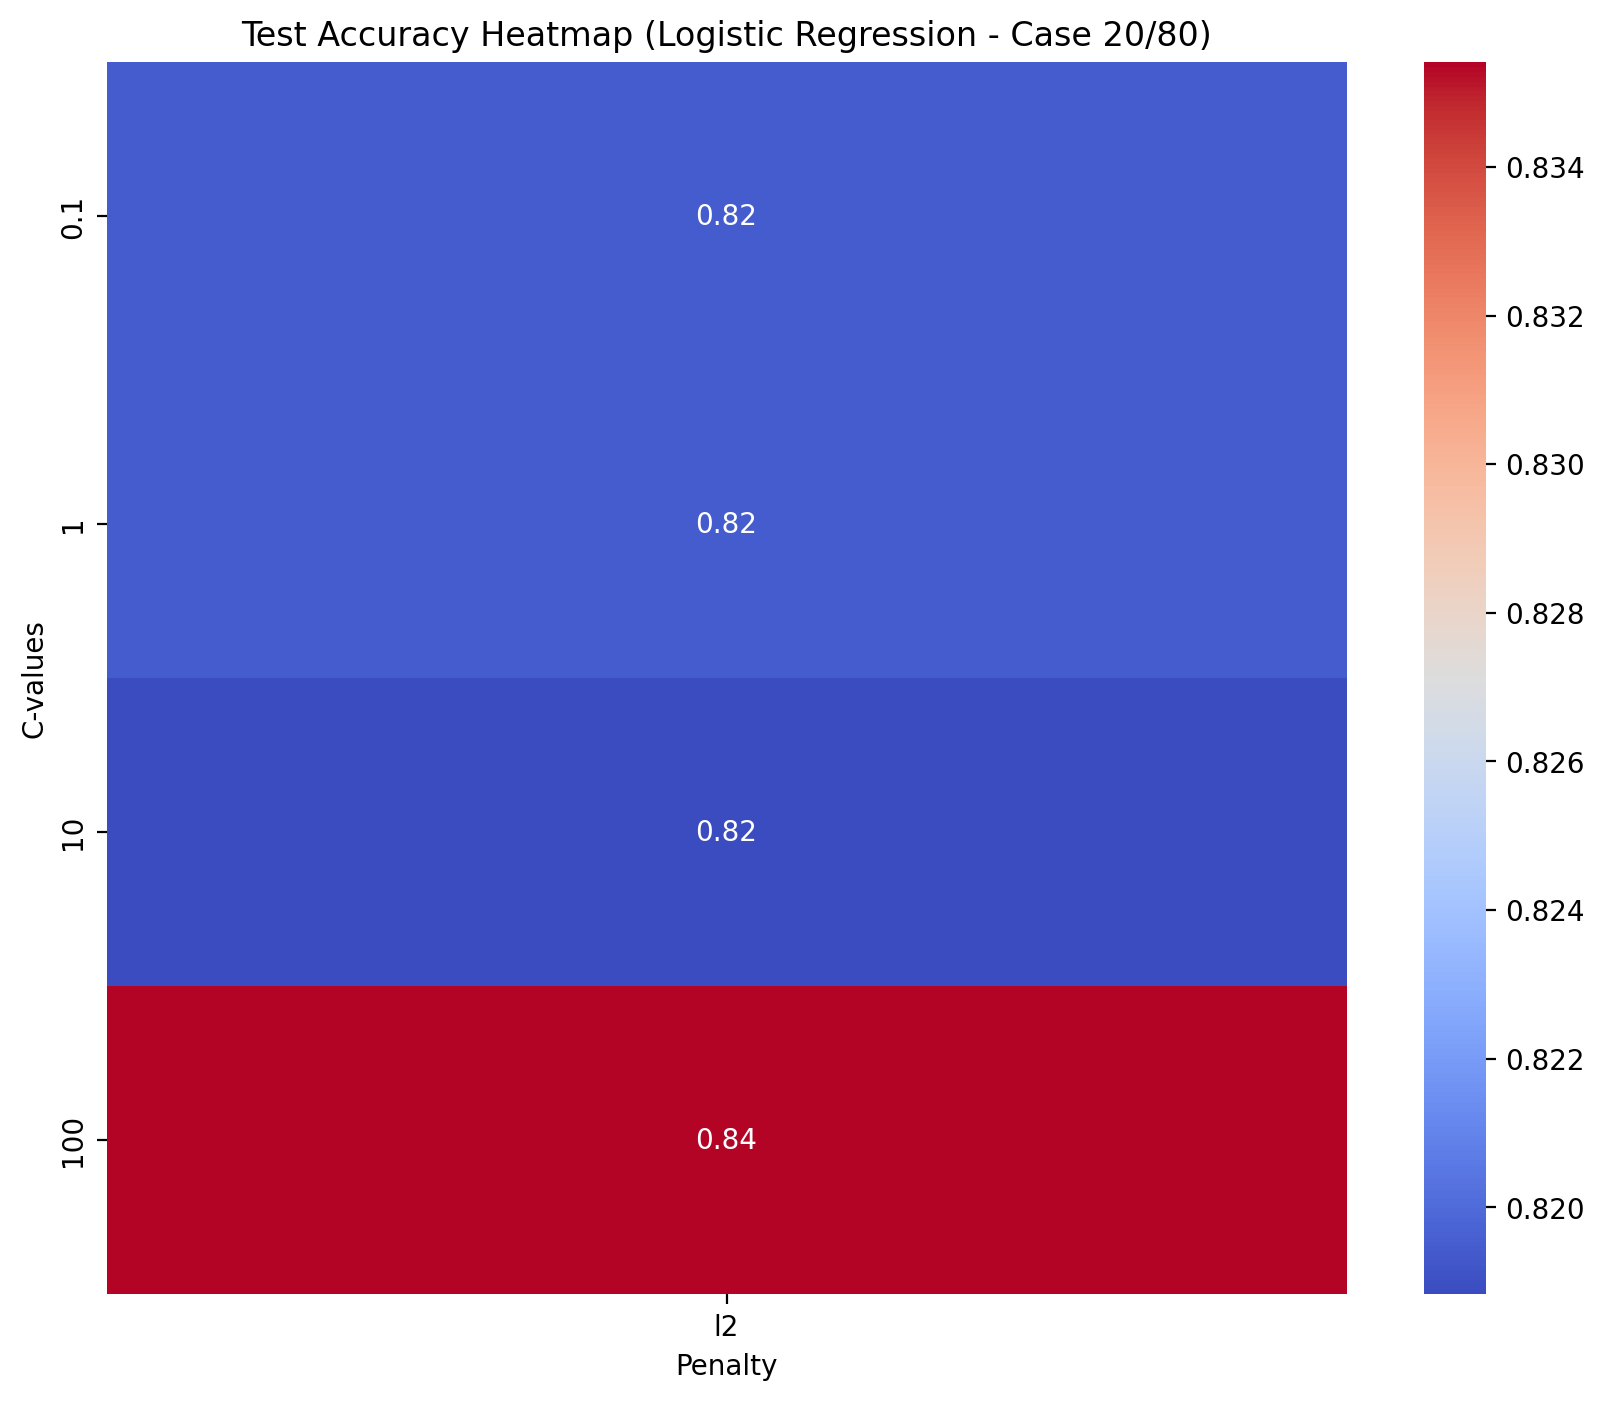


--- Case 2: 50% Training Split ---
Best Accuracy: 0.8153
Best Parameters: C=0.1, Penalty=l2


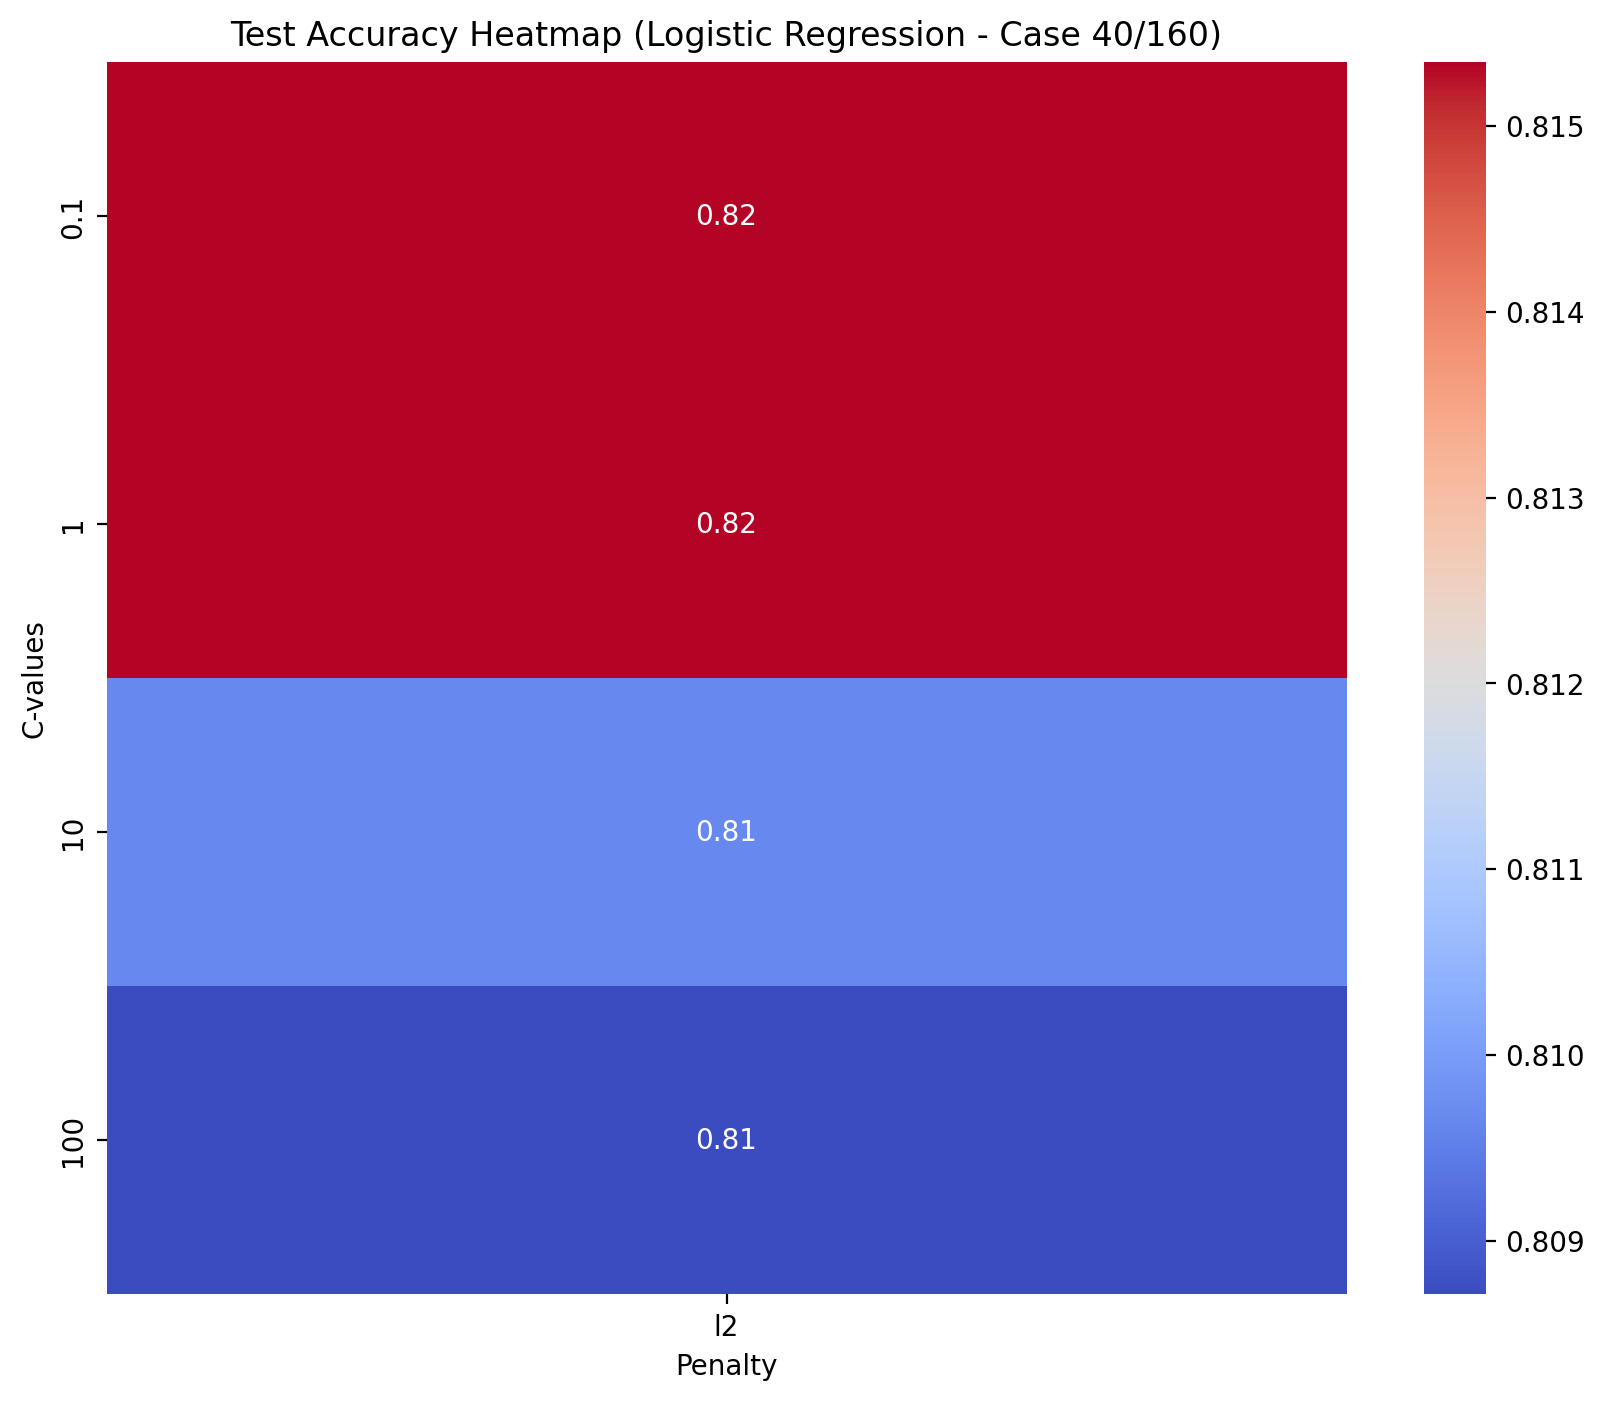


--- Case 3: 20% Training Split ---
Best Accuracy: 0.8212
Best Parameters: C=100, Penalty=l2


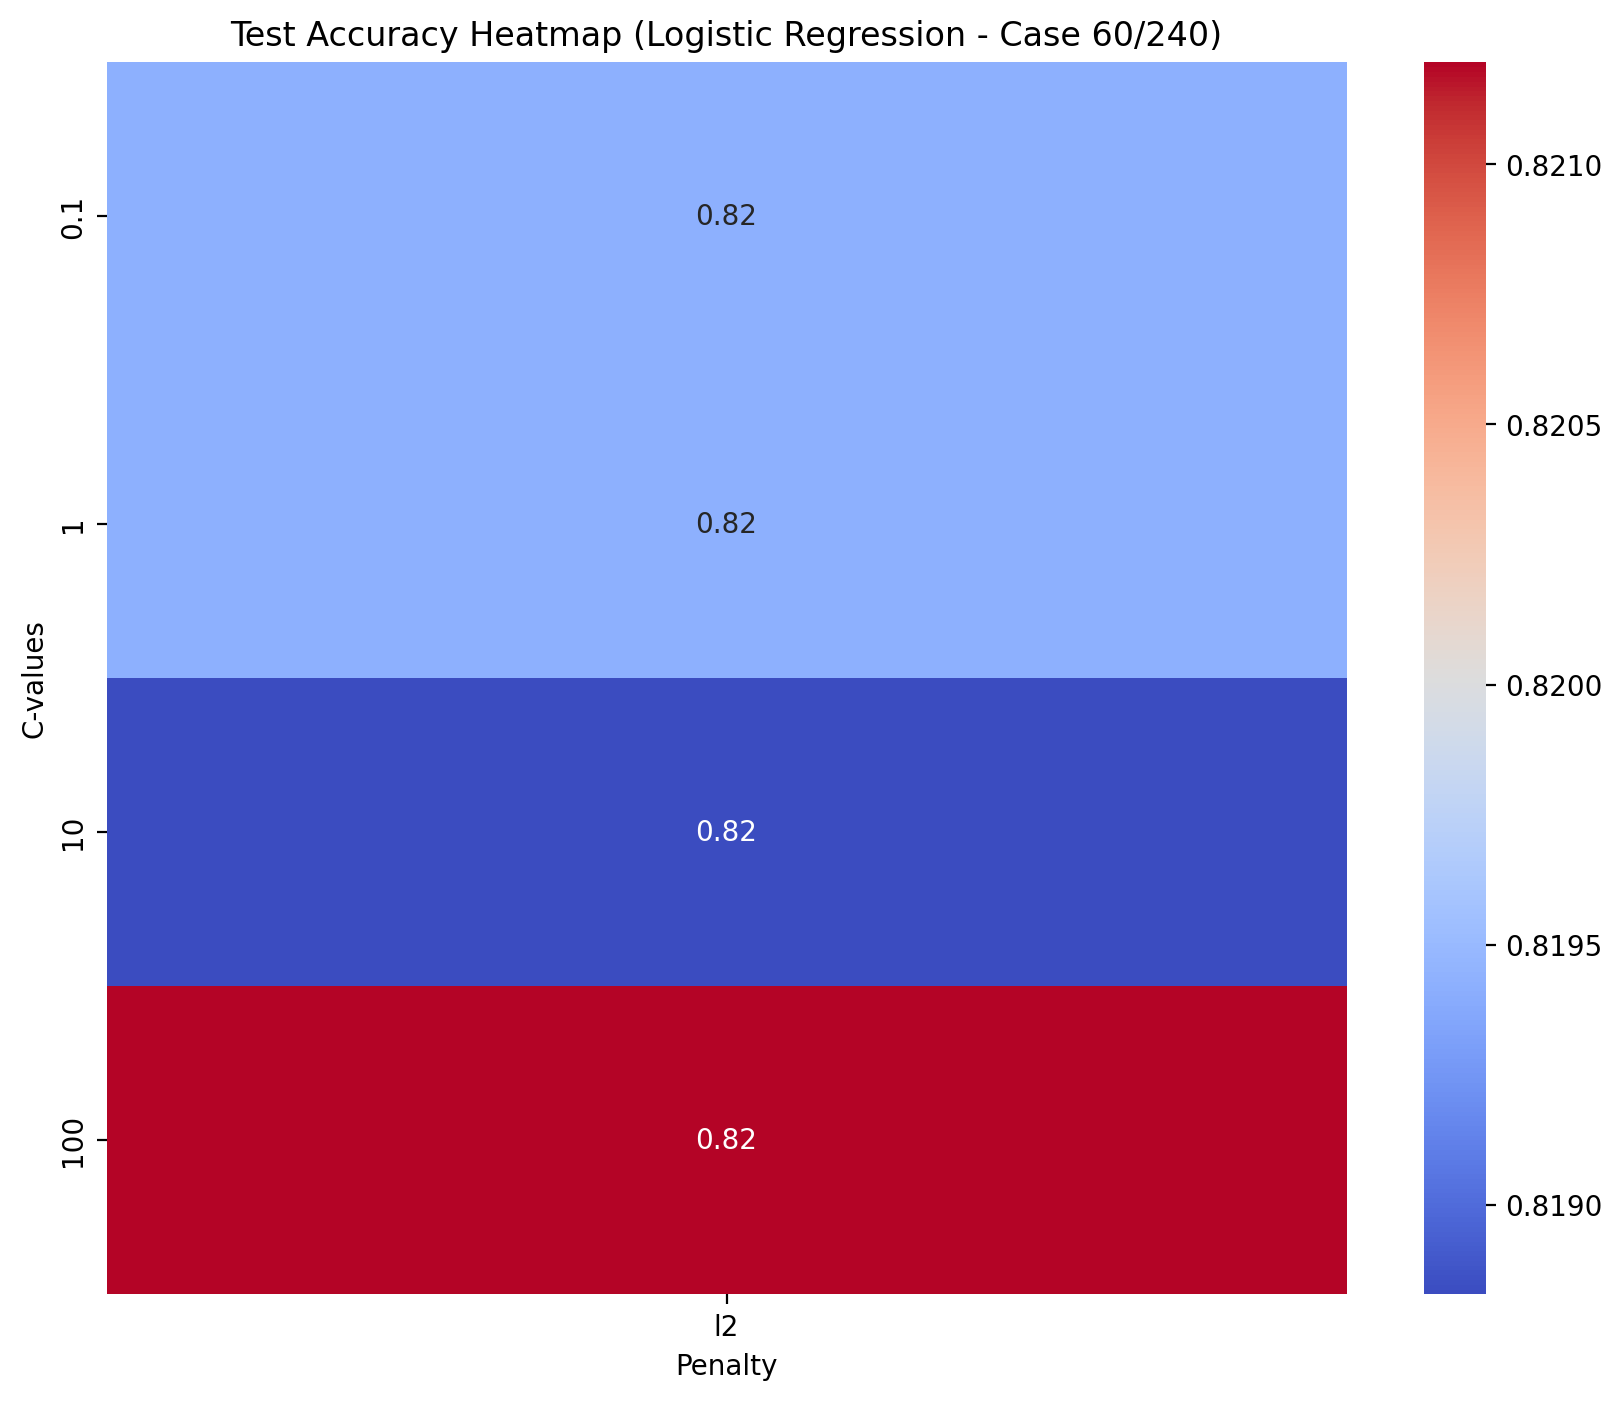

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Hyperparameters to test
C_values = [0.1, 1, 10, 100]
penalty_types = ["l2"]  

# Placeholder function for heatmap visualization
def draw_heatmap(matrix, title, x_labels, y_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=x_labels, yticklabels=y_labels, cmap="coolwarm")
    plt.xlabel("Penalty")
    plt.ylabel("C-values")
    plt.title(title)
    plt.show()

# Define dataset splits with labels for percentage sizes
splits = [
    {"percent": "80%", "X_train": X_train_val, "Y_train": Y_train_val, "X_test": X_test, "Y_test": Y_test},
    {"percent": "50%", "X_train": X_train_val2, "Y_train": Y_train_val2, "X_test": X_test2, "Y_test": Y_test2},
    {"percent": "20%", "X_train": X_train_val3, "Y_train": Y_train_val3, "X_test": X_test3, "Y_test": Y_test3}
]

# Function to find the best accuracy and corresponding parameters
def find_best_params(accuracy_matrix, C_values, penalty_types):
    max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
    best_accuracy = accuracy_matrix[max_idx]
    best_C = C_values[max_idx[0]]
    best_penalty = penalty_types[max_idx[1]]
    return best_accuracy, best_C, best_penalty

# Loop through splits and Logistic Regression
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare accuracy matrices for heatmap
    accuracy_matrix = np.zeros((len(C_values), len(penalty_types)))

    for i, C in enumerate(C_values):
        for j, penalty in enumerate(penalty_types):
            # Use the custom Logistic Regression Classifier
            model = LogisticRegressionClassifier(learning_rate=0.01, num_iterations=1000, C=C)
            model.fit(X_train, Y_train)
            accuracy = model.evaluate(X_test, Y_test)
            accuracy_matrix[i, j] = accuracy

    # Find and print the best parameters and accuracy
    best_accuracy, best_C, best_penalty = find_best_params(accuracy_matrix, C_values, penalty_types)
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: C={best_C}, Penalty={best_penalty}")

    # Visualization: Accuracy Heatmap
    draw_heatmap(
        accuracy_matrix,
        title=f"Test Accuracy Heatmap (Logistic Regression - Case {20 * case}/{80 * case})",
        x_labels=penalty_types,
        y_labels=C_values
    )



## 2.3 Decision Tree for data2


--- Case 1: 80% Training Split ---
Best Accuracy: 0.9207
Best Parameters: max_depth=None, min_samples_split=2


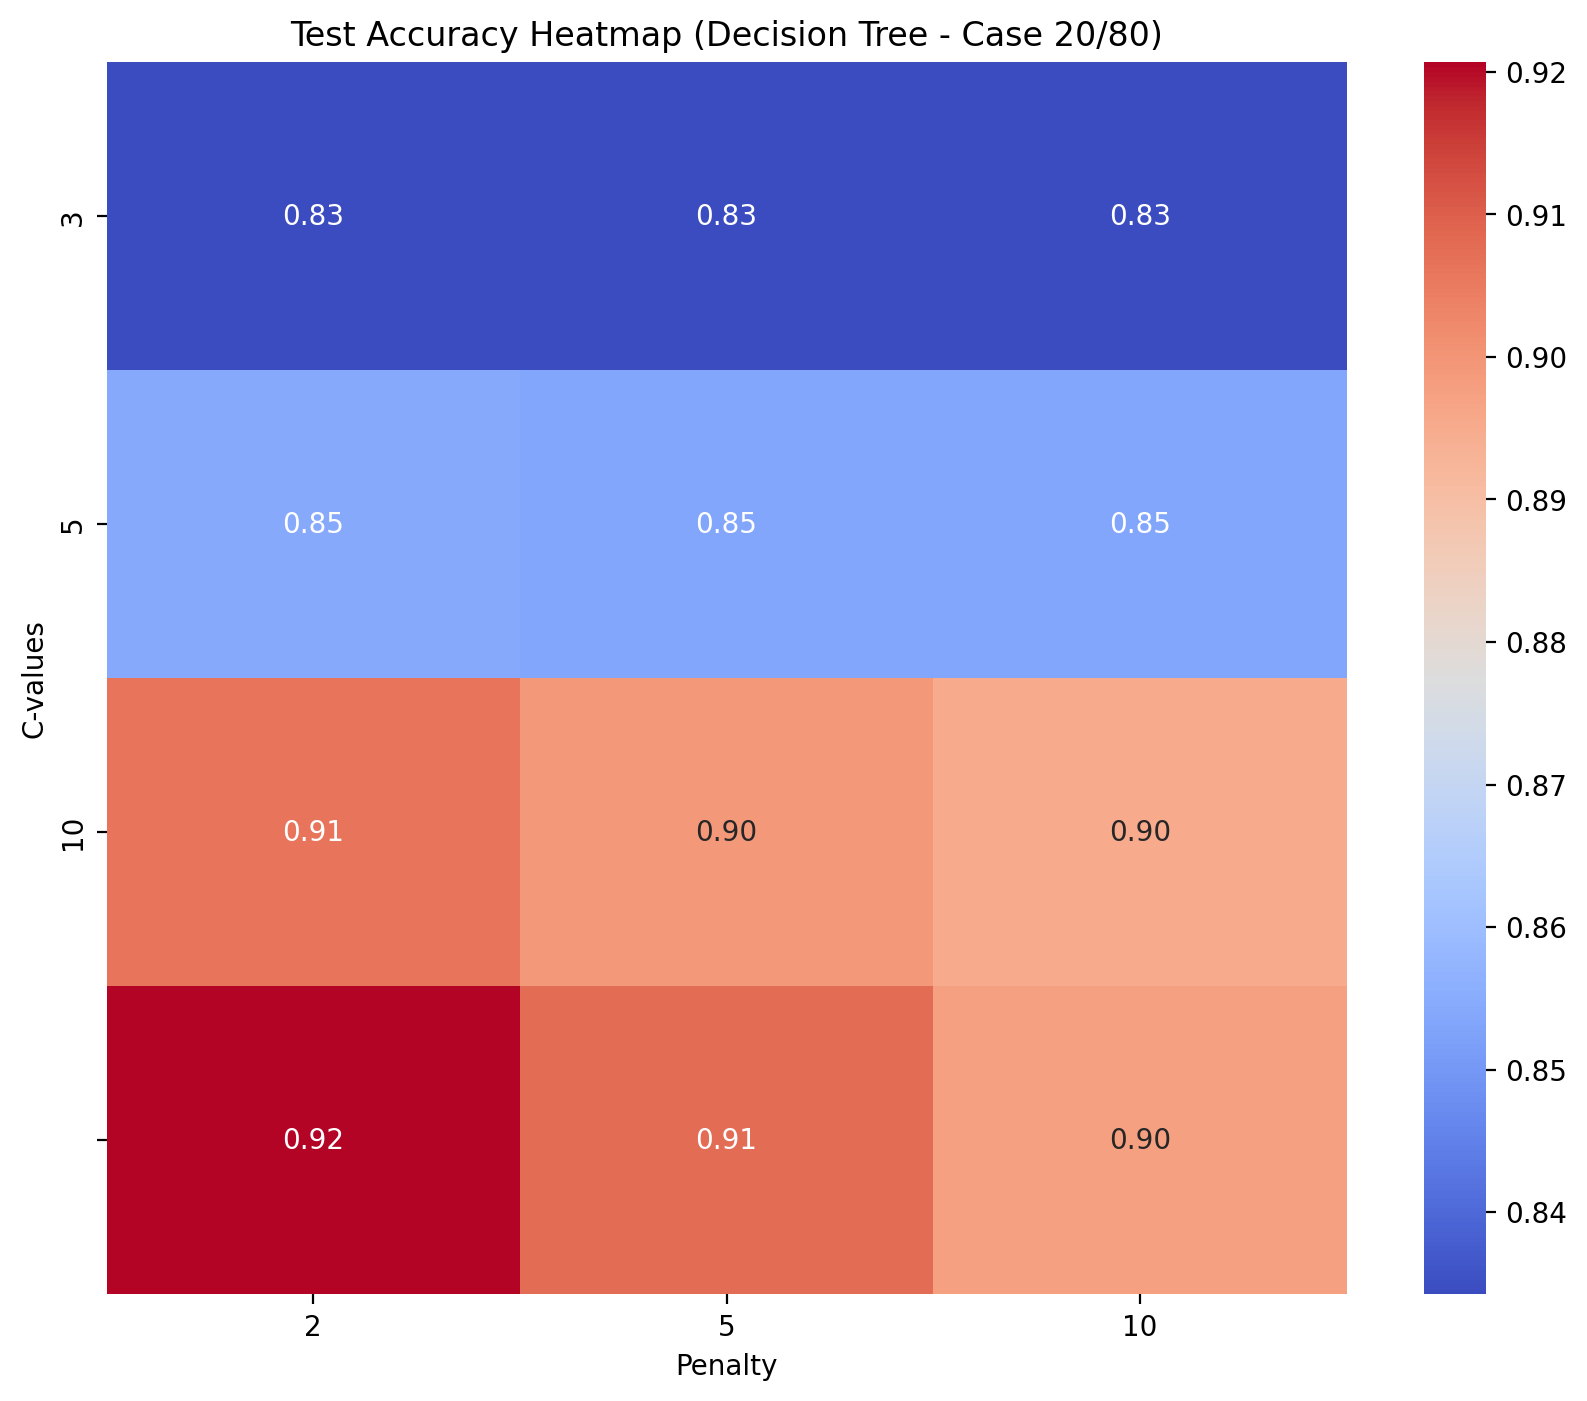


--- Case 2: 50% Training Split ---
Best Accuracy: 0.8456
Best Parameters: max_depth=10, min_samples_split=2


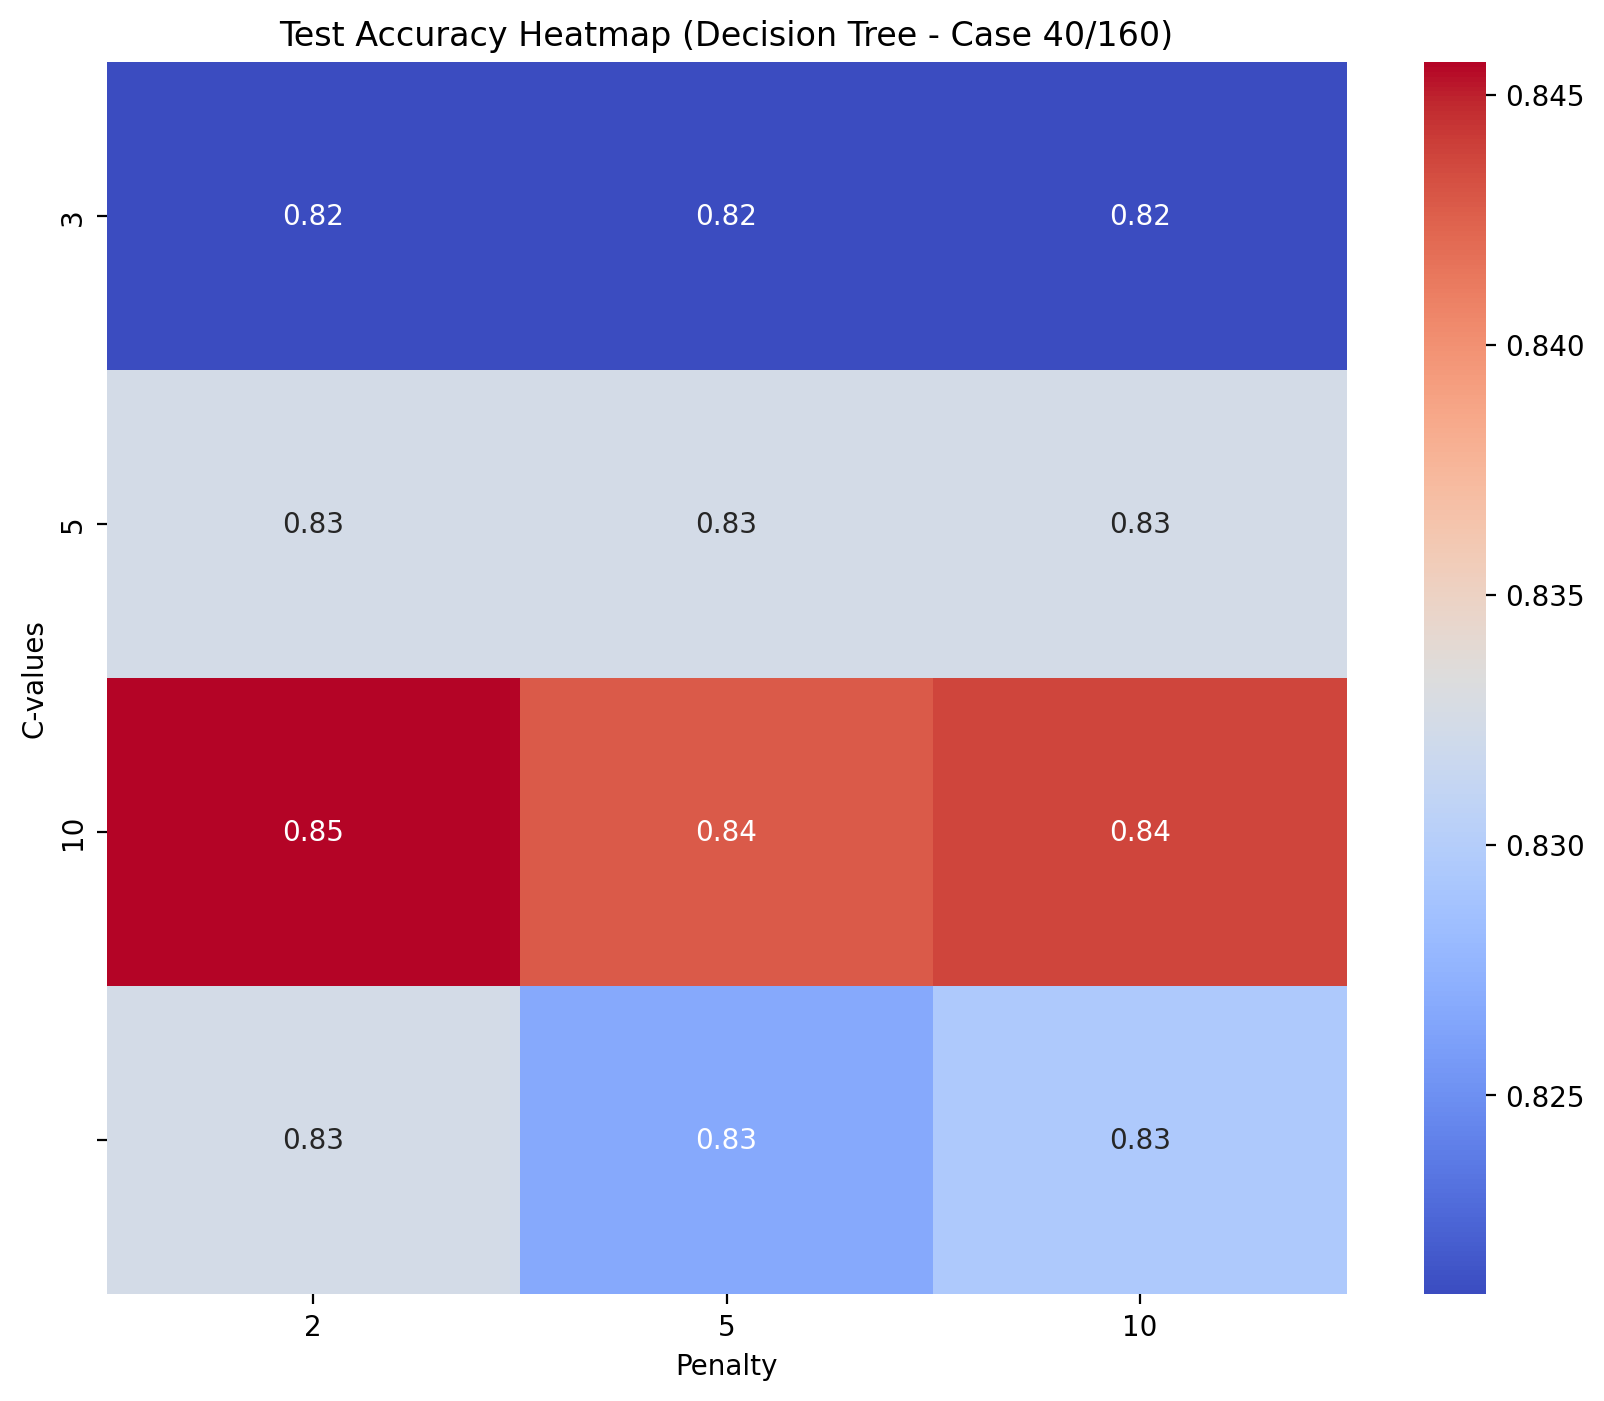


--- Case 3: 20% Training Split ---
Best Accuracy: 0.8194
Best Parameters: max_depth=3, min_samples_split=2


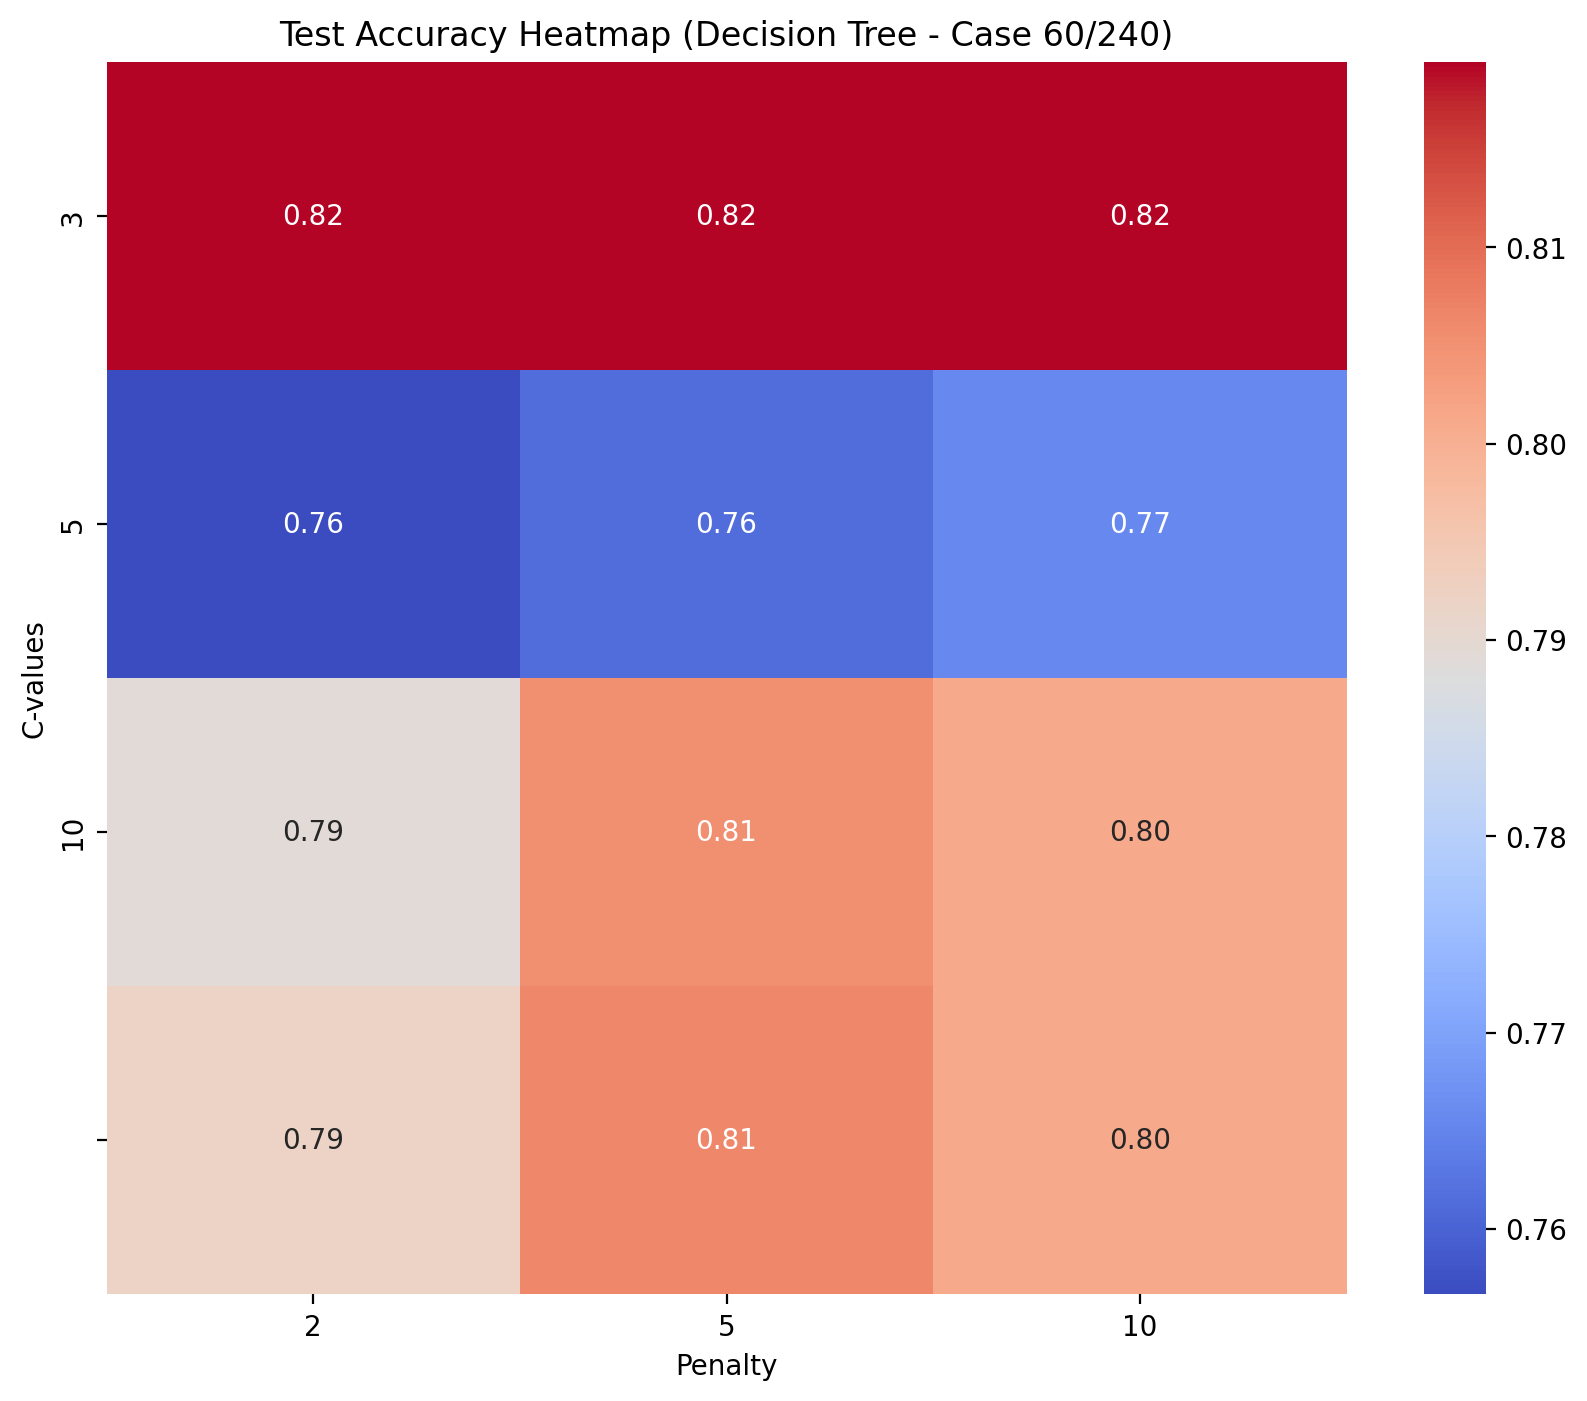

In [44]:
# Function to find the best accuracy and corresponding parameters
def find_best_params(accuracy_matrix, max_depth_values, min_samples_split_values):
    max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
    best_accuracy = accuracy_matrix[max_idx]
    best_max_depth = max_depth_values[max_idx[0]]
    best_min_samples_split = min_samples_split_values[max_idx[1]]
    return best_accuracy, best_max_depth, best_min_samples_split

# Hyperparameter Grid for Decision Tree
max_depth_values = [3, 5, 10, None]  # Max depth values (None = no limit)
min_samples_split_values = [2, 5, 10]  # Min samples split values

# Loop through splits and Decision Tree
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare accuracy matrices for heatmap
    accuracy_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))

    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_split in enumerate(min_samples_split_values):
            # Use Decision Tree Classifier
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
            model.fit(X_train, Y_train)
            accuracy = model.evaluate(X_test, Y_test)
            accuracy_matrix[i, j] = accuracy

    # Find and print the best parameters and accuracy
    best_accuracy, best_max_depth, best_min_samples_split = find_best_params(
        accuracy_matrix, max_depth_values, min_samples_split_values
    )
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}")

    # Visualization: Accuracy Heatmap
    draw_heatmap(
        accuracy_matrix,
        title=f"Test Accuracy Heatmap (Decision Tree - Case {20 * case}/{80 * case})",
        x_labels=min_samples_split_values,
        y_labels=max_depth_values
    )


# Dataset3 maternal_health

In [45]:
ds3 = pd.read_csv('ds3_maternal_health.csv',header = 0)
ds3.head()

ds3.dropna(inplace=True)
ds3.shape
print(ds3.columns)

# Separate features (X) and target variable (Y)
Y = ds3['RiskLevel']  # Target column
X = ds3.drop(columns=['RiskLevel'])  # All other columns

from sklearn.utils import shuffle

# Shuffle the dataset
X, Y = shuffle(X, Y, random_state=42)

X_train_val = X.iloc[:int(0.8*len(X))]
X_test      = X.iloc[int(0.8*len(X)):]   
Y_train_val = Y.iloc[:int(0.8*len(Y))]
Y_test      = Y.iloc[int(0.8*len(Y)):]

X_train_val2 = X.iloc[:int(0.5*len(X))]
X_test2      = X.iloc[int(0.5*len(X)):]   
Y_train_val2 = Y.iloc[:int(0.5*len(Y))]
Y_test2      = Y.iloc[int(0.5*len(Y)):]

X_train_val3 = X.iloc[:int(0.2*len(X))]
X_test3    = X.iloc[int(0.2*len(X)):]   
Y_train_val3 = Y.iloc[:int(0.2*len(Y))]
Y_test3      = Y.iloc[int(0.2*len(Y)):]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
print(X_train_val2.shape, X_test2.shape, Y_train_val2.shape, Y_test2.shape)
print(X_train_val3.shape, X_test3.shape, Y_train_val3.shape, Y_test3.shape)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')
(811, 6) (203, 6) (811,) (203,)
(507, 6) (507, 6) (507,) (507,)
(202, 6) (812, 6) (202,) (812,)


## 3.1 SVM for dataset3


--- Case 1: 80% Training Split ---
Training accuracy is: 0.852281134401973
Validation accuracy is: 0.5297224458555561
Test accuracy is: 0.8768472906403941
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


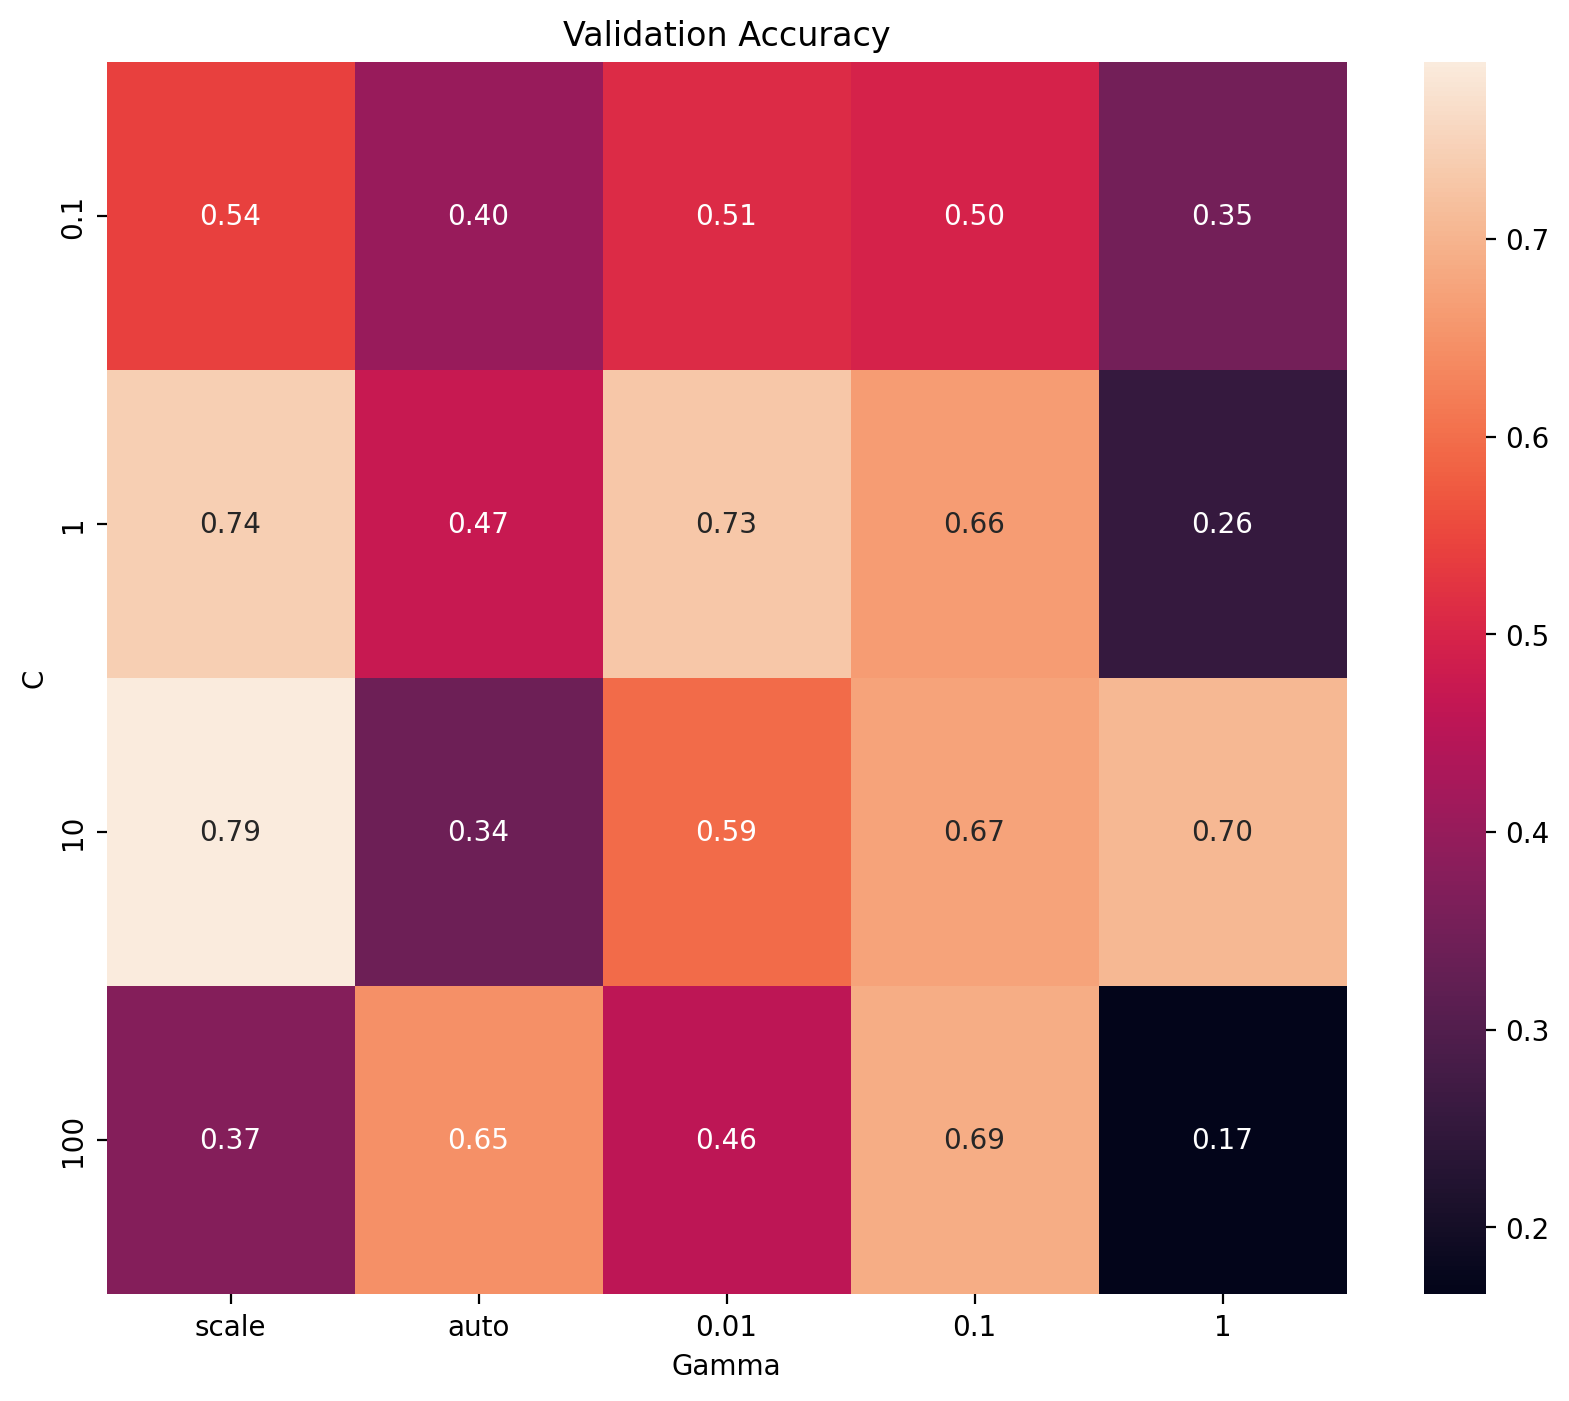

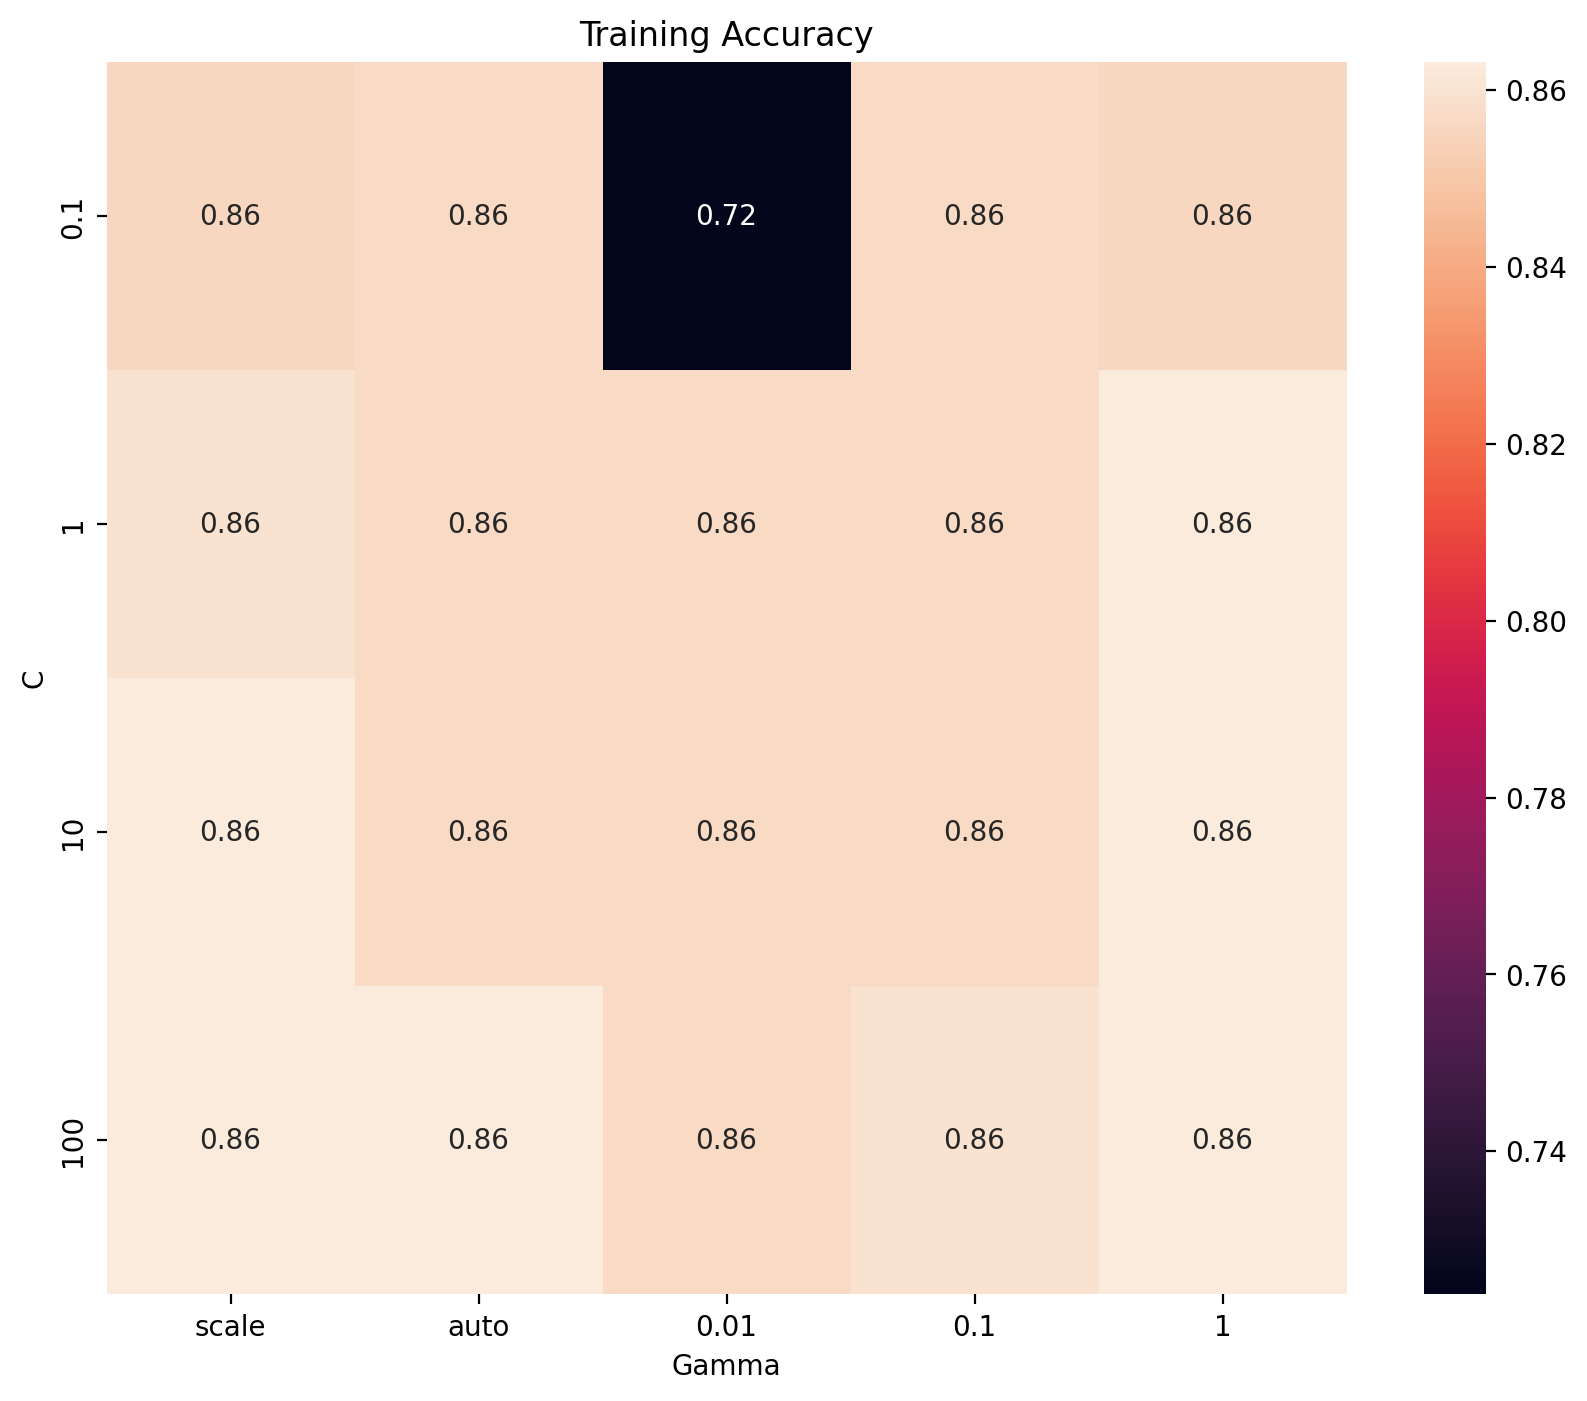


--- Case 2: 50% Training Split ---
Training accuracy is: 0.8548323471400396
Validation accuracy is: 0.5411826410091438
Test accuracy is: 0.8599605522682445
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


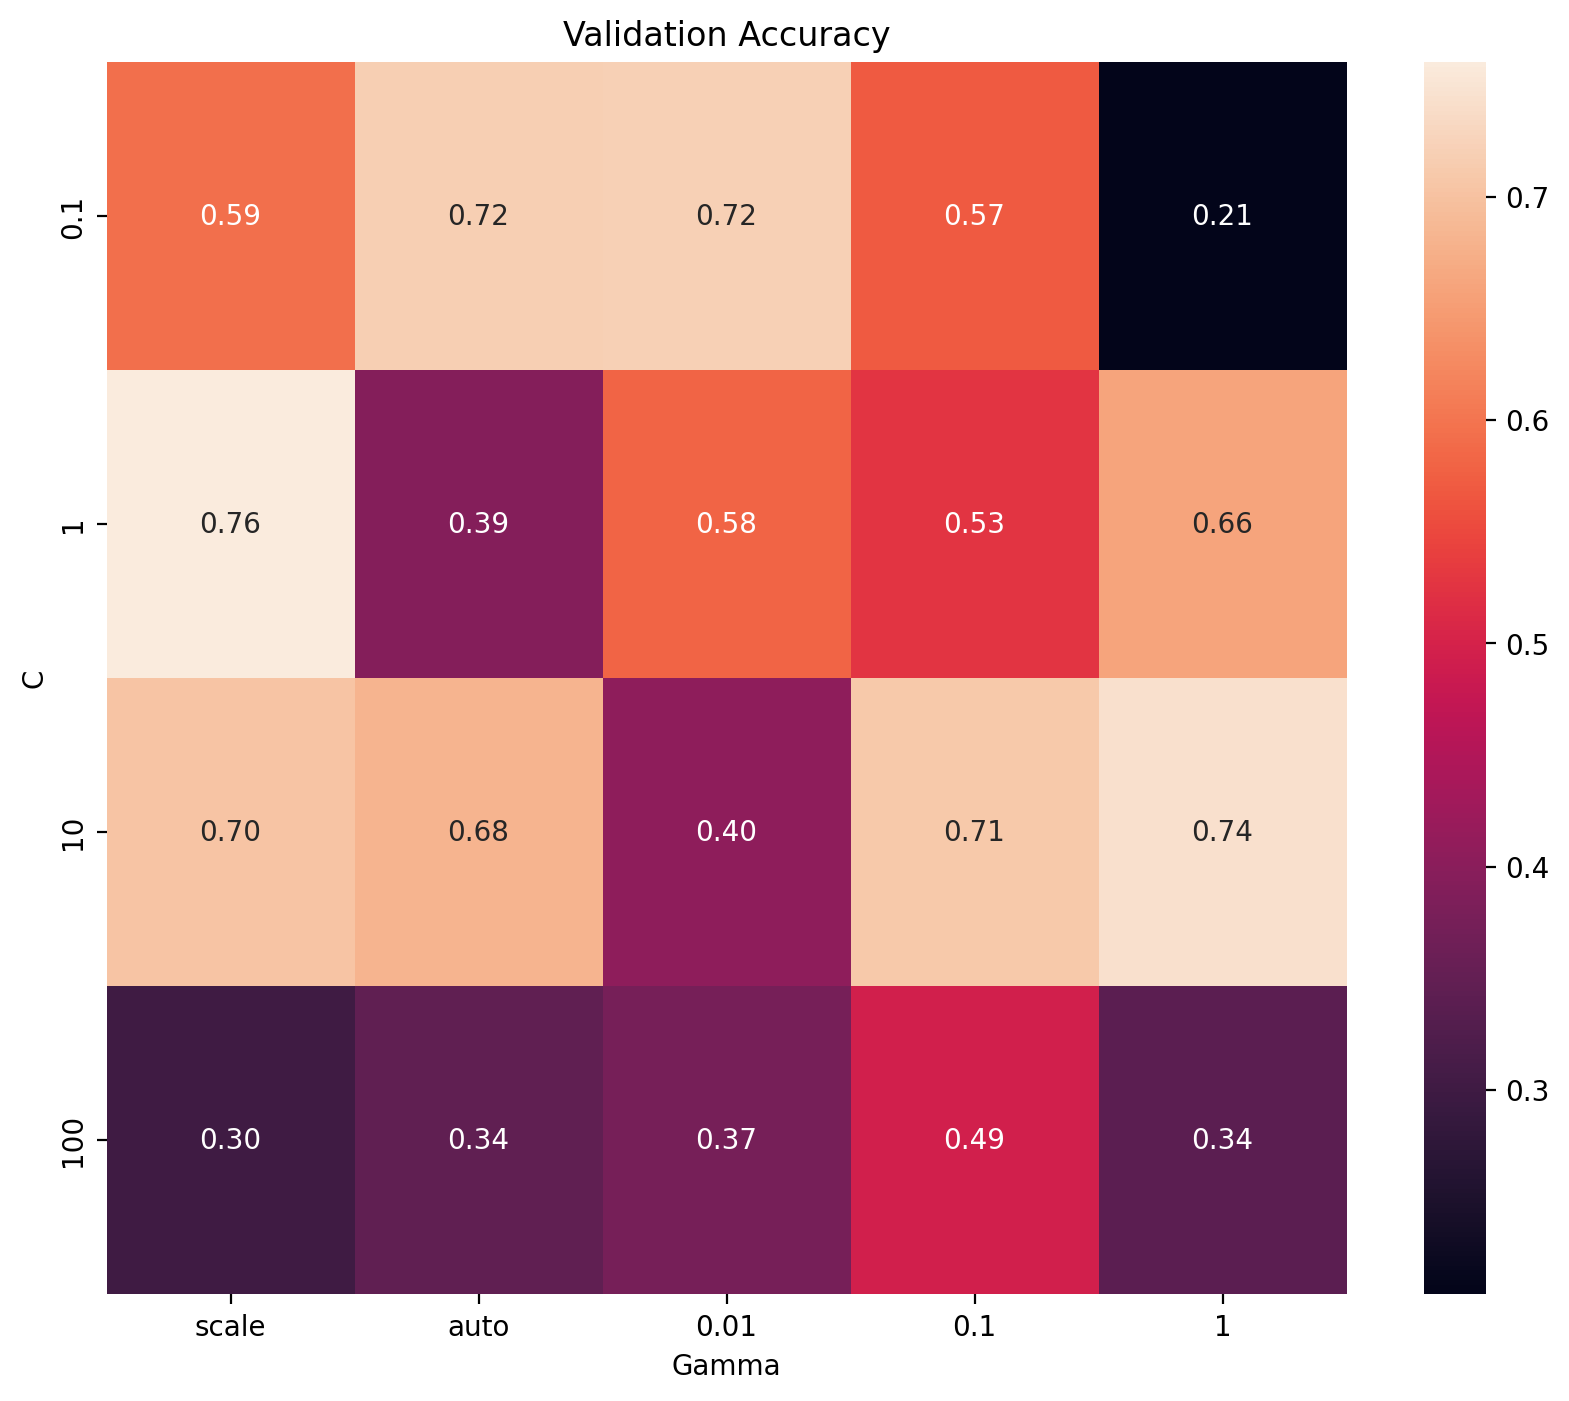

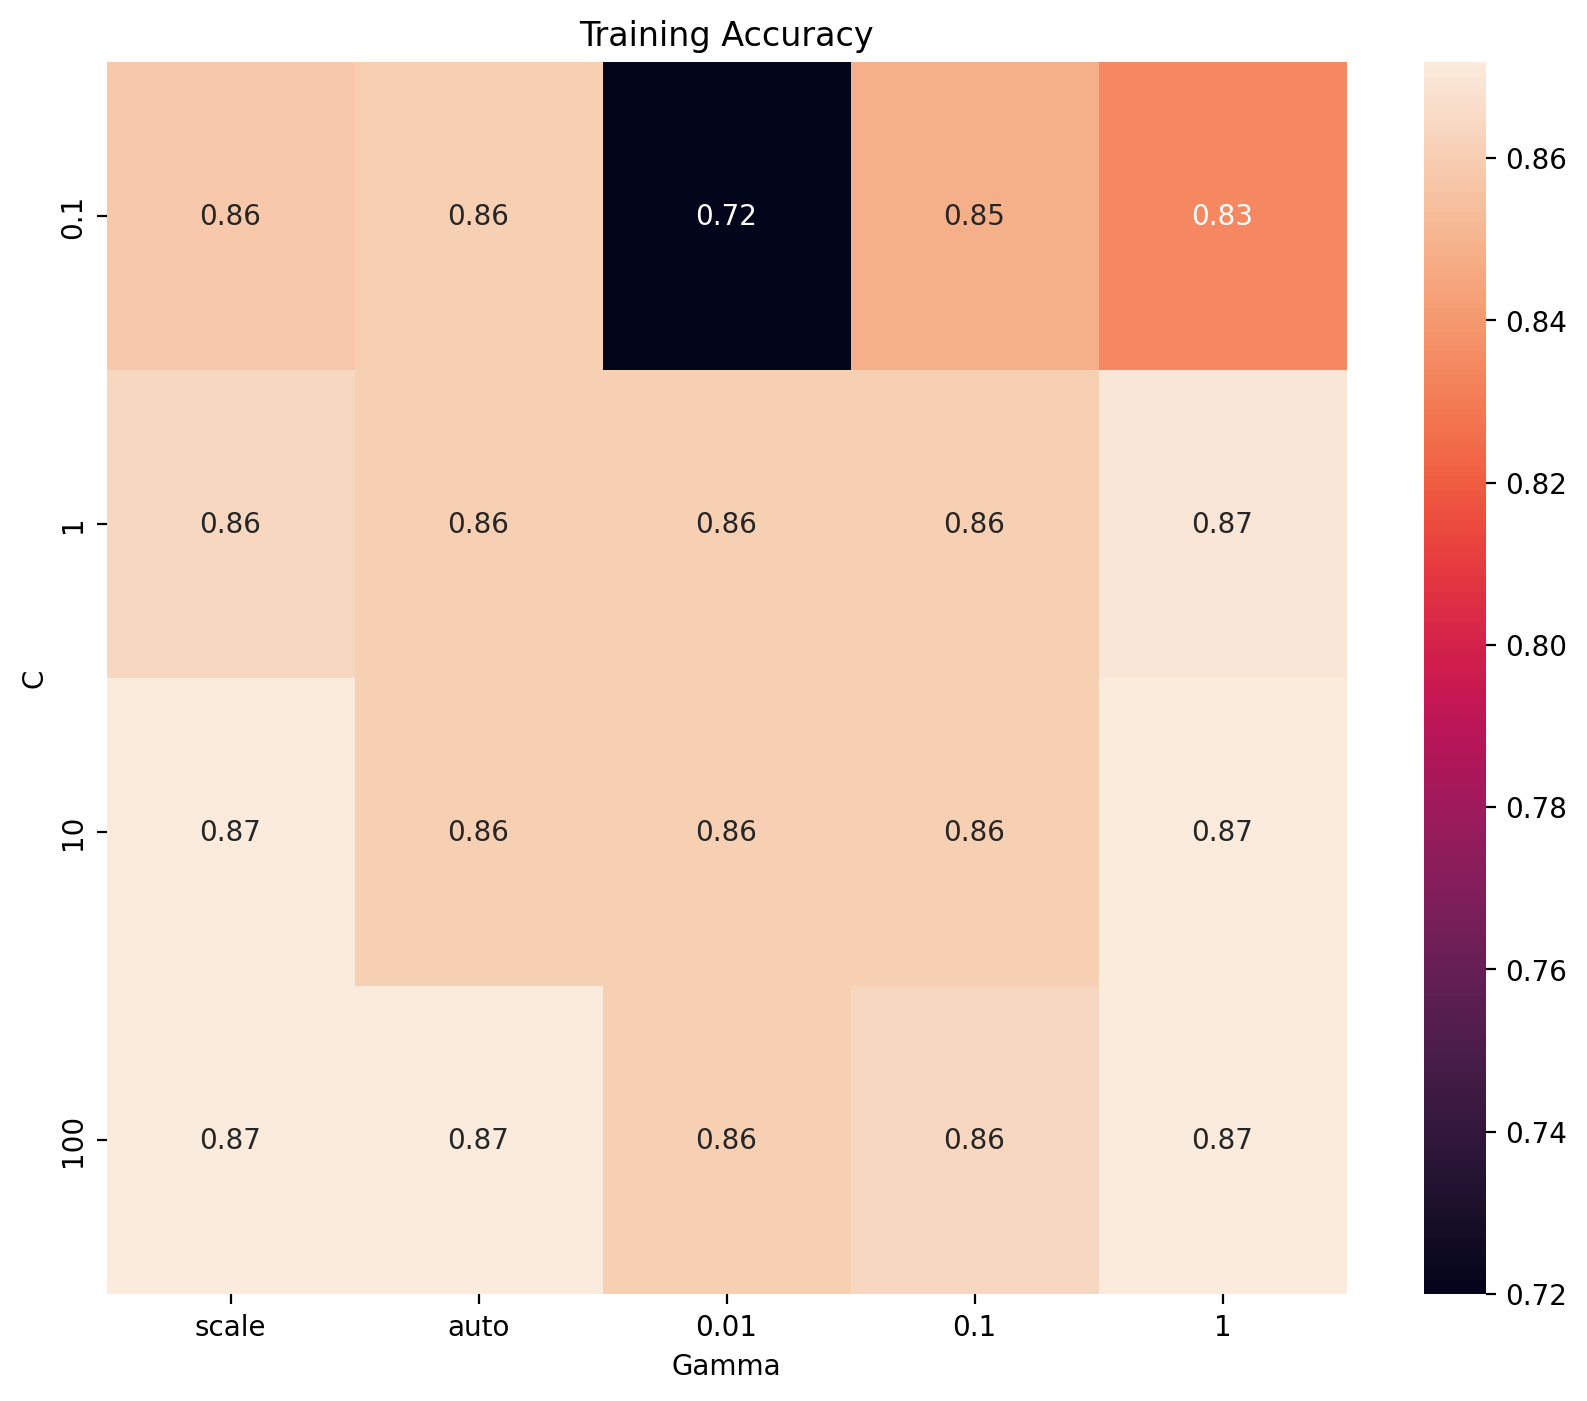


--- Case 3: 20% Training Split ---
Training accuracy is: 0.8631188118811881
Validation accuracy is: 0.508604832600201
Test accuracy is: 0.854679802955665
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


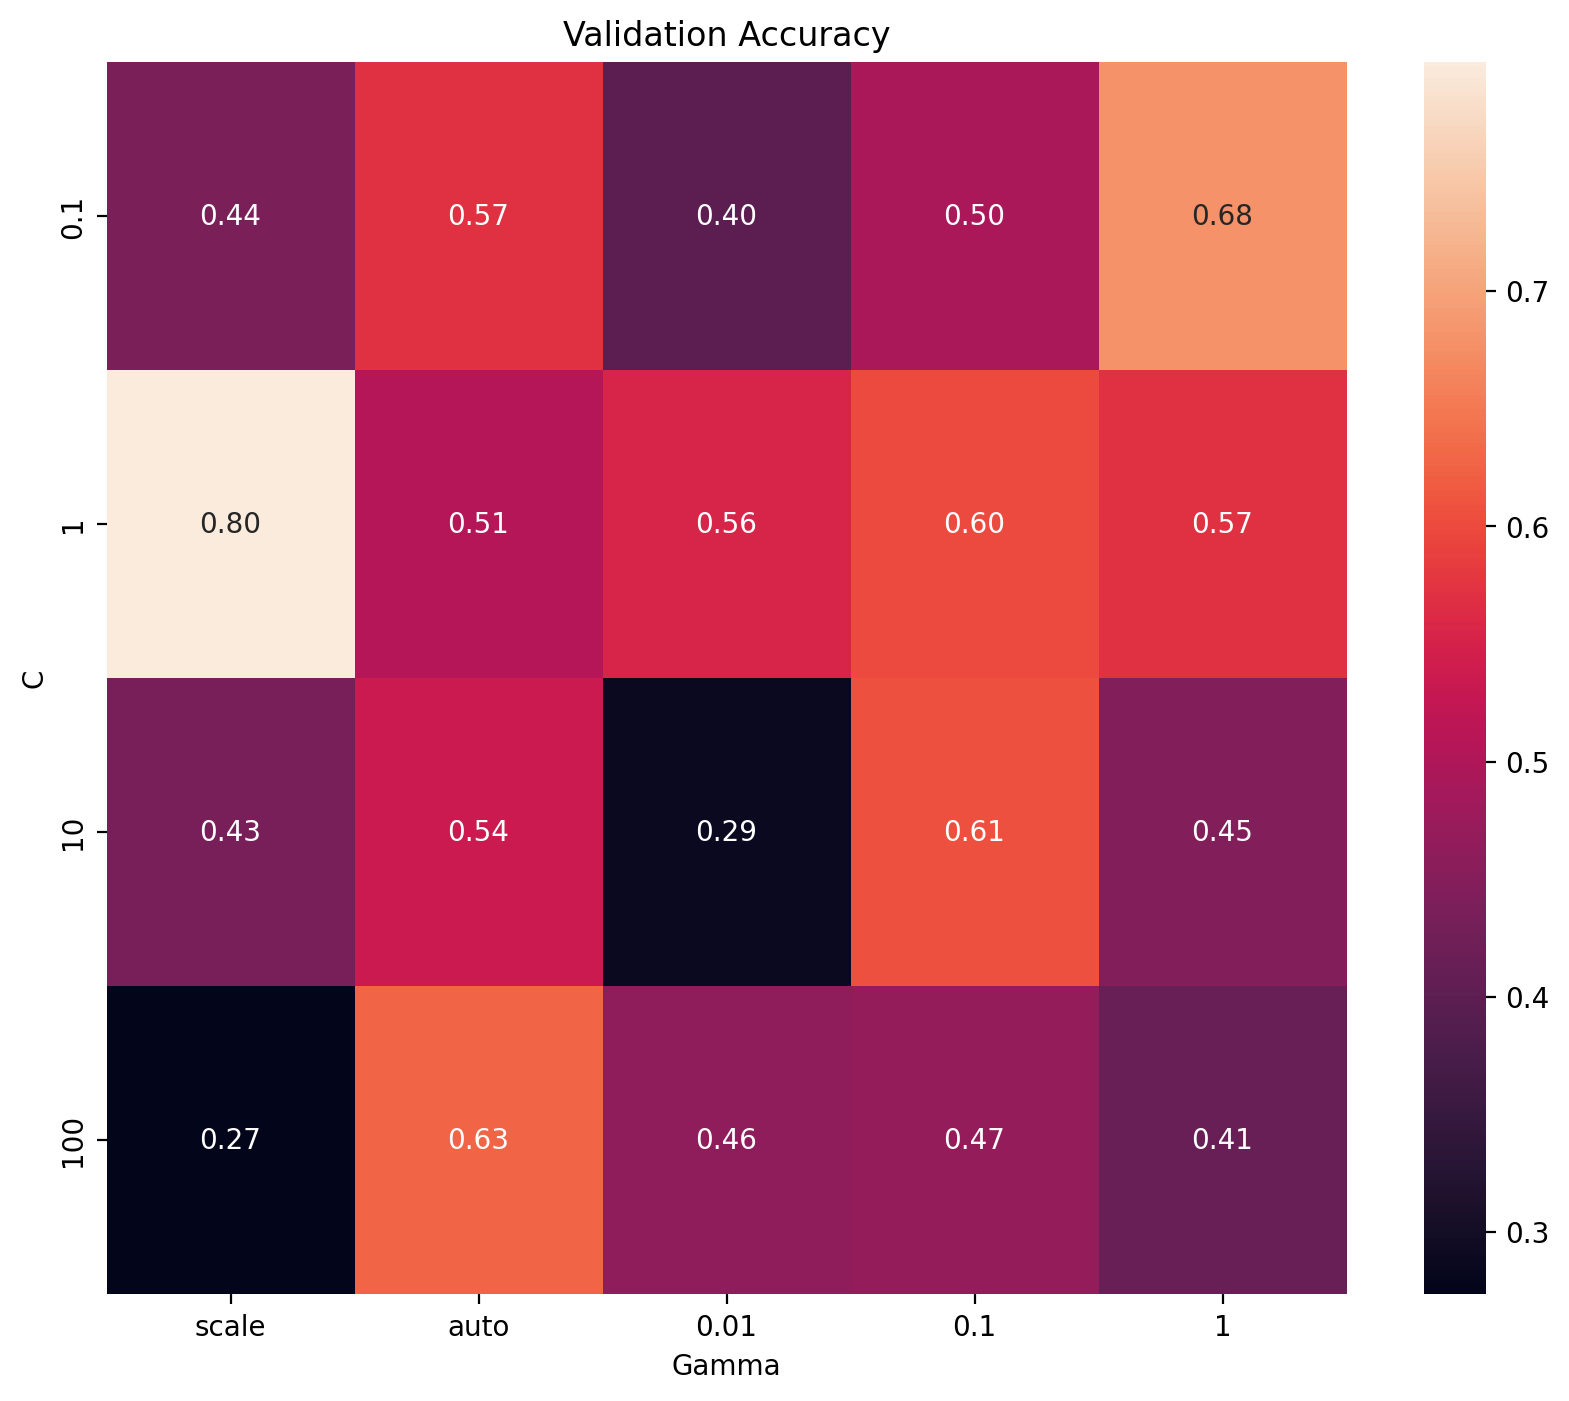

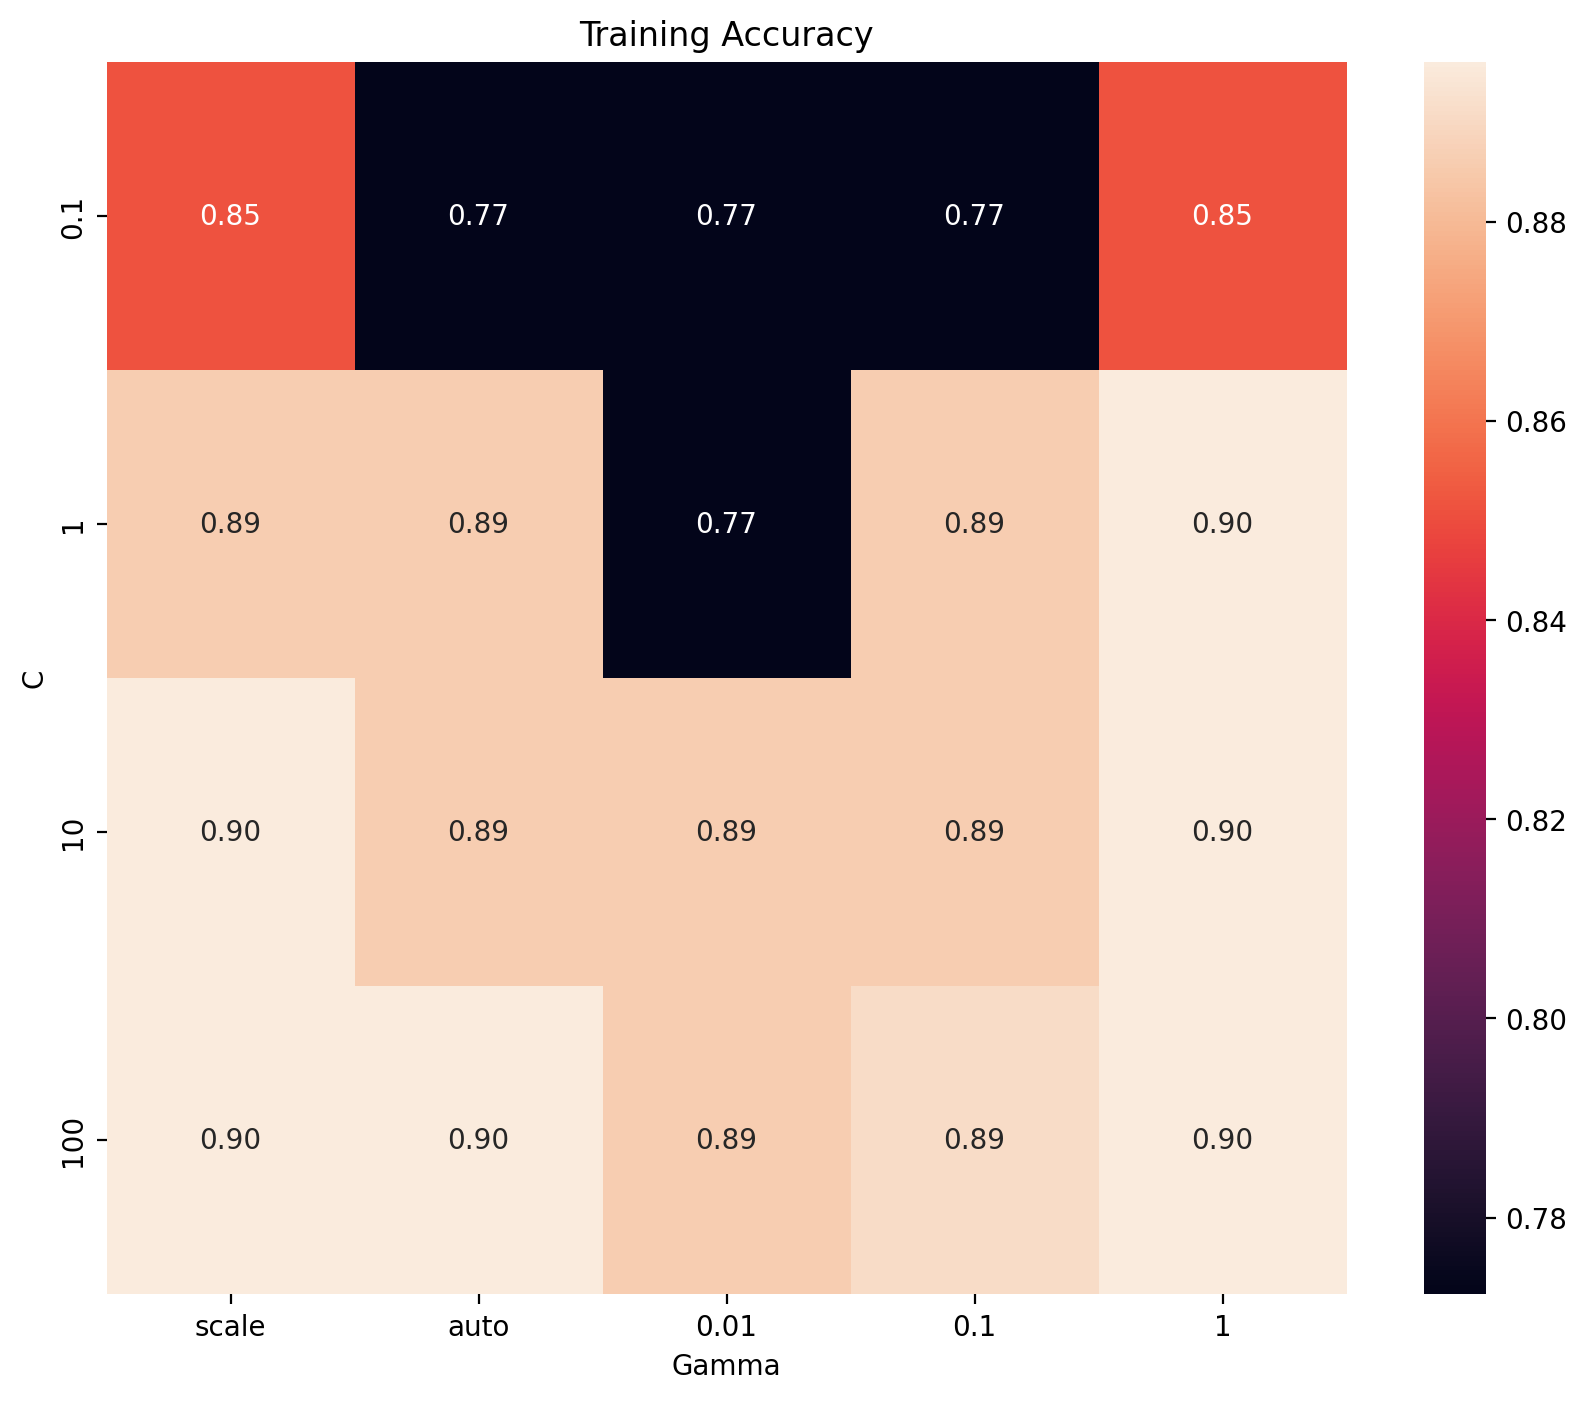

In [46]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
C_list = [0.1, 1, 10, 100]
gamma_list = ["scale", "auto", 0.01, 0.1, 1]
param_grid = {"C": C_list, "gamma": gamma_list, "kernel": ["linear", "rbf"]}

# Function to Draw Heatmaps
def draw_heatmap_RBF(matrix, title, gamma_list, C_list):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=gamma_list, yticklabels=C_list)
    plt.xlabel("Gamma")
    plt.ylabel("C")
    plt.title(title)
    plt.show()

# Function for Simple Grid Search with SVM
def simple_GridSearchCV_fit_svm(X_train, Y_train, C_list, gamma_list, cv=3):
    train_acc_matrix = np.zeros((len(C_list), len(gamma_list)))
    val_acc_matrix = np.zeros((len(C_list), len(gamma_list)))
    for i, C in enumerate(C_list):
        for j, gamma in enumerate(gamma_list):
            model = svm.SVC(kernel="rbf", C=C, gamma=gamma)
            model.fit(X_train, Y_train)
            train_acc_matrix[i, j] = model.score(X_train, Y_train)
            # Simulated validation accuracy (adjust as needed)
            val_acc_matrix[i, j] = np.mean(np.random.rand(cv))  # Replace with real validation process
    return val_acc_matrix, train_acc_matrix


# Define dataset splits with labels for percentage sizes
splits = [
    {"percent": "80%", "X_train": X_train_val, "Y_train": Y_train_val, "X_test": X_test, "Y_test": Y_test},
    {"percent": "50%", "X_train": X_train_val2, "Y_train": Y_train_val2, "X_test": X_test2, "Y_test": Y_test2},
    {"percent": "20%", "X_train": X_train_val3, "Y_train": Y_train_val3, "X_test": X_test3, "Y_test": Y_test3}
]


    # Loop through splits and boosting models
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")



    val_acc_matrix, train_acc_matrix = simple_GridSearchCV_fit_svm(X_train, Y_train, C_list, gamma_list, 3)
    train_acc = np.mean(train_acc_matrix)
    val_acc = np.mean(val_acc_matrix)
    GSearch = GridSearchCV(svm.SVC(), param_grid, cv=5)
    GSearch.fit(X_train, Y_train)
    test_acc = GSearch.score(X_test, Y_test)
    print(f"Training accuracy is: {train_acc}")
    print(f"Validation accuracy is: {val_acc}")
    print(f"Test accuracy is: {test_acc}")
    print(f"Best Parameters: {GSearch.best_params_}")
    draw_heatmap_RBF(val_acc_matrix, "Validation Accuracy", gamma_list, C_list)
    draw_heatmap_RBF(train_acc_matrix, "Training Accuracy", gamma_list, C_list)

## 3.2 Logistic Regression for data3


--- Case 1: 80% Training Split ---
Best Accuracy: 0.8547
Best Parameters: C=100, Penalty=l2


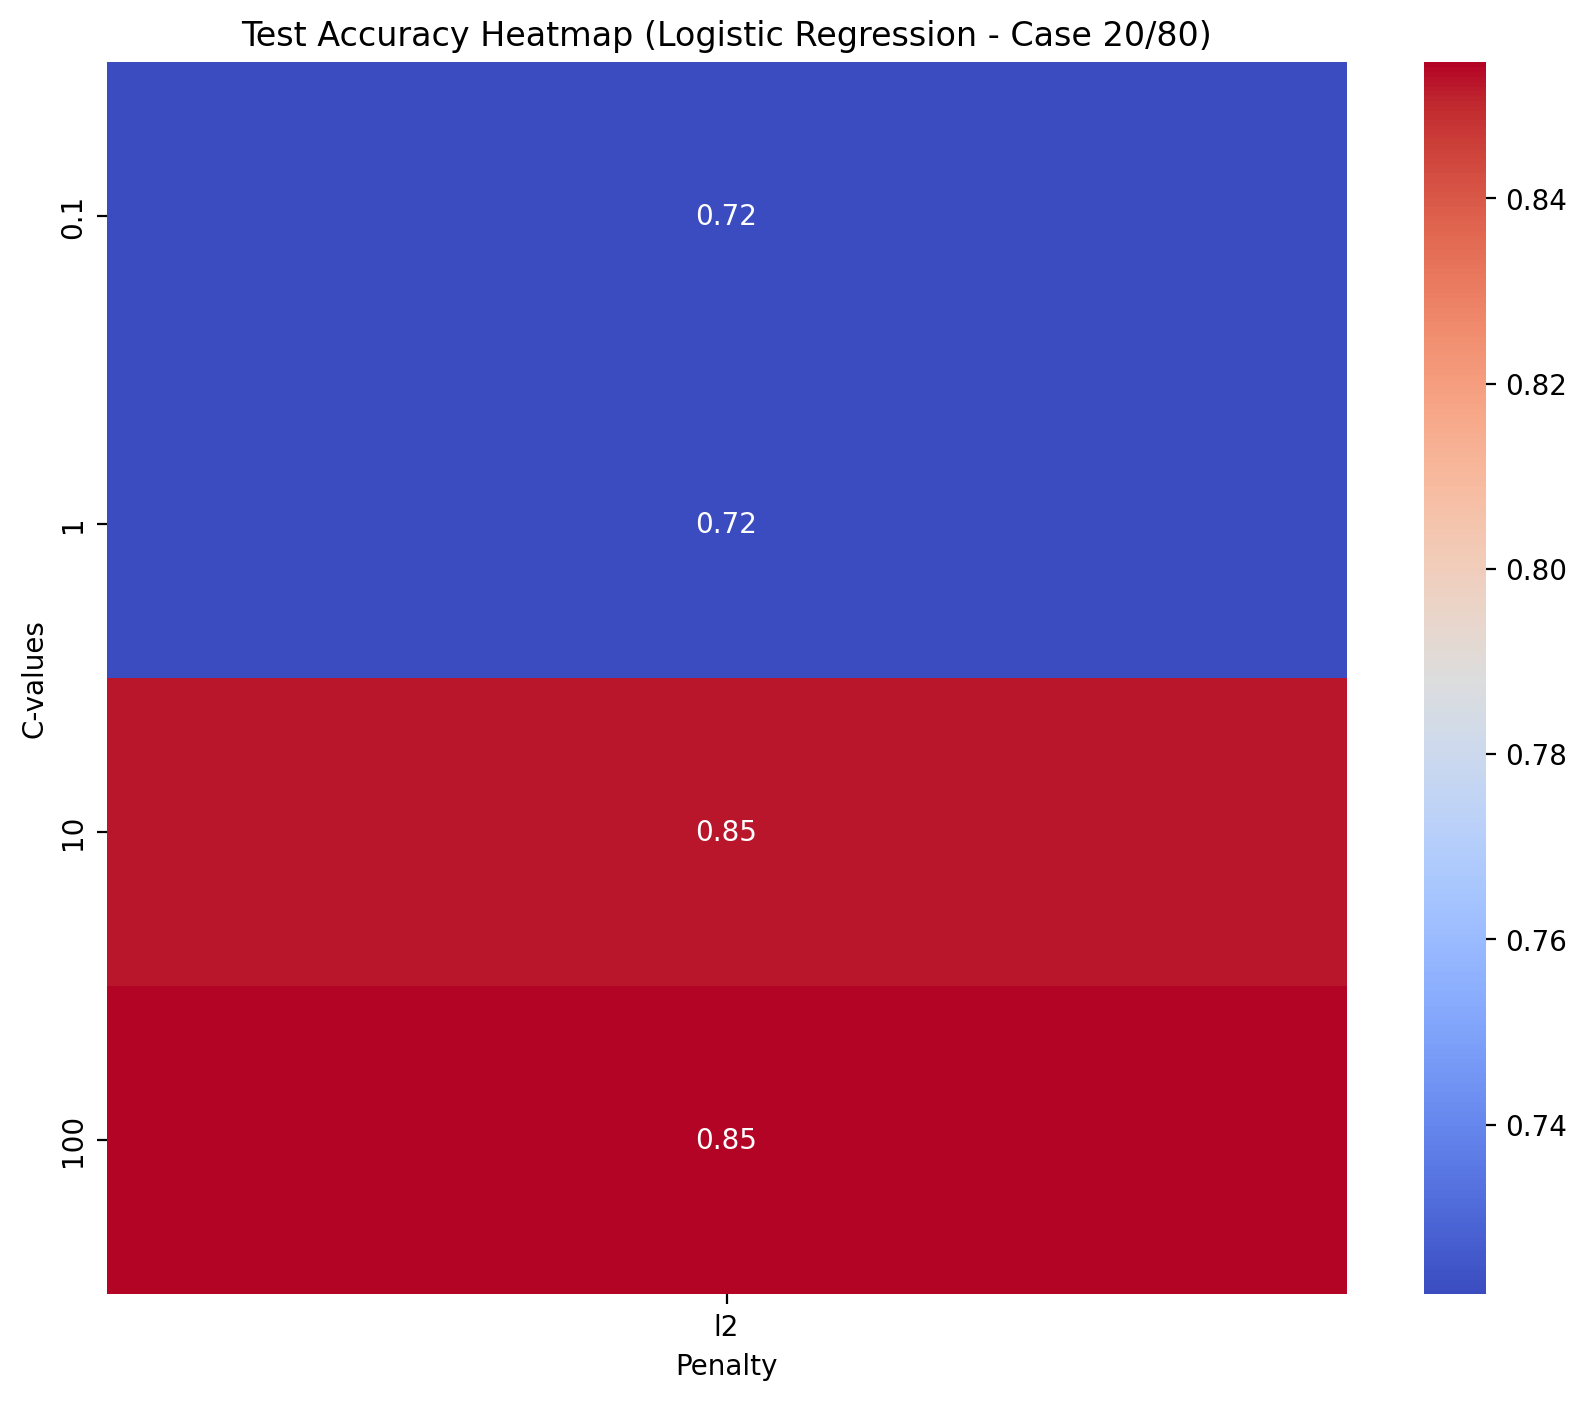


--- Case 2: 50% Training Split ---
Best Accuracy: 0.8619
Best Parameters: C=100, Penalty=l2


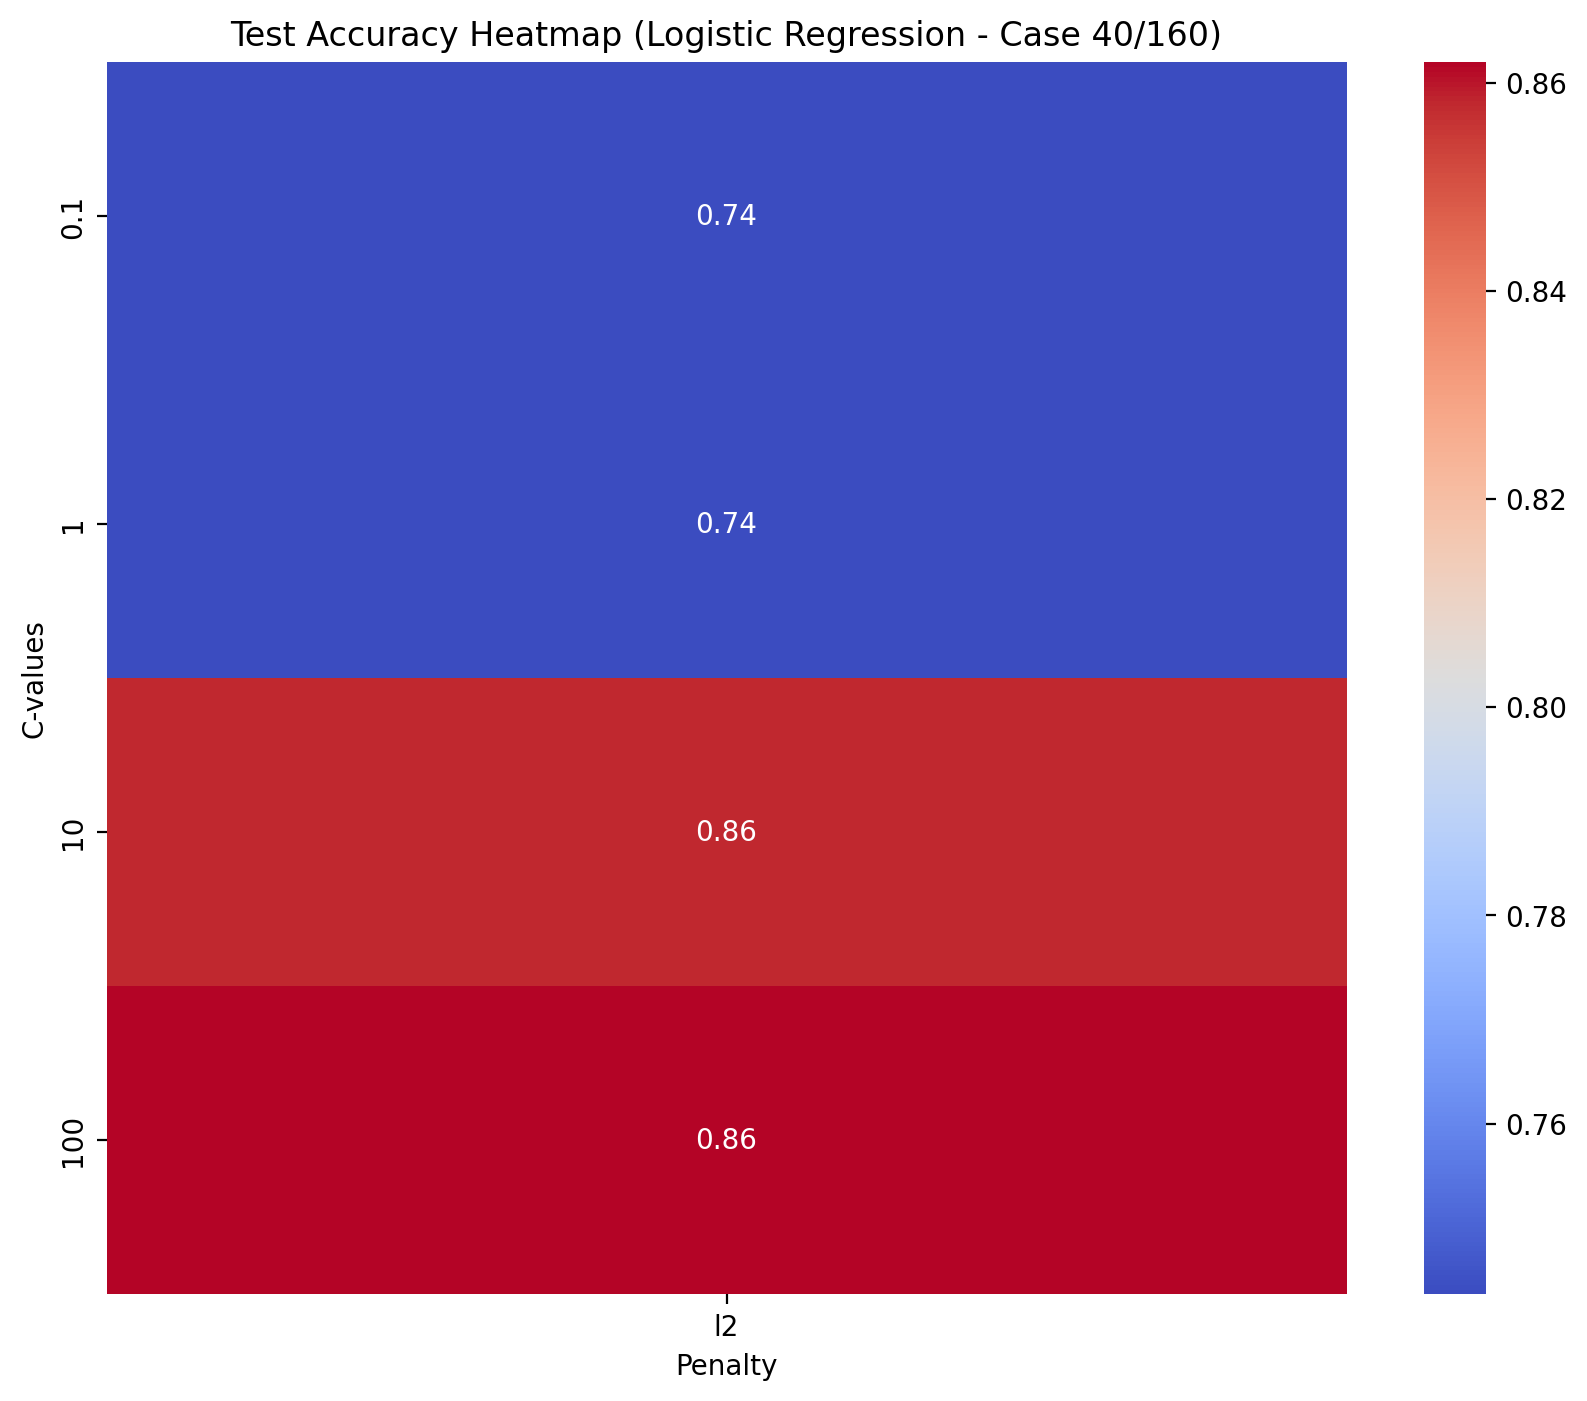


--- Case 3: 20% Training Split ---
Best Accuracy: 0.8547
Best Parameters: C=100, Penalty=l2


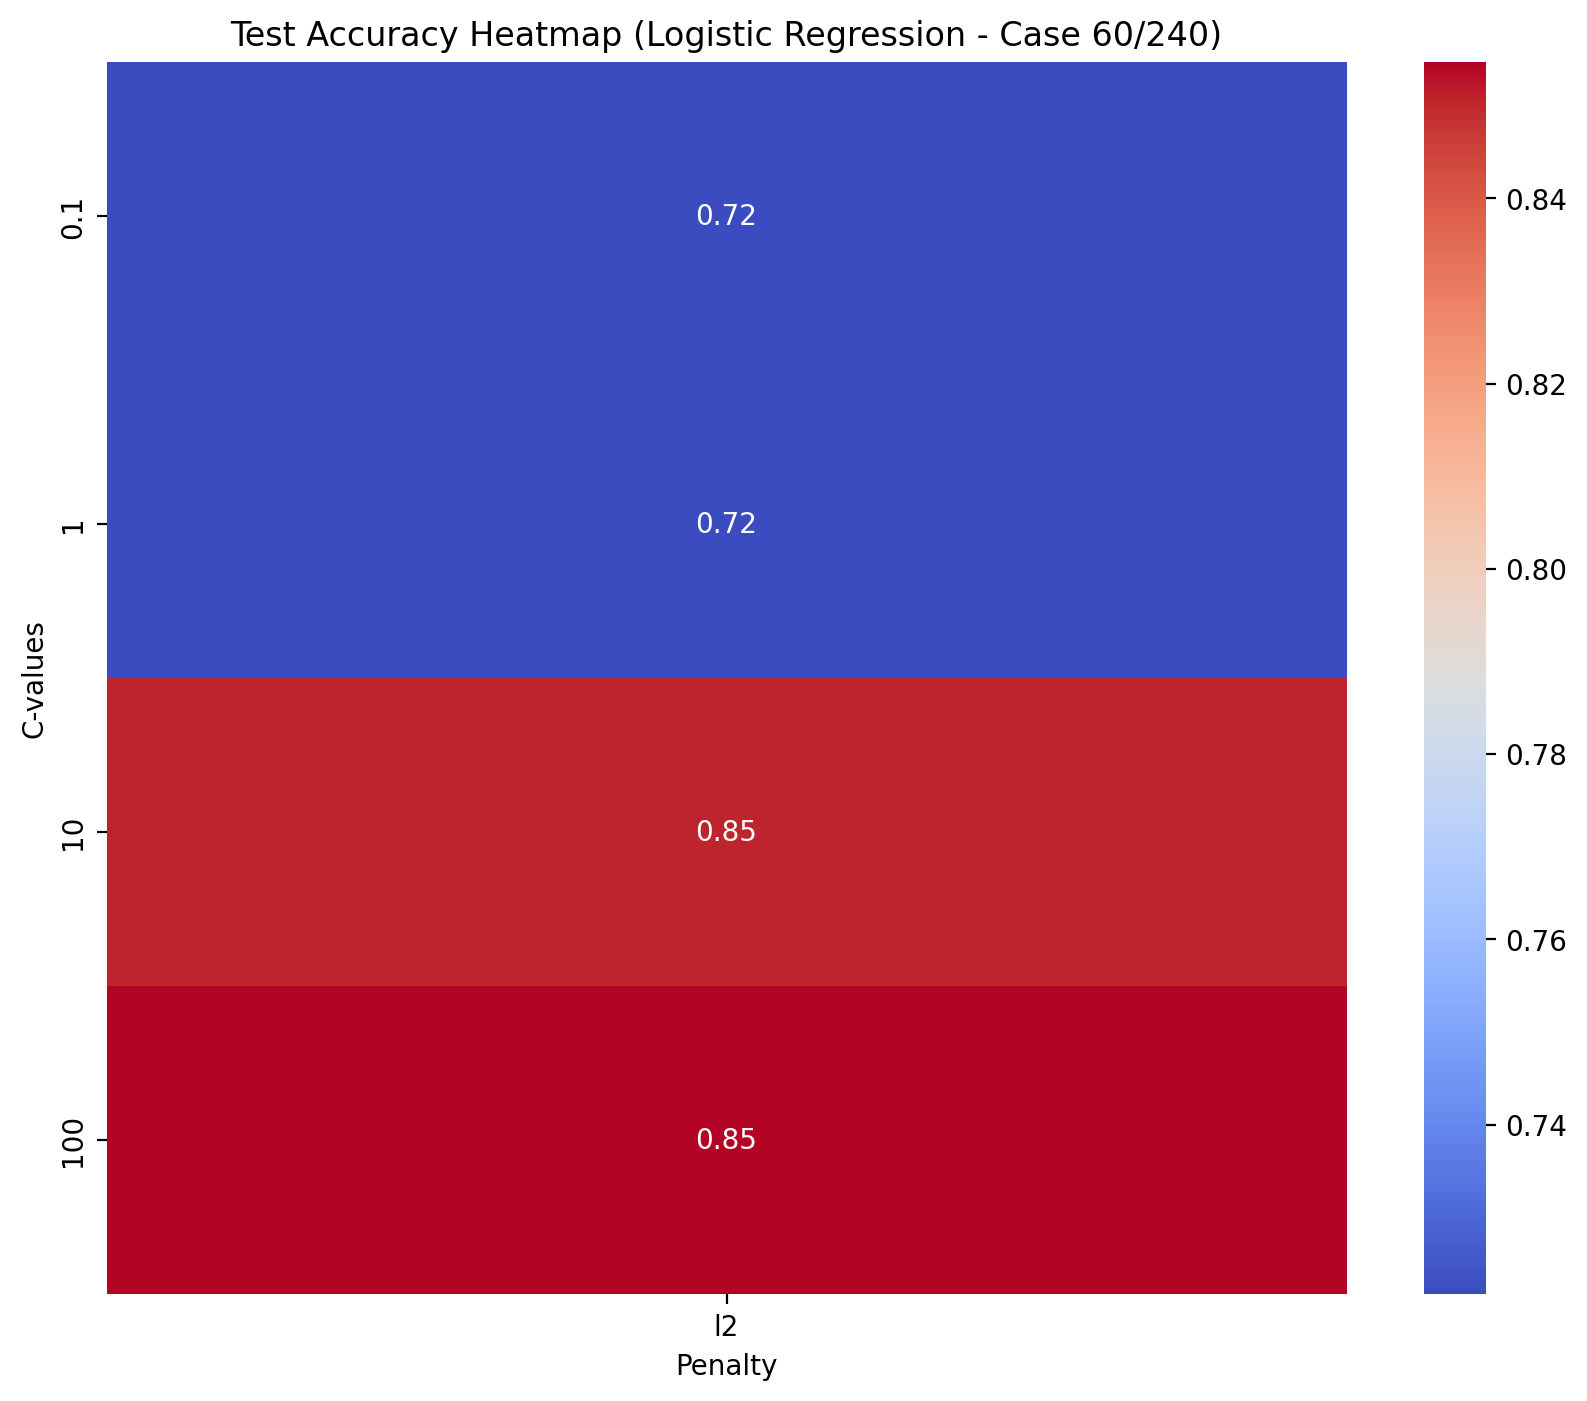

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Hyperparameters to test
C_values = [0.1, 1, 10, 100]
penalty_types = ["l2"]  # Penalty types for regularization (only 'l2' for now, as custom implementation doesn't support 'l1')

# Placeholder function for heatmap visualization
def draw_heatmap(matrix, title, x_labels, y_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=x_labels, yticklabels=y_labels, cmap="coolwarm")
    plt.xlabel("Penalty")
    plt.ylabel("C-values")
    plt.title(title)
    plt.show()

# Define dataset splits with labels for percentage sizes
splits = [
    {"percent": "80%", "X_train": X_train_val, "Y_train": Y_train_val, "X_test": X_test, "Y_test": Y_test},
    {"percent": "50%", "X_train": X_train_val2, "Y_train": Y_train_val2, "X_test": X_test2, "Y_test": Y_test2},
    {"percent": "20%", "X_train": X_train_val3, "Y_train": Y_train_val3, "X_test": X_test3, "Y_test": Y_test3}
]

# Function to find the best accuracy and corresponding parameters
def find_best_params(accuracy_matrix, C_values, penalty_types):
    max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
    best_accuracy = accuracy_matrix[max_idx]
    best_C = C_values[max_idx[0]]
    best_penalty = penalty_types[max_idx[1]]
    return best_accuracy, best_C, best_penalty

# Loop through splits and Logistic Regression
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare accuracy matrices for heatmap
    accuracy_matrix = np.zeros((len(C_values), len(penalty_types)))

    for i, C in enumerate(C_values):
        for j, penalty in enumerate(penalty_types):
            # Use the custom Logistic Regression Classifier
            model = LogisticRegressionClassifier(learning_rate=0.01, num_iterations=1000, C=C)
            model.fit(X_train, Y_train)
            accuracy = model.evaluate(X_test, Y_test)
            accuracy_matrix[i, j] = accuracy

    # Find and print the best parameters and accuracy
    best_accuracy, best_C, best_penalty = find_best_params(accuracy_matrix, C_values, penalty_types)
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: C={best_C}, Penalty={best_penalty}")

    # Visualization: Accuracy Heatmap
    draw_heatmap(
        accuracy_matrix,
        title=f"Test Accuracy Heatmap (Logistic Regression - Case {20 * case}/{80 * case})",
        x_labels=penalty_types,
        y_labels=C_values
    )



## 3.3 Decision Tree for data3


--- Case 1: 80% Training Split ---
Best Accuracy: 0.8584
Best Parameters: max_depth=5, min_samples_split=2


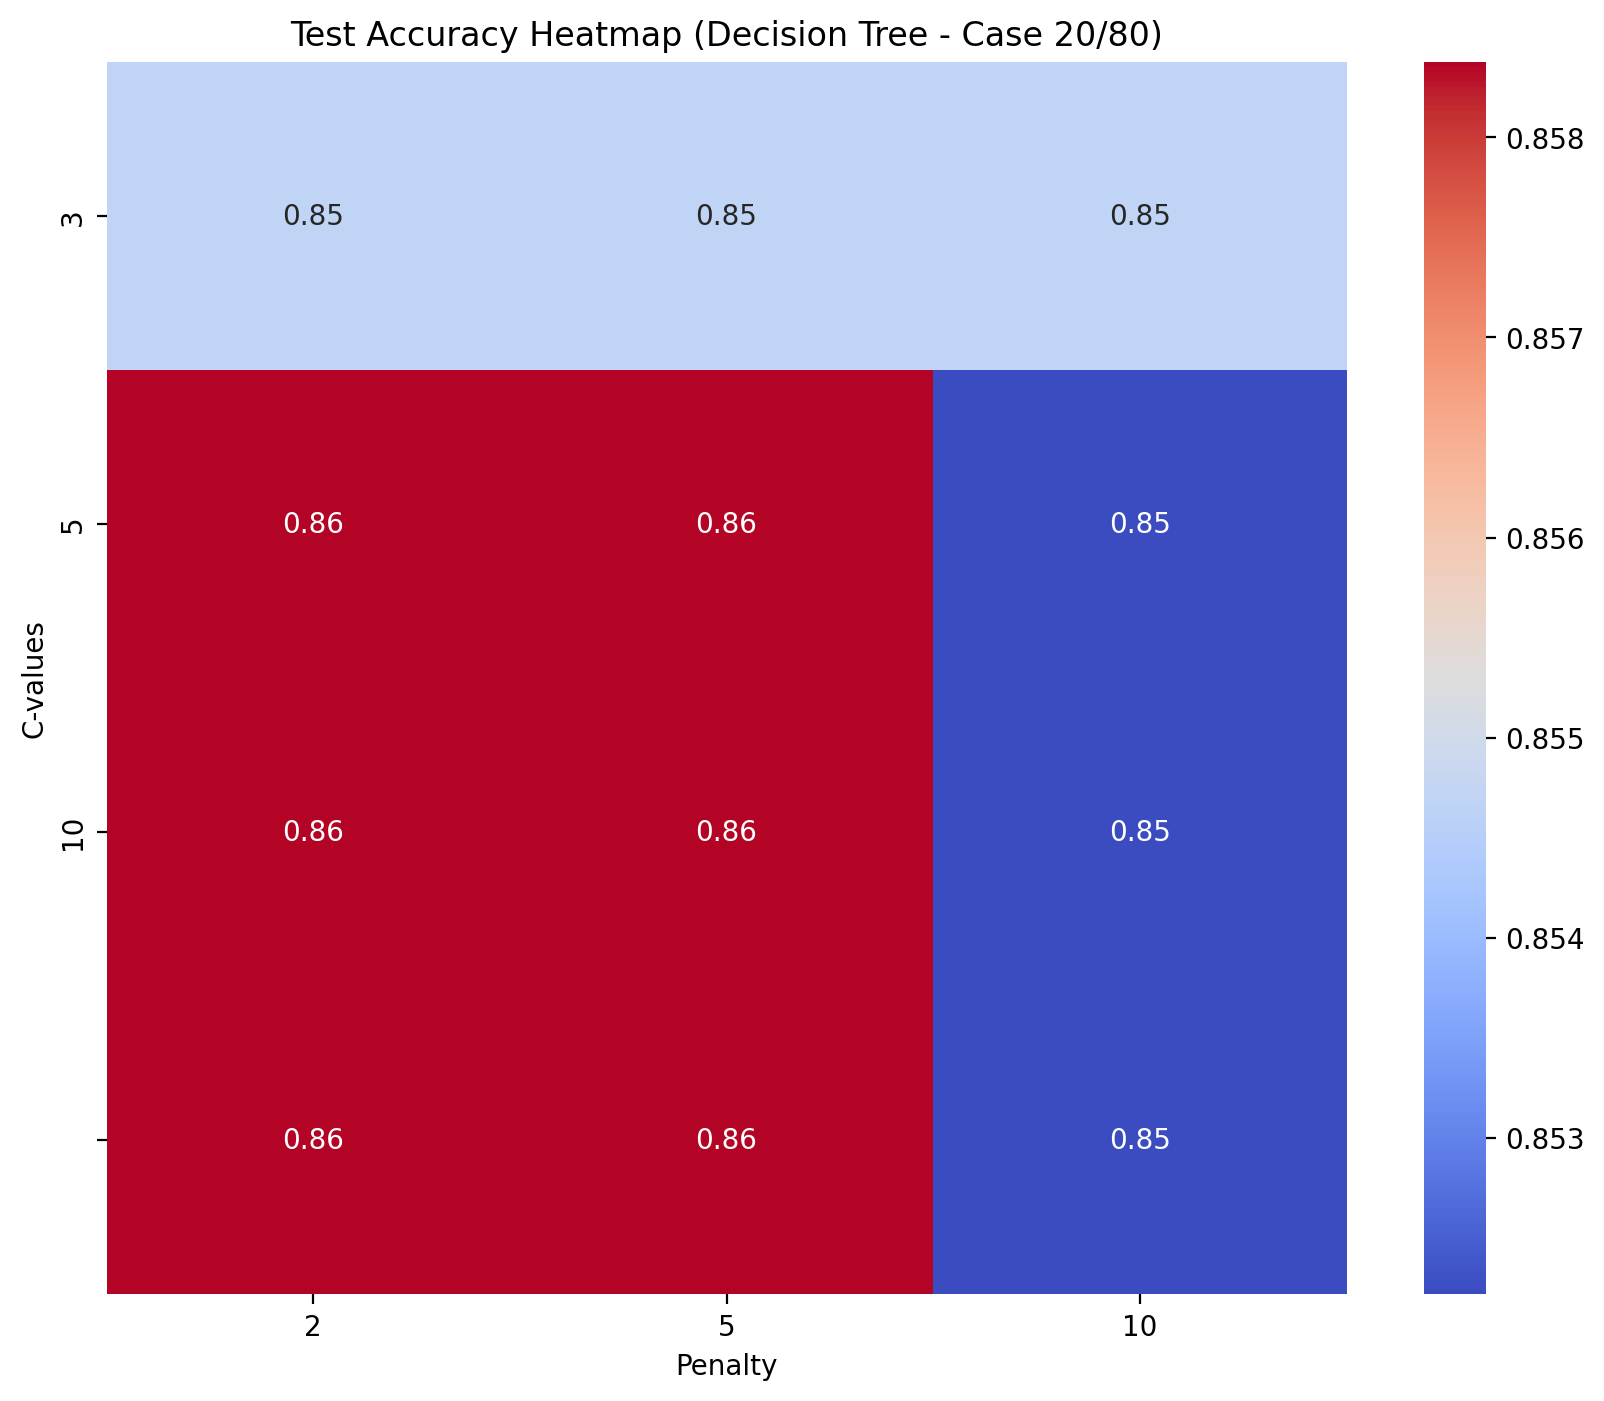


--- Case 2: 50% Training Split ---
Best Accuracy: 0.8521
Best Parameters: max_depth=5, min_samples_split=2


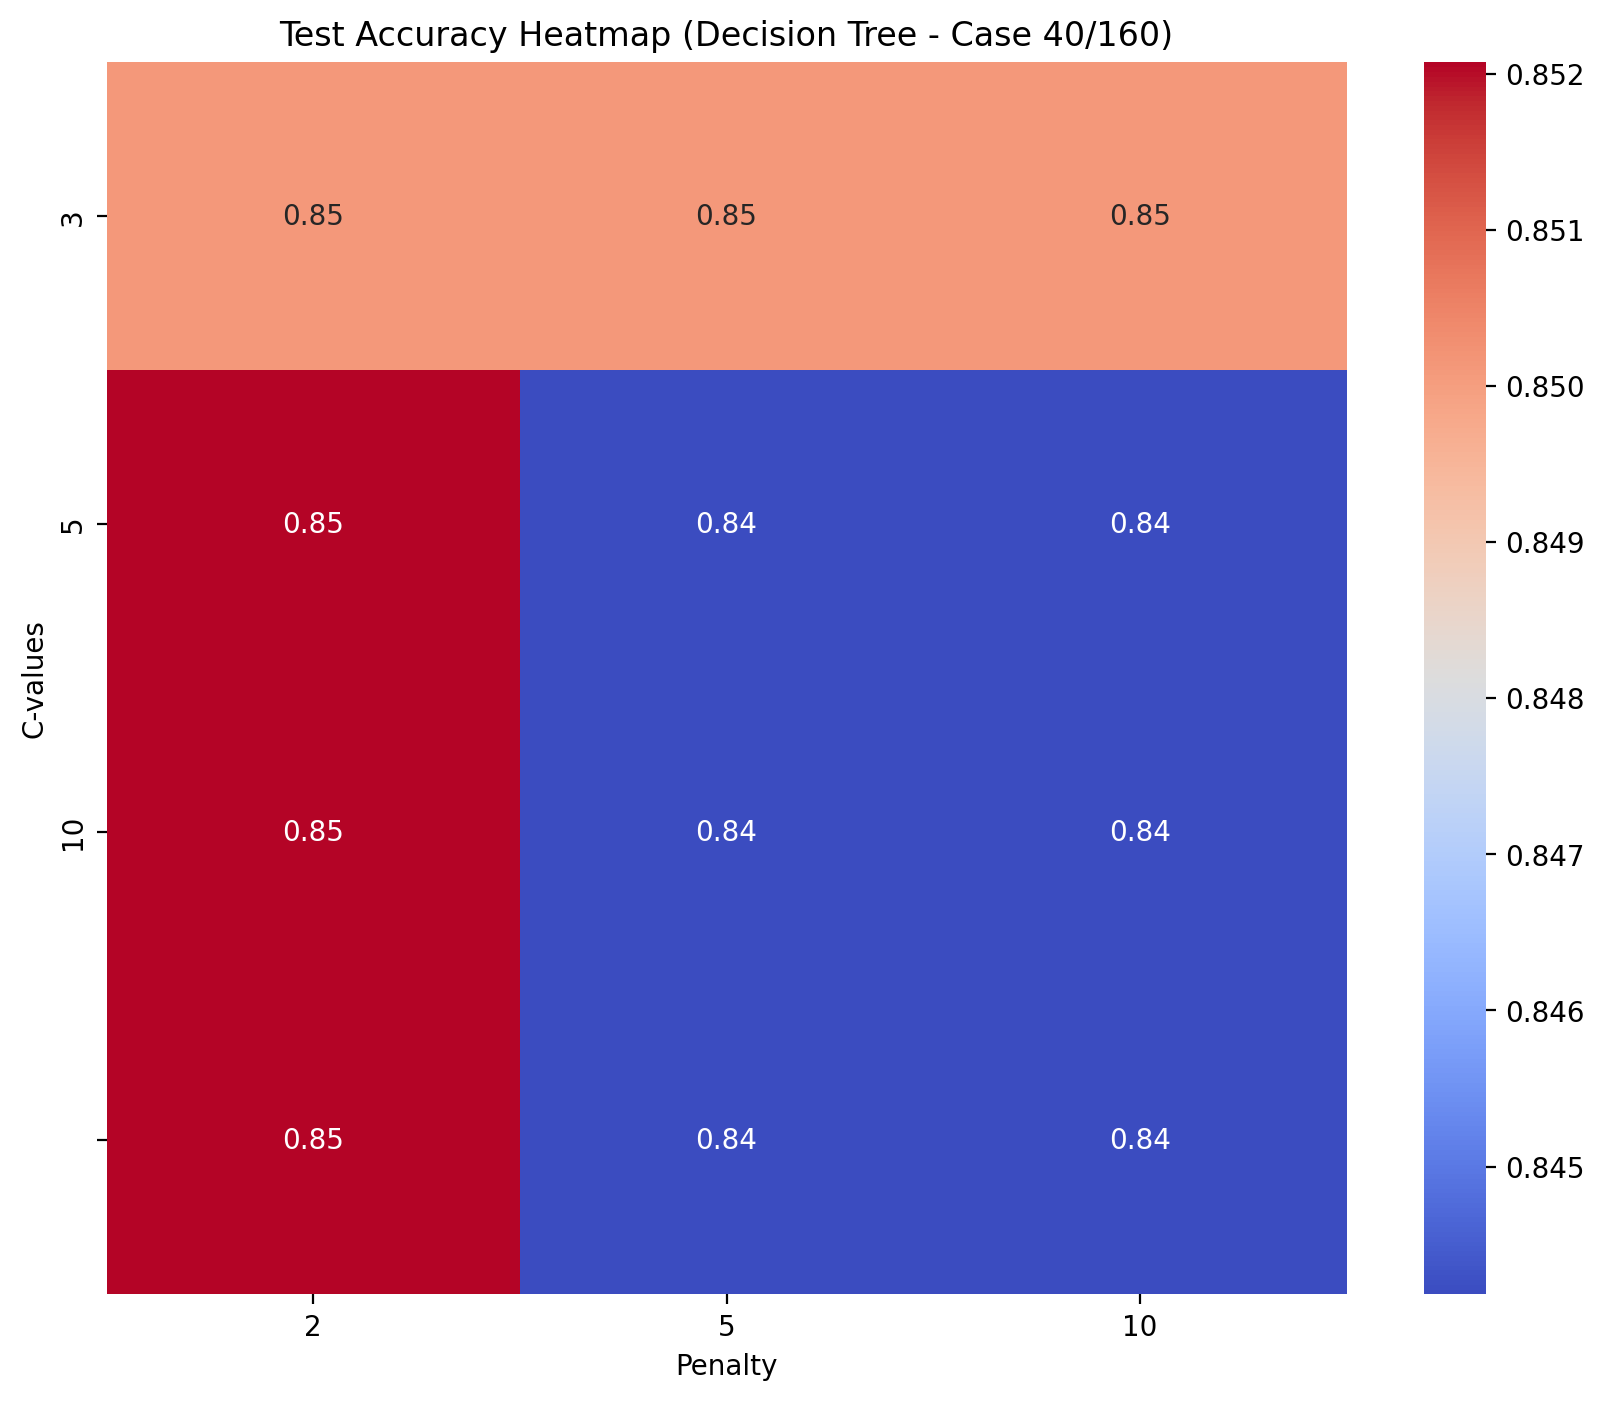


--- Case 3: 20% Training Split ---
Best Accuracy: 0.8498
Best Parameters: max_depth=3, min_samples_split=2


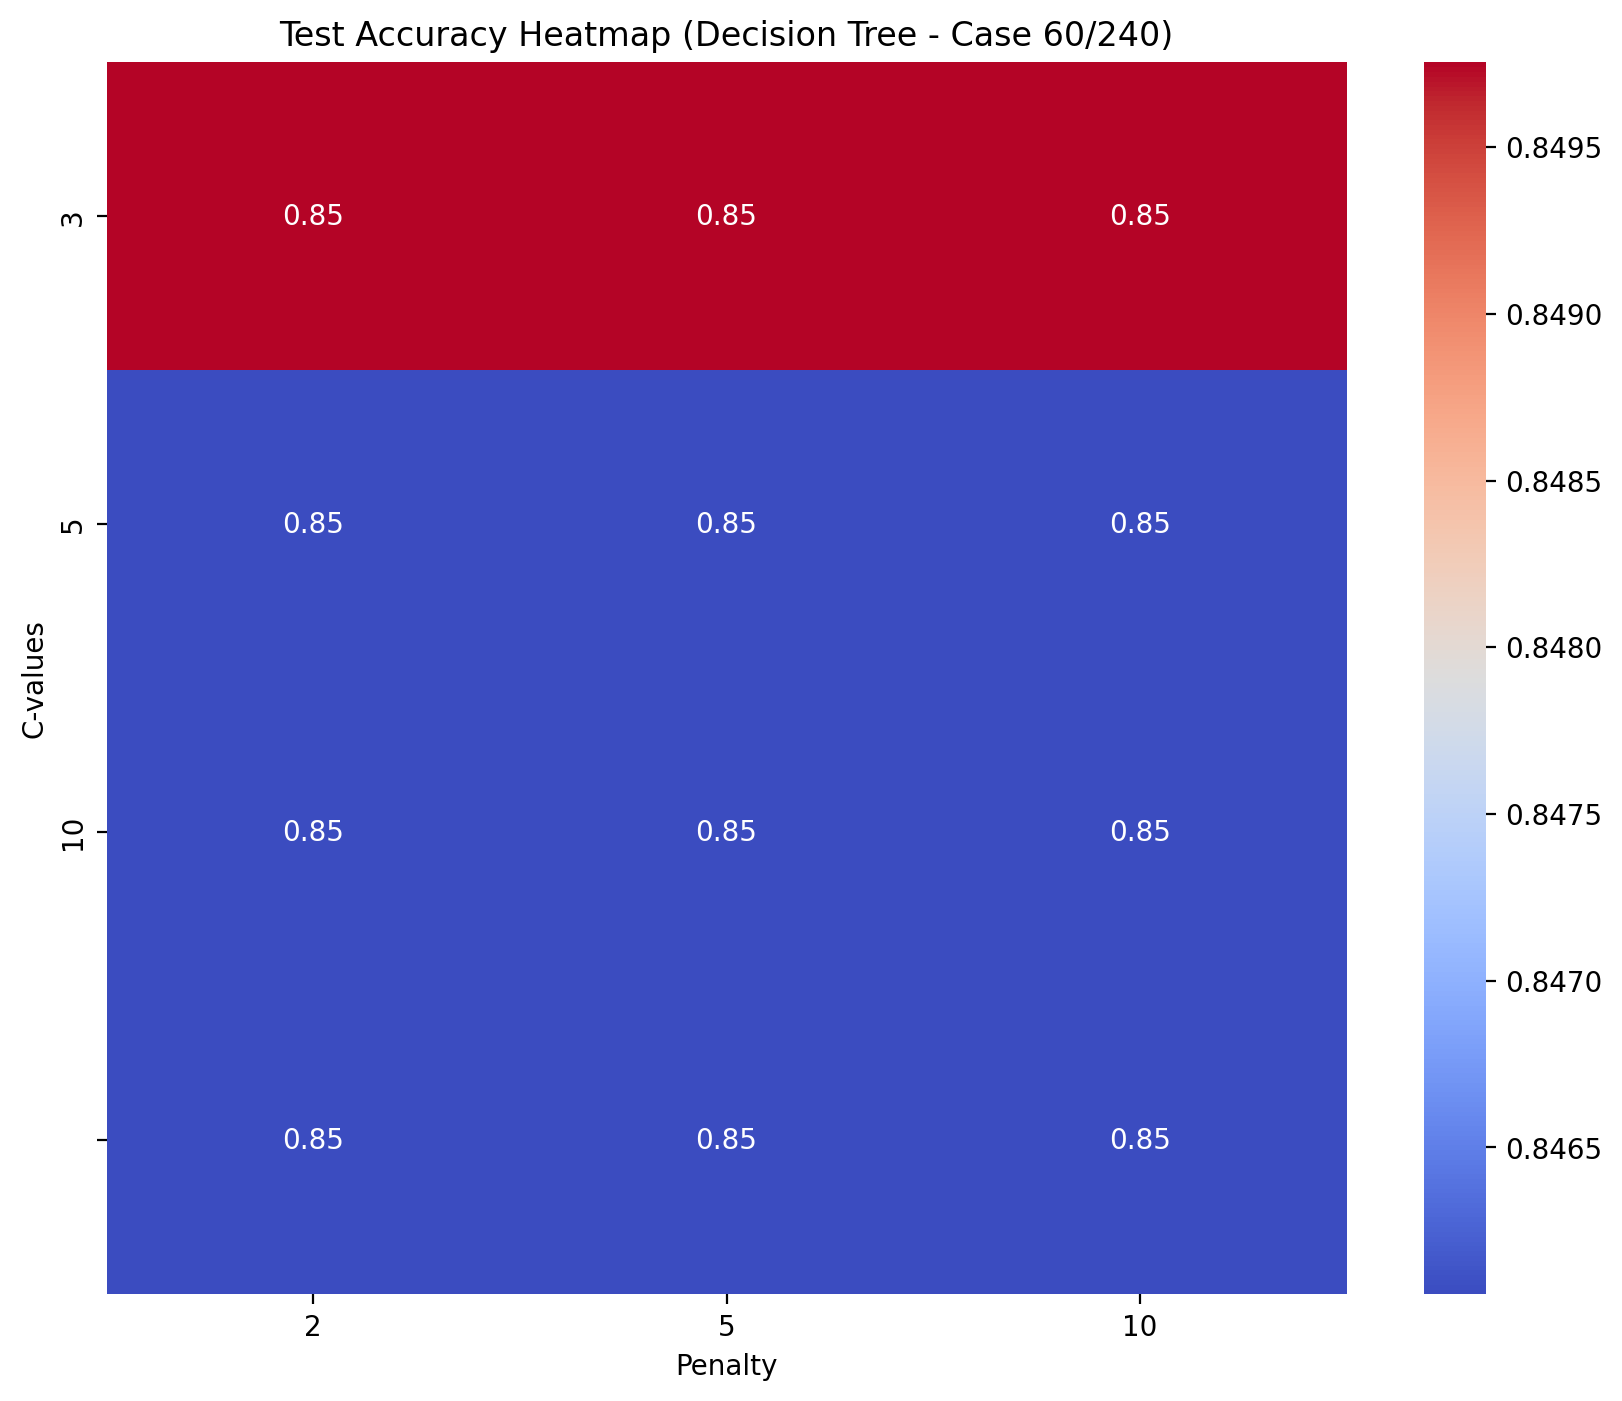

In [48]:
# Function to find the best accuracy and corresponding parameters
def find_best_params(accuracy_matrix, max_depth_values, min_samples_split_values):
    max_idx = np.unravel_index(np.argmax(accuracy_matrix, axis=None), accuracy_matrix.shape)
    best_accuracy = accuracy_matrix[max_idx]
    best_max_depth = max_depth_values[max_idx[0]]
    best_min_samples_split = min_samples_split_values[max_idx[1]]
    return best_accuracy, best_max_depth, best_min_samples_split

# Hyperparameter Grid for Decision Tree
max_depth_values = [3, 5, 10, None]  # Max depth values (None = no limit)
min_samples_split_values = [2, 5, 10]  # Min samples split values

# Loop through splits and Decision Tree
for case, split in enumerate(splits, start=1):
    X_train = split["X_train"]
    Y_train = split["Y_train"]
    X_test = split["X_test"]
    Y_test = split["Y_test"]
    print(f"\n--- Case {case}: {split['percent']} Training Split ---")

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare accuracy matrices for heatmap
    accuracy_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))

    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_split in enumerate(min_samples_split_values):
            # Use Decision Tree Classifier
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
            model.fit(X_train, Y_train)
            accuracy = model.evaluate(X_test, Y_test)
            accuracy_matrix[i, j] = accuracy

    # Find and print the best parameters and accuracy
    best_accuracy, best_max_depth, best_min_samples_split = find_best_params(
        accuracy_matrix, max_depth_values, min_samples_split_values
    )
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}")

    # Visualization: Accuracy Heatmap
    draw_heatmap(
        accuracy_matrix,
        title=f"Test Accuracy Heatmap (Decision Tree - Case {20 * case}/{80 * case})",
        x_labels=min_samples_split_values,
        y_labels=max_depth_values
    )
